In [192]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/istanbul_data_preprocessed.csv')

name_cols = ['MainDistID', 'DistID', 'HcoID', 'SkuID']
categorical_cols = ['SalesRegionID_x','SalesRegionID_y', 'HcoType', 'District', 'Status', ]
numerical_cols = ['PaidQty', 'FGQty', 'TotalQuantity']
boolean_cols = ['IsReturn', 'IsMrsOrder']
data['Date'] = pd.to_datetime(data['Date'])

# convert categorical columns to 'category' data type
for col in categorical_cols:
    data[col] = data[col].astype('category')

# convert numerical columns to 'int' data type
for col in numerical_cols:
    data[col] = data[col].astype('int')
    
# convert name columns to str data type
for col in name_cols:
    data[col] = data[col].astype(str)
    
# convert boolean columns to 'bool' data type
for col in boolean_cols:
    data[col] = data[col].astype(bool)
    
raw_data = data.copy()

In [193]:
# find MainDistID, DistID, HcoID, SalesRegionID_x, SalesRegionID_y number of unique values and create dataframe

unique_values = pd.DataFrame(raw_data.nunique(), columns=['Number of Unique Values'])
unique_values = unique_values.loc[['DistID', 'MainDistID', 'HcoID', 'SalesRegionID_x', 'SalesRegionID_y', 'District']]

unique_values

Number of Unique Values
DistID                                63
MainDistID                            20
HcoID                               5974
SalesRegionID_x                      120
SalesRegionID_y                      120
District                              82

## Top 5 MainDistID with the highest TotalQuantity

In [194]:
main_dist_total_quantity = raw_data.groupby('MainDistID').agg({'TotalQuantity': 'sum'}).sort_values(by='TotalQuantity', ascending=False).head(5)
main_dist_total_quantity

TotalQuantity
MainDistID               
2879266           8093840
2879254           5316099
2879249           4988641
2915715            975847
2879276            403669

## Top 5 DistID with the highest TotalQuantity

In [195]:
dist_total_quantity = raw_data.groupby('DistID').agg({'TotalQuantity': 'sum'}).sort_values(by='TotalQuantity', ascending=False).head(5)
dist_total_quantity

TotalQuantity
DistID                
2878817        5316099
2878856        2181228
2878809        1756165
2878859        1592056
2878812        1290500

# Selected SKU's
- I. Segment: 568 (challenge olan), 578, 1050
- II. Segment: 319 (en stabil olan), 509/615, 1018 (düşük satışlı olan)

In [196]:
segment_1_sku_ids = ["568", "578", "1050"]
segment_2_sku_ids = ["319", "509", "615", "1018"]

all_sku_ids = segment_2_sku_ids + segment_1_sku_ids

data = data[data['SkuID'].isin(all_sku_ids)]

## Top 5 MainDistID with the highest TotalQuantity for seceleced SKU's

In [197]:
main_dist_total_quantity = data.groupby('MainDistID').agg({'TotalQuantity': 'sum'}).sort_values(by='TotalQuantity', ascending=False).head(5)
main_dist_total_quantity

TotalQuantity
MainDistID               
2879266           2142536
2879254           1376649
2879249           1322592
2915715            256119
2879276             98349

In [198]:
highest_main_dist_ids = ['2879266','2879254','2879249','2915715','2879276']
highest_main_dist_data = data[data['MainDistID'].isin(highest_main_dist_ids)]
highest_main_dist_data

MainDistID   DistID       Date    HcoID SalesRegionID_x  BrandID  \
0          2879266  2878720 2019-01-16  2885754         1000000       72   
7          2879249  2878795 2019-01-31  2885754         1000000       15   
12         2879249  2878795 2019-02-27  2885754         1000000       72   
13         2879249  2878795 2019-02-11  2885754         1000000       29   
15         2879249  2878795 2019-03-11  2885754         1000000       72   
...            ...      ...        ...      ...             ...      ...   
4201047    2879266  2923953 2021-12-11  2925067         1000000       15   
4201048    2879266  2923953 2021-12-28  2925272         1000000       15   
4201049    2879266  2923953 2021-12-28  2925272         1000000       30   
4201051    2879266  2923953 2021-12-28  2925272         1000000       20   
4201055    2879266  2923953 2021-12-28  2925272         1000000       38   

        SkuID  IsReturn  PaidQty  FGQty  IsMrsOrder HcoType    District  \
0        1050     False       10      0       False       P  SANCAKTEPE   
7         319     False        2      0       False       P  SANCAKTEPE   
12       1050     False        2      0       False       P  SANCAKTEPE   
13        568     False       20      0       False       P  SANCAKTEPE   
15       1050     False        5      0       False       P  SANCAKTEPE   
...       ...       ...      ...    ...         ...     ...         ...   
4201047   319     False        5      0       False       P    Ataşehir   
4201048   319     False        4      0       False       P    Ümraniye   
4201049   578     False        4      0       False       P    Ümraniye   
4201051   509     False        1      0       False       P    Ümraniye   
4201055   615     False        3      0       False       P    Ümraniye   

        SalesRegionID_y  Status  TotalQuantity  
0                630101  Active             10  
7                630101  Active              2  
12               630101  Active              2  
13               630101  Active             20  
15               630101  Active              5  
...                 ...     ...            ...  
4201047         1000000  Active              5  
4201048         1000000  Active              4  
4201049         1000000  Active              4  
4201051         1000000  Active              1  
4201055         1000000  Active              3  

[857400 rows x 16 columns]

## Top 5 DistID with the highest TotalQuantity for seceleced SKU's

In [199]:
dist_total_quantity = data.groupby('DistID').agg({'TotalQuantity': 'sum'}).sort_values(by='TotalQuantity', ascending=False).head(5)
dist_total_quantity

TotalQuantity
DistID                
2878817        1376649
2878856         589667
2878809         446629
2878859         420150
2878812         344043

In [200]:
highest_dist_ids = ['2878817', '2878856', '2878809', '2878845', '2878859']
highest_dist_data = data[data['DistID'].isin(highest_dist_ids)]

highest_dist_data

MainDistID   DistID       Date    HcoID SalesRegionID_x  BrandID  \
363        2879266  2878856 2019-02-11  2860455          340502       29   
412        2879266  2878856 2019-04-09  2860455          340502       29   
413        2879266  2878856 2019-04-29  2860455          340502       72   
507        2879266  2878856 2019-10-04  2860455          340502       29   
568        2879266  2878856 2019-12-29  2860455          340502       15   
...            ...      ...        ...      ...             ...      ...   
4200502    2879266  2878859 2021-12-28  2925202         1000000       30   
4200503    2879266  2878859 2021-12-28  2925202         1000000       20   
4200506    2879266  2878859 2021-12-28  2925202         1000000       21   
4200531    2879266  2878859 2021-12-27  2925202         1000000       29   
4200552    2879266  2878859 2021-12-21  2925312          342201       72   

        SkuID  IsReturn  PaidQty  FGQty  IsMrsOrder HcoType    District  \
363       568     False       10      0       False       P    BAKIRKÖY   
412       568     False        5      0       False       P    BAKIRKÖY   
413      1050     False        4      0       False       P    BAKIRKÖY   
507       568     False        5      0       False       P    BAKIRKÖY   
568       319     False        1      0       False       P    BAKIRKÖY   
...       ...       ...      ...    ...         ...     ...         ...   
4200502   578     False        7      1       False       P  Arnavutköy   
4200503   509     False        8      0       False       P  Arnavutköy   
4200506  1018     False        3      0       False       P  Arnavutköy   
4200531   568     False       20      0       False       P  Arnavutköy   
4200552  1050     False        4      0       False       P         NaN   

        SalesRegionID_y  Status  TotalQuantity  
363              340502  Active             10  
412              340502  Active              5  
413              340502  Active              4  
507              340502  Active              5  
568              340502  Active              1  
...                 ...     ...            ...  
4200502         1000000  Active              8  
4200503         1000000  Active              8  
4200506         1000000  Active              3  
4200531         1000000  Active             20  
4200552          342201  Active              4  

[526830 rows x 16 columns]

# MainDistID: Ana Ecza Deposu
- MainDistID is the main warehouse where the products are stored and distributed to the districts. It is the main distribution center for the products.

# DistID: Ecza Deposu Şubesinin ID'si
(Örneğin AH Seyrantepe, AH Sincan ya da SELÇUK Kağıthane, SELÇUK Adana, vb.)
- DistID is the ID of the pharmacy warehouse branch. It is the distribution center for the products in the districts.


# Quarterly & Monthly Sales Analysis and Forecasting for MainDistID & DistID

We will analyze the quarterly and monthly sales data of the choosen SKU's for Istanbul. We will use the Exponential Smoothing, Moving Average, Naive, Triple Exponential Smoothing, ARIMA, and SARIMA forecasting methods to forecast the sales of the choosen SKU's for the next 4 quarters and 4 months.

# MainDistID Sales Analysis

Calculate the total sales of the choosen SKU's for quarterly and monthly.


++++++++

## Quarterly Sales Analysis

Calculate the total sales of the choosen SKU and MainDistID for quarterly. It should be 12 rows in total for every SKU and MainDistID.

In [201]:
main_dist_data_quarterly = data.copy()
main_dist_data_quarterly['Year'] = main_dist_data_quarterly['Date'].dt.year
main_dist_data_quarterly['Quarter'] = main_dist_data_quarterly['Date'].dt.quarter

main_dist_data_quarterly = main_dist_data_quarterly.groupby(['Year', 'Quarter', 'MainDistID', 'SkuID']).agg({'TotalQuantity': 'sum'}).reset_index()

main_dist_data_quarterly = main_dist_data_quarterly[main_dist_data_quarterly['MainDistID'].isin(highest_main_dist_ids)]

In [202]:
def plot_sku_main_dist(sku_id):
    sku_data = main_dist_data_quarterly[main_dist_data_quarterly['SkuID'] == sku_id]
    sku_data['YearQuarter'] = sku_data['Year'].astype(str) + '-Q' + sku_data['Quarter'].astype(str)
    pivot_table = sku_data.pivot(index='YearQuarter', columns='MainDistID', values='TotalQuantity')
    pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))
    plt.title(f'Sales of SKU {sku_id} by MainDistID over Time')
    plt.xlabel('Year-Quarter')
    plt.ylabel('Total Quantity Sold')
    plt.legend(title='MainDistID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

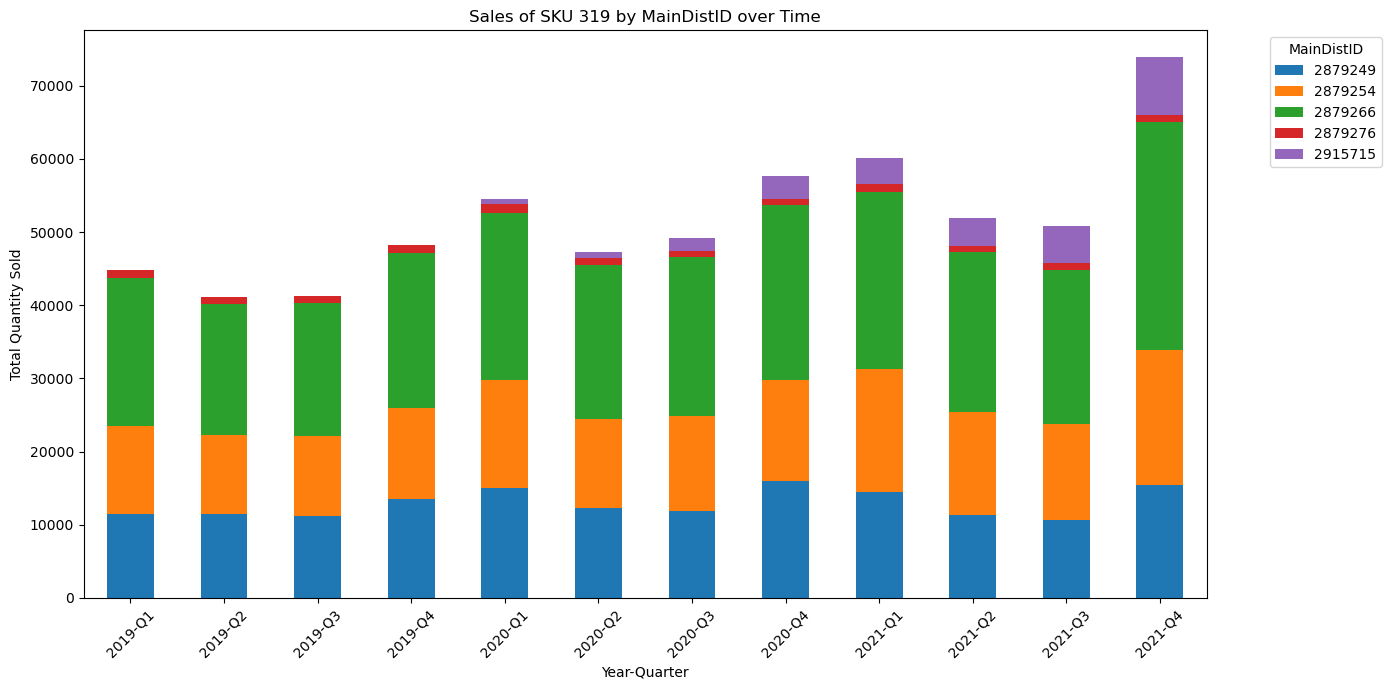

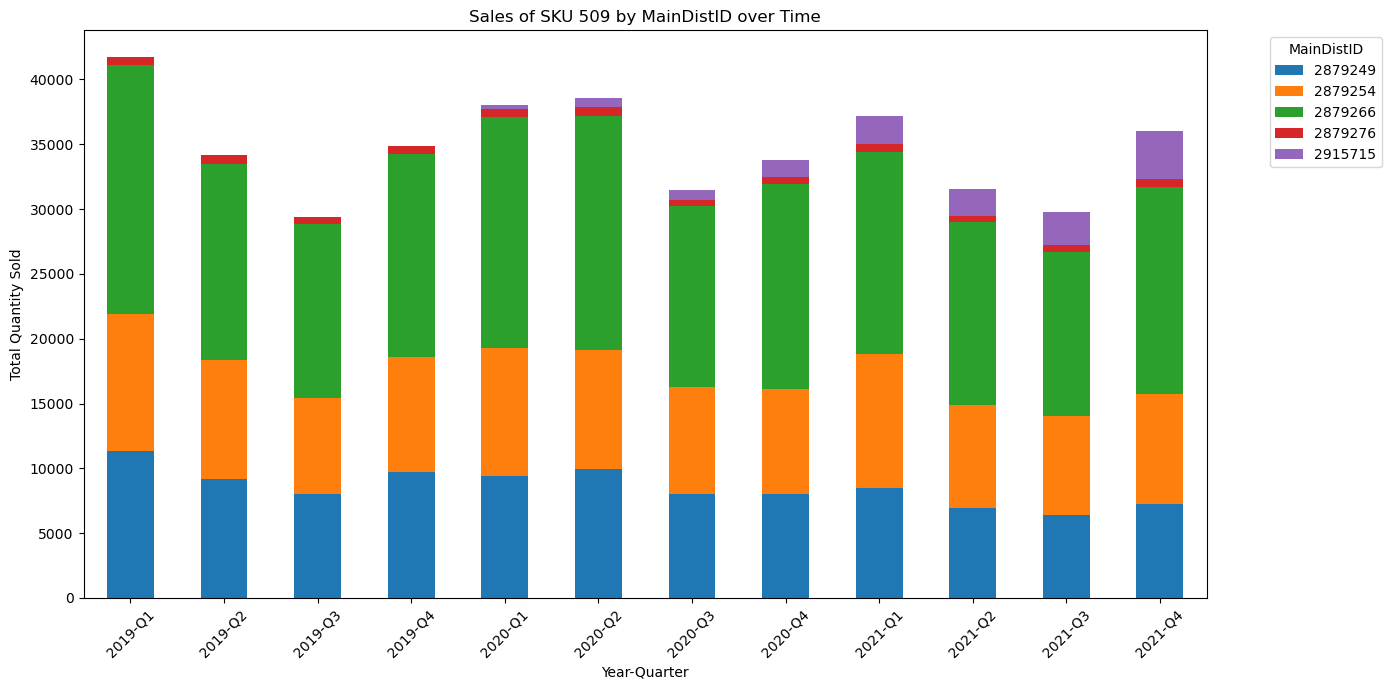

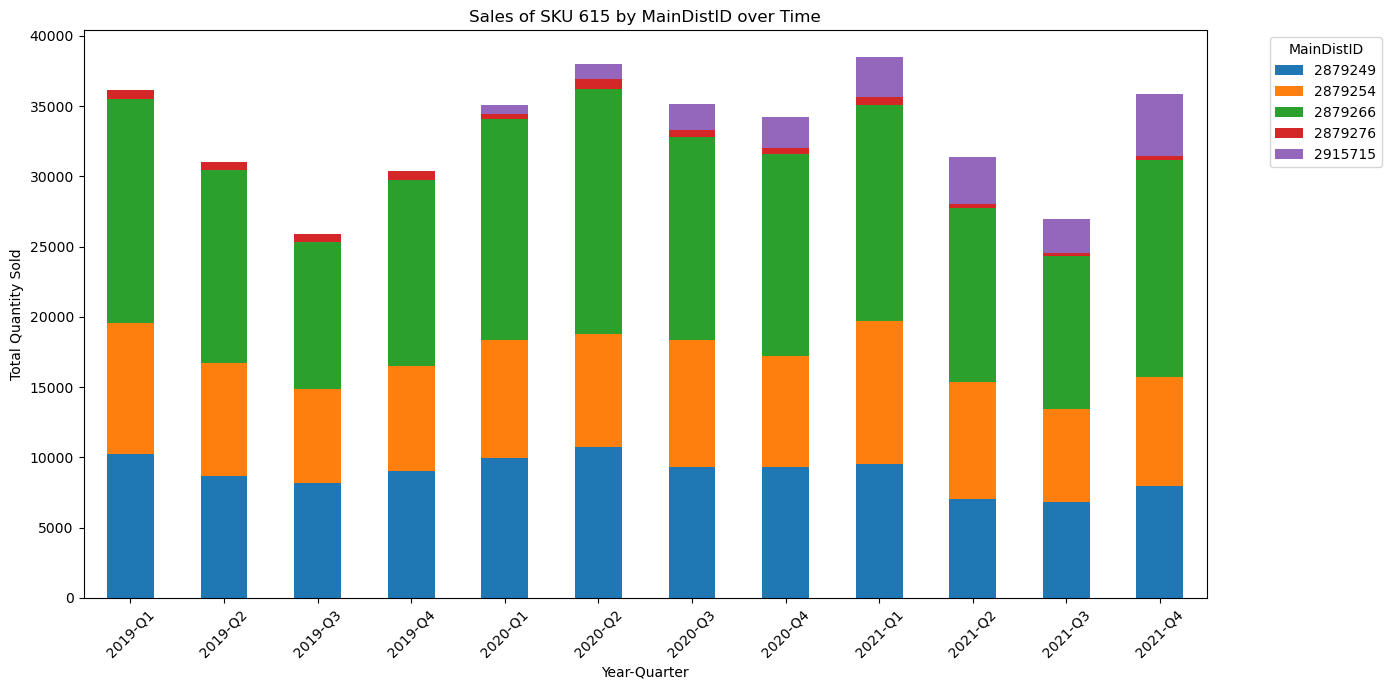

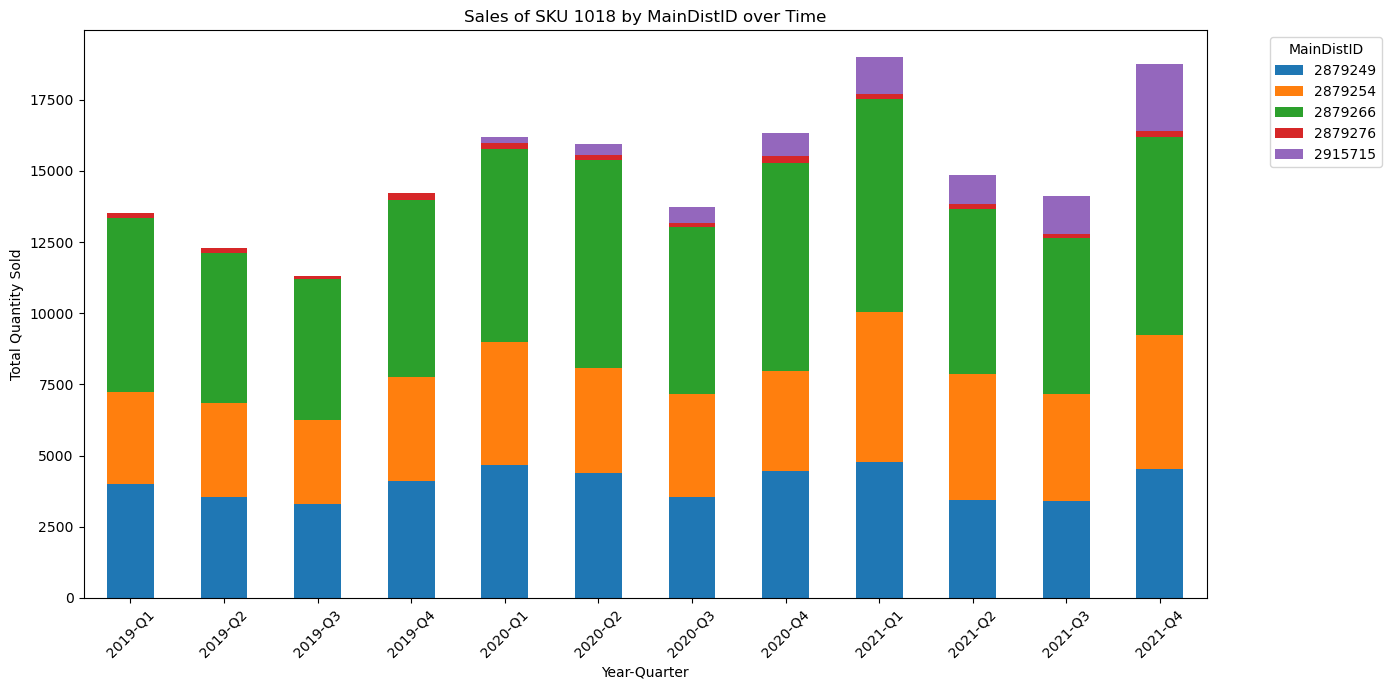

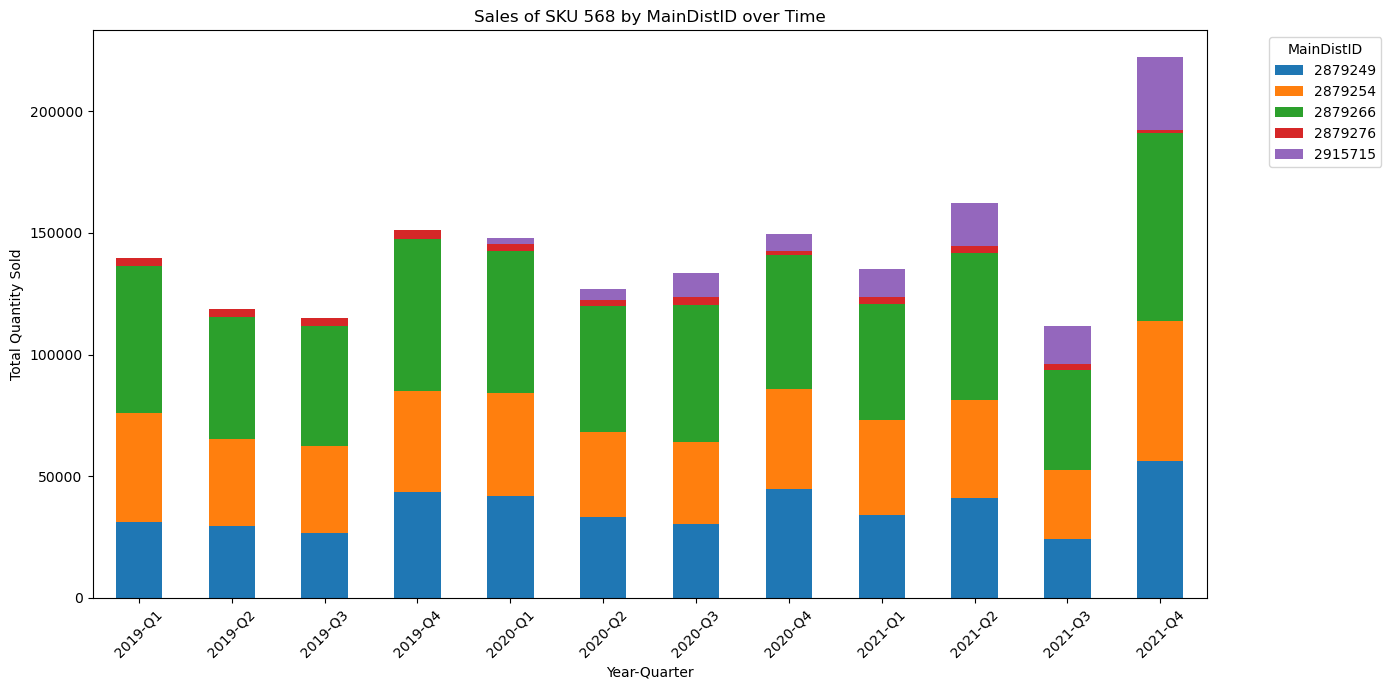

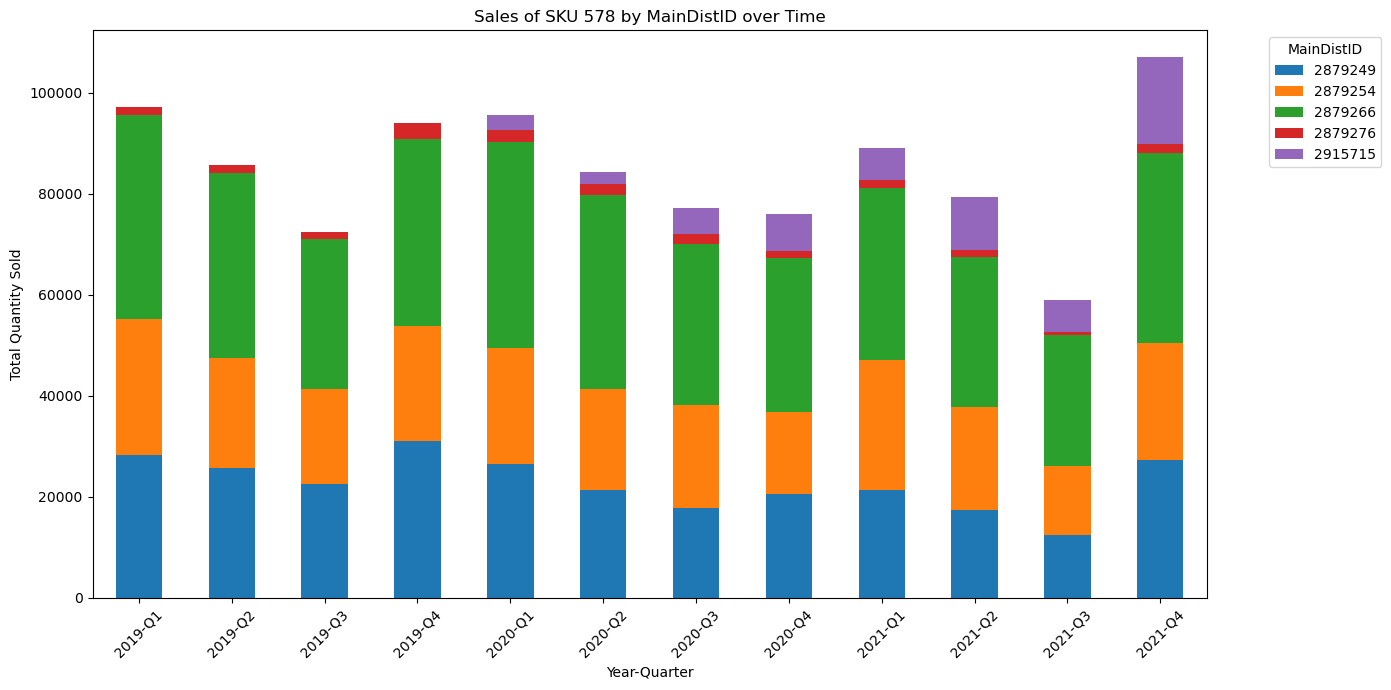

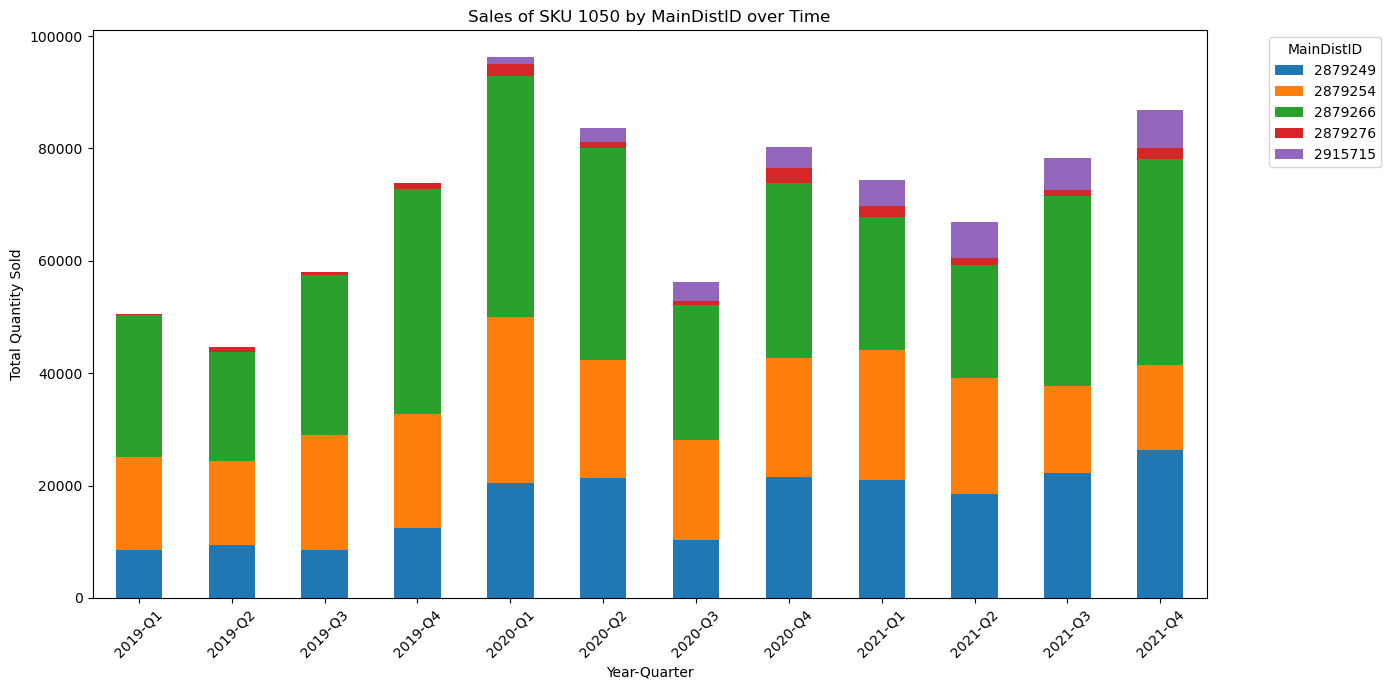

In [203]:
for sku_id in all_sku_ids:
    sku_data = main_dist_data_quarterly[main_dist_data_quarterly['SkuID'] == sku_id]
    sku_data.set_index(['Year', 'Quarter'], inplace=True)
    plot_sku_main_dist(sku_id)

In [204]:
sku_319 = main_dist_data_quarterly[main_dist_data_quarterly['SkuID'] == "319"]
sku_319

Year  Quarter MainDistID SkuID  TotalQuantity
30   2019        1    2879249   319          11532
37   2019        1    2879254   319          11940
48   2019        1    2879266   319          20318
55   2019        1    2879276   319           1014
93   2019        2    2879249   319          11418
100  2019        2    2879254   319          10838
111  2019        2    2879266   319          17920
118  2019        2    2879276   319            903
157  2019        3    2879249   319          11204
164  2019        3    2879254   319          10970
175  2019        3    2879266   319          18082
182  2019        3    2879276   319           1041
221  2019        4    2879249   319          13515
228  2019        4    2879254   319          12481
238  2019        4    2879266   319          21149
245  2019        4    2879276   319           1098
283  2020        1    2879249   319          14976
290  2020        1    2879254   319          14821
301  2020        1    2879266   319          22883
308  2020        1    2879276   319           1099
322  2020        1    2915715   319            681
352  2020        2    2879249   319          12291
359  2020        2    2879254   319          12173
369  2020        2    2879266   319          21039
376  2020        2    2879276   319           1021
393  2020        2    2915715   319            814
425  2020        3    2879249   319          11835
432  2020        3    2879254   319          13062
443  2020        3    2879266   319          21664
450  2020        3    2879276   319            879
466  2020        3    2915715   319           1736
497  2020        4    2879249   319          15984
504  2020        4    2879254   319          13843
518  2020        4    2879266   319          23813
525  2020        4    2879276   319            917
543  2020        4    2915715   319           3098
571  2021        1    2879249   319          14424
578  2021        1    2879254   319          16839
592  2021        1    2879266   319          24278
599  2021        1    2879276   319           1034
614  2021        1    2915715   319           3612
645  2021        2    2879249   319          11320
652  2021        2    2879254   319          14145
667  2021        2    2879266   319          21809
674  2021        2    2879276   319            788
689  2021        2    2915715   319           3799
722  2021        3    2879249   319          10708
729  2021        3    2879254   319          13072
744  2021        3    2879266   319          21105
751  2021        3    2879276   319            843
765  2021        3    2915715   319           5069
797  2021        4    2879249   319          15449
804  2021        4    2879254   319          18467
821  2021        4    2879266   319          31130
828  2021        4    2879276   319            984
843  2021        4    2915715   319           7853

### Is there any Trend, Seasonality, Randomness, Slighlty Increasing Trend, or Decreasing Trend in the data?

SKU 319


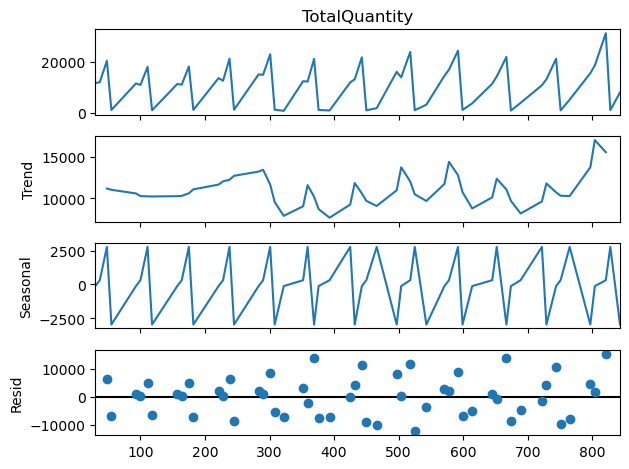

SKU 509


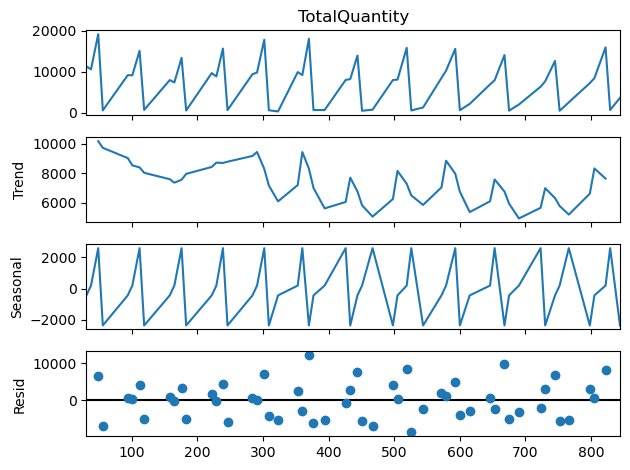

SKU 615


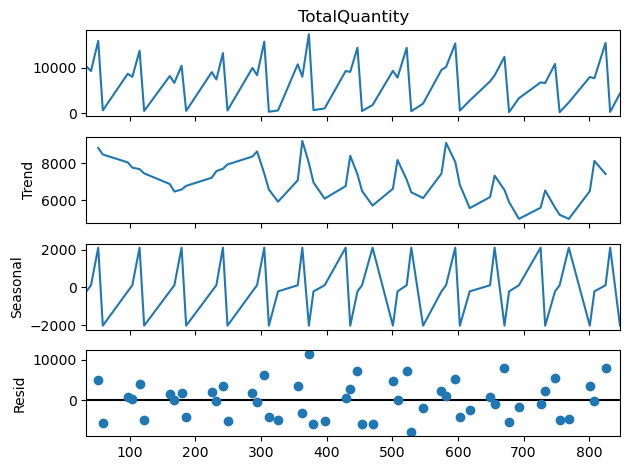

SKU 1018


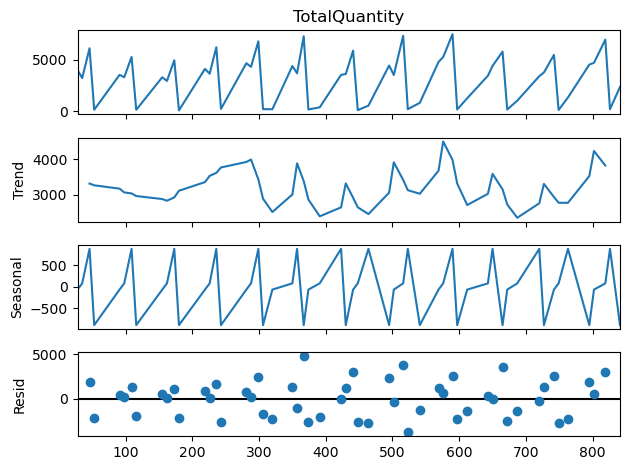

SKU 568


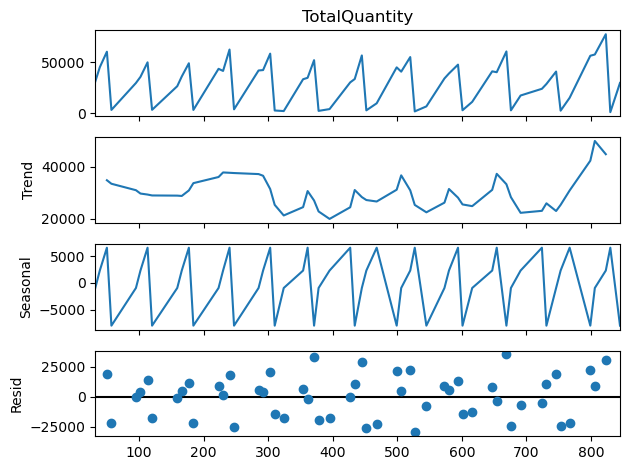

SKU 578


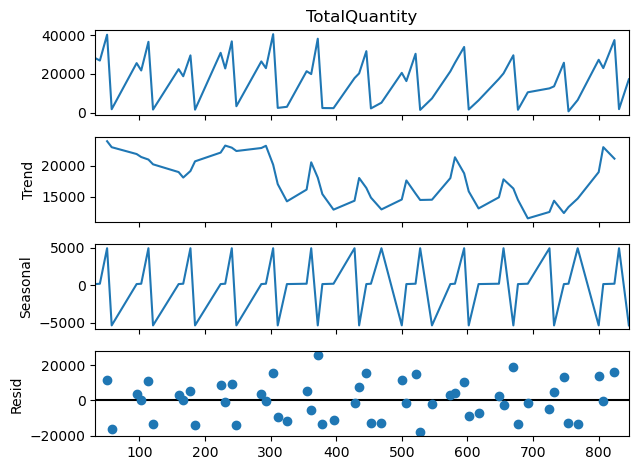

SKU 1050


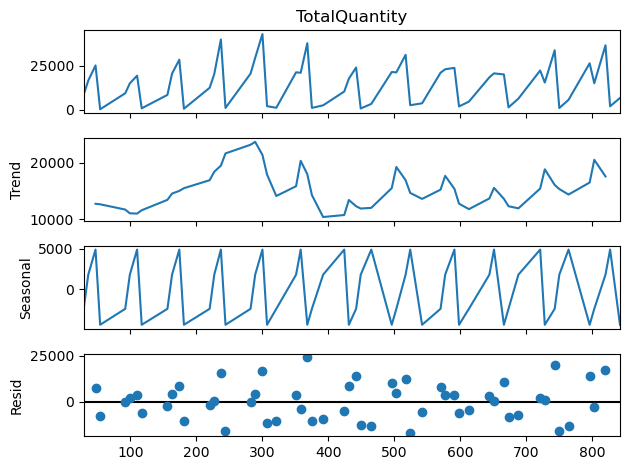

In [205]:
from statsmodels.tsa.seasonal import seasonal_decompose

for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    sku_data = main_dist_data_quarterly[main_dist_data_quarterly['SkuID'] == sku_id]
    result = seasonal_decompose(sku_data['TotalQuantity'], model='additive', period=4)
    result.plot()
    plt.show()

# Forecasting

### Evaluation Metrics
- Mean Absolute Percentage Error (MAPE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Bias


In [206]:
def calculate_metrics(actual, forecasted):
    mape = (np.abs((forecasted - actual) / actual).replace([np.inf, -np.inf], np.nan).dropna()).mean()
    mse = ((forecasted - actual) ** 2).mean()
    rmse = mse ** 0.5
    bias = (forecasted - actual).mean()
    return mape, mse, rmse, bias

## Naive - Moving Average - Exponential Smoothing Forecasting Methods

### Quarterly Sales Analysis and Forecasting

#### Training and Testing Data
- Training Data: 2019-Q1 to 2020-Q4
- Testing Data: 2021-Q1 to 2021-Q4

```python
train = sku_data['TotalQuantity'][:-4]
test = sku_data['TotalQuantity'][-4:]
```

In [207]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def NaiveForecast(train_data, forecast_periods=4):
    forecast = train_data[-1:].values[0]
    return np.array([forecast] * forecast_periods)

def MovingAverageForecast(train_data, forecast_periods=4):
    forecast = np.array([train_data.mean()] * forecast_periods)
    return forecast

def ExponentialSmoothingForecast(train_data, forecast_periods=4):
    exp_smoothing = ExponentialSmoothing(train_data.squeeze(), seasonal='add', seasonal_periods=4, trend='add').fit()
    forecast = exp_smoothing.forecast(forecast_periods)
    return forecast


In [208]:
def plot_forecasts_and_calculate_metrics_quarterly(sku_id):
    df = main_dist_data_quarterly[main_dist_data_quarterly['SkuID'] == sku_id]
    df['Date'] = df.apply(lambda row: f"{row['Year']}-Q{row['Quarter']}", axis=1)
    df['Date'] = pd.PeriodIndex(df['Date'], freq='Q').to_timestamp()
    df.set_index('Date', inplace=True)
    df = df.drop(columns=['Year', 'Quarter'])

    # Ensure the series is of numeric type
    df = df.astype(float)

    metrics = {}

    for main_dist_id in df['MainDistID'].unique():
        main_dist_data = df[df['MainDistID'] == main_dist_id]['TotalQuantity']
        train = main_dist_data[:-4]
        test = main_dist_data[-4:]

        # Check if the data is not enough
        if len(test) < 4:
            print(f"Not enough data for testing forecasting for MainDistID {main_dist_id}. Skipping.")
            continue

        if len(train) < 8:
            print(f"Not enough data for training forecasting for MainDistID {main_dist_id}. Skipping.")
            continue

        # Forecasting methods
        naive_forecast = NaiveForecast(train, forecast_periods=4)
        moving_avg_forecast = MovingAverageForecast(train, forecast_periods=4)
        ses_forecast = ExponentialSmoothingForecast(train, forecast_periods=4)

        # Calculate metrics
        naive_mape, naive_mse, naive_rmse, naive_bias = calculate_metrics(test, naive_forecast)
        moving_avg_mape, moving_avg_mse, moving_avg_rmse, moving_avg_bias = calculate_metrics(test, moving_avg_forecast)
        ses_mape, ses_mse, ses_rmse, ses_bias = calculate_metrics(test, ses_forecast)

        metrics[main_dist_id] = {
            'Naive': {'MAPE': naive_mape, 'MSE': naive_mse, 'RMSE': naive_rmse, 'Bias': naive_bias},
            'Moving Average': {'MAPE': moving_avg_mape, 'MSE': moving_avg_mse, 'RMSE': moving_avg_rmse, 'Bias': moving_avg_bias},
            'Exponential Smoothing': {'MAPE': ses_mape, 'MSE': ses_mse, 'RMSE': ses_rmse, 'Bias': ses_bias},
        }

        # Plotting
        plt.figure(figsize=(14, 7))
        plt.plot(train.index, train, label='Original (Train)')
        plt.plot(test.index, test, label='Original (Test)', color='gray')
        plt.plot(test.index, naive_forecast, label='Naive Forecast', linestyle='--')
        plt.plot(test.index, moving_avg_forecast, label='Moving Average Forecast', linestyle='--')
        plt.plot(test.index, ses_forecast, label='Exponential Smoothing Forecast', linestyle='--')

        plt.title(f'Sales Forecast for SKU {sku_id} - MainDistID {main_dist_id}')
        plt.xlabel('Year-Quarter')
        plt.ylabel('Total Quantity Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    metrics_df = pd.DataFrame.from_dict({(i,j): metrics[i][j]
                             for i in metrics.keys()
                             for j in metrics[i].keys()},
                            orient='index')
    metrics_df.index = metrics_df.index.rename(['MainDistID', 'Method'])
    metrics_df.index = metrics_df.index.set_levels(metrics_df.index.levels[0].astype(int), level=0)

    return metrics_df

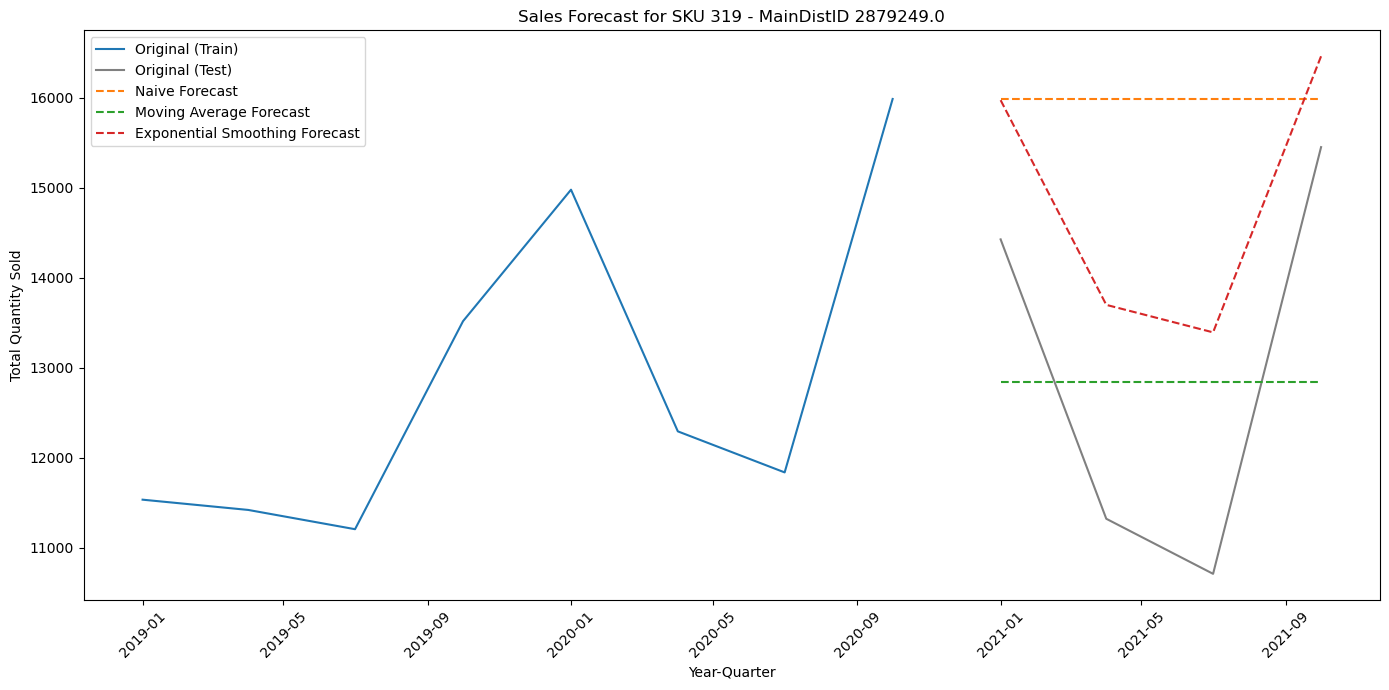

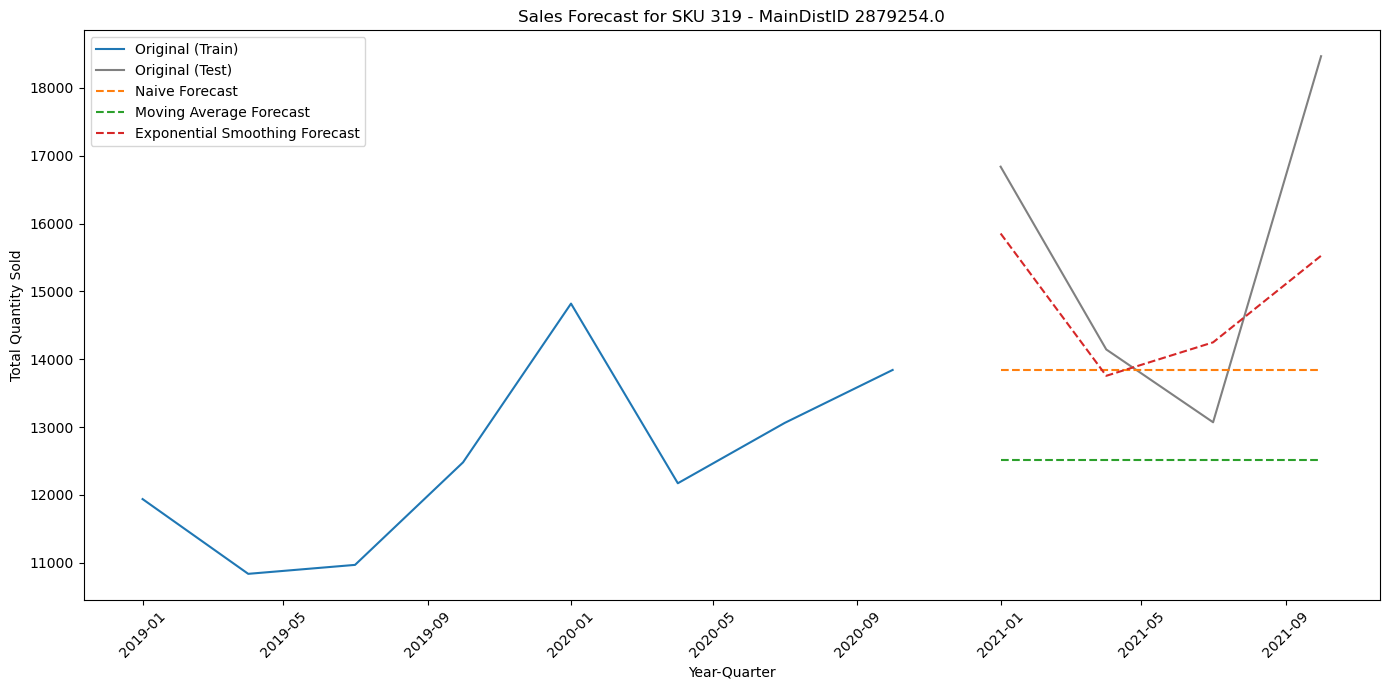

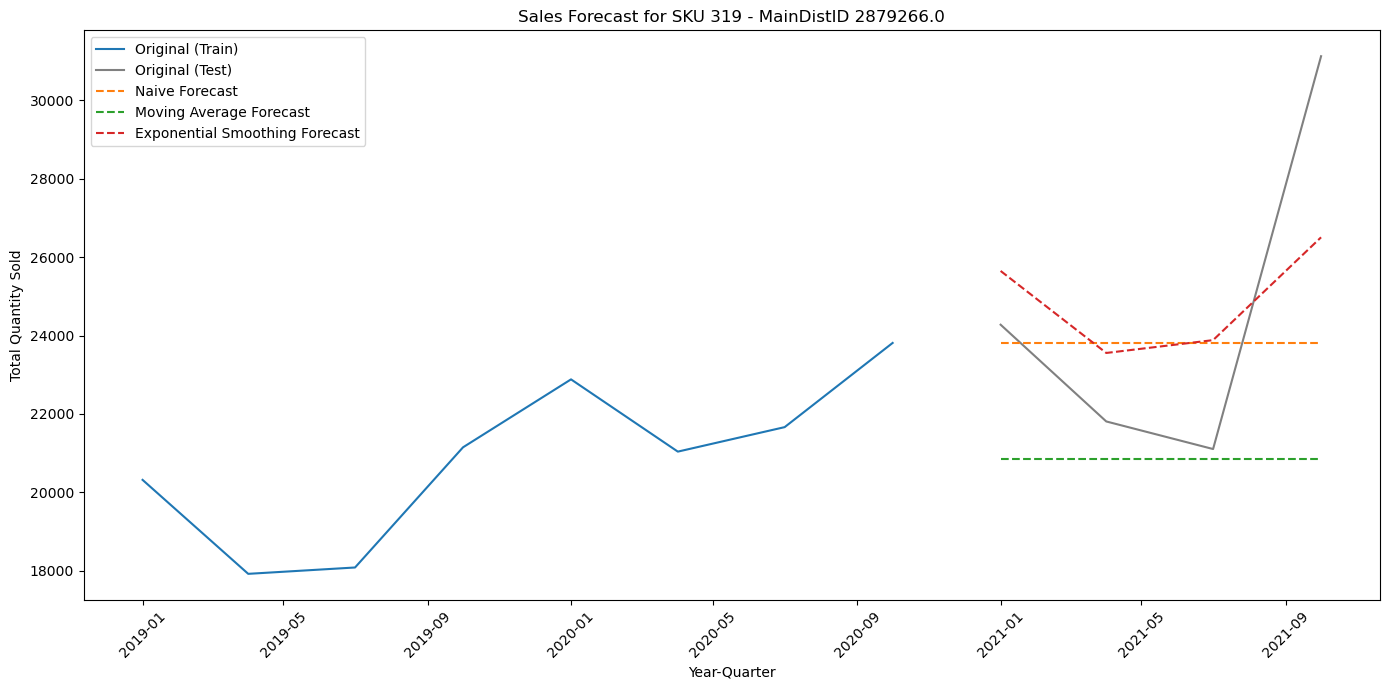

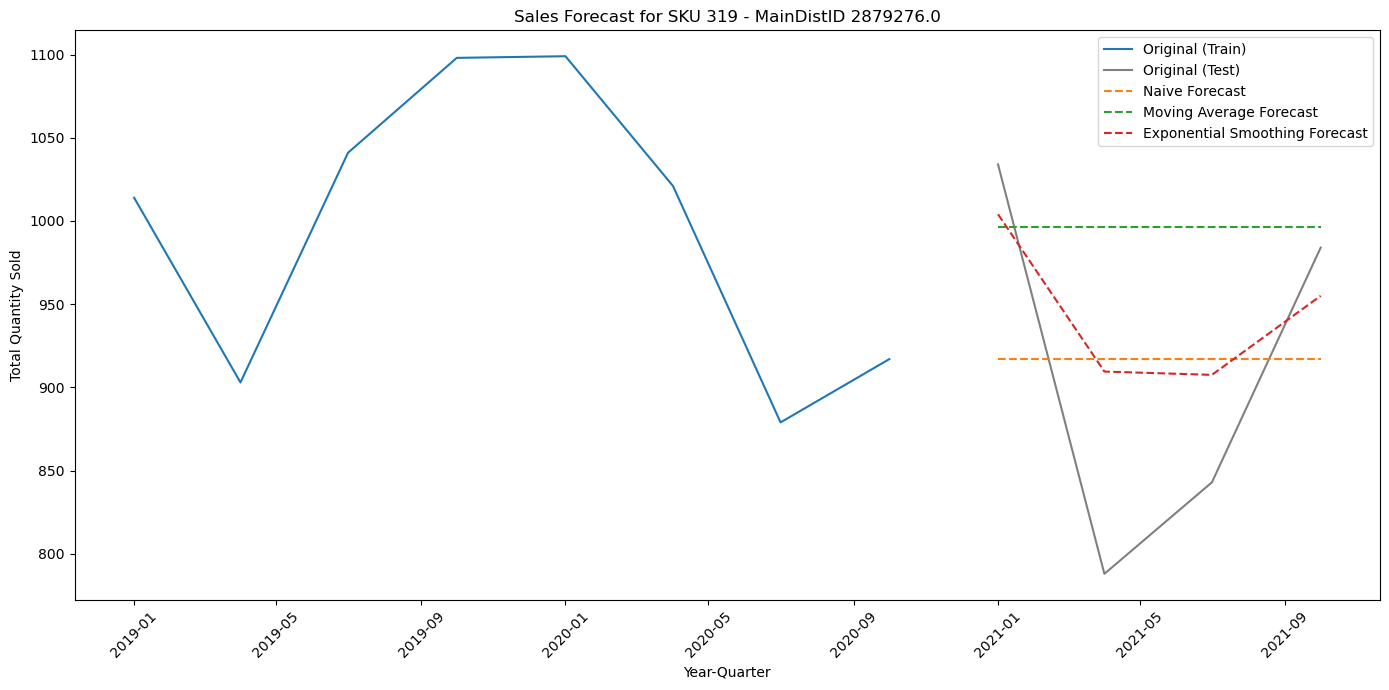

Not enough data for training forecasting for MainDistID 2915715.0. Skipping.


In [209]:
metrics_df_quarterly = plot_forecasts_and_calculate_metrics_quarterly('319')

In [210]:
metrics_df_quarterly

MAPE           MSE         RMSE  \
MainDistID Method                                                       
2879249    Naive                  0.261878  1.307722e+07  3616.244495   
           Moving Average         0.153071  4.041776e+06  2010.416861   
           Exponential Smoothing  0.158275  4.064582e+06  2016.080954   
2879254    Naive                  0.127161  7.760759e+06  2785.813930   
           Moving Average         0.184168  1.426638e+07  3777.085748   
           Exponential Smoothing  0.083824  2.789254e+06  1670.106115   
2879266    Naive                  0.118600  1.627600e+07  4034.352302   
           Moving Average         0.131516  2.954023e+07  5435.092111   
           Exponential Smoothing  0.104200  8.505346e+06  2916.392709   
2879276    Naive                  0.108182  1.007375e+04   100.368073   
           Moving Average         0.123913  1.714925e+04   130.955145   
           Exponential Smoothing  0.072301  5.168477e+03    71.892122   

                                         Bias  
MainDistID Method                              
2879249    Naive                  3008.750000  
           Moving Average         -130.875000  
           Exponential Smoothing  1904.042603  
2879254    Naive                 -1787.750000  
           Moving Average        -3114.750000  
           Exponential Smoothing  -784.055170  
2879266    Naive                  -767.500000  
           Moving Average        -3722.000000  
           Exponential Smoothing   319.320013  
2879276    Naive                     4.750000  
           Moving Average           84.250000  
           Exponential Smoothing    31.791544

In [211]:
metrics_df_quarterly.loc[(2879254, 'Moving Average')]

MAPE    1.841685e-01
MSE     1.426638e+07
RMSE    3.777086e+03
Bias   -3.114750e+03
Name: (2879254, Moving Average), dtype: float64

### Monthly Sales Analysis and Forecasting

In [212]:
main_dist_data_monthly = data.copy()
main_dist_data_monthly = main_dist_data_monthly[main_dist_data_monthly['MainDistID'].isin(highest_main_dist_ids)]
main_dist_data_monthly['Year'] = main_dist_data_monthly['Date'].dt.year
main_dist_data_monthly['Month'] = main_dist_data_monthly['Date'].dt.month

main_dist_data_monthly = main_dist_data_monthly.groupby(['Year', 'Month', 'MainDistID', 'SkuID']).agg({'TotalQuantity': 'sum'}).reset_index()
main_dist_data_monthly

Year  Month MainDistID SkuID  TotalQuantity
0     2019      1    2879249  1018           1220
1     2019      1    2879249  1050           2115
2     2019      1    2879249   319           3988
3     2019      1    2879249   509           3542
4     2019      1    2879249   568          12263
...    ...    ...        ...   ...            ...
1171  2021     12    2915715   319           3117
1172  2021     12    2915715   509           1302
1173  2021     12    2915715   568           5077
1174  2021     12    2915715   578           3564
1175  2021     12    2915715   615           1259

[1176 rows x 5 columns]

In [213]:
def plot_sku_main_dist_monthly(sku_id):
    sku_data = main_dist_data_monthly[main_dist_data_monthly['SkuID'] == sku_id]
    sku_data['YearMonth'] = sku_data['Year'].astype(str) + '-' + sku_data['Month'].astype(str).str.zfill(2)
    pivot_table = sku_data.pivot(index='YearMonth', columns='MainDistID', values='TotalQuantity')
    pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))
    plt.title(f'Sales of SKU {sku_id} by MainDistID over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Quantity Sold')
    plt.legend(title='MainDistID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

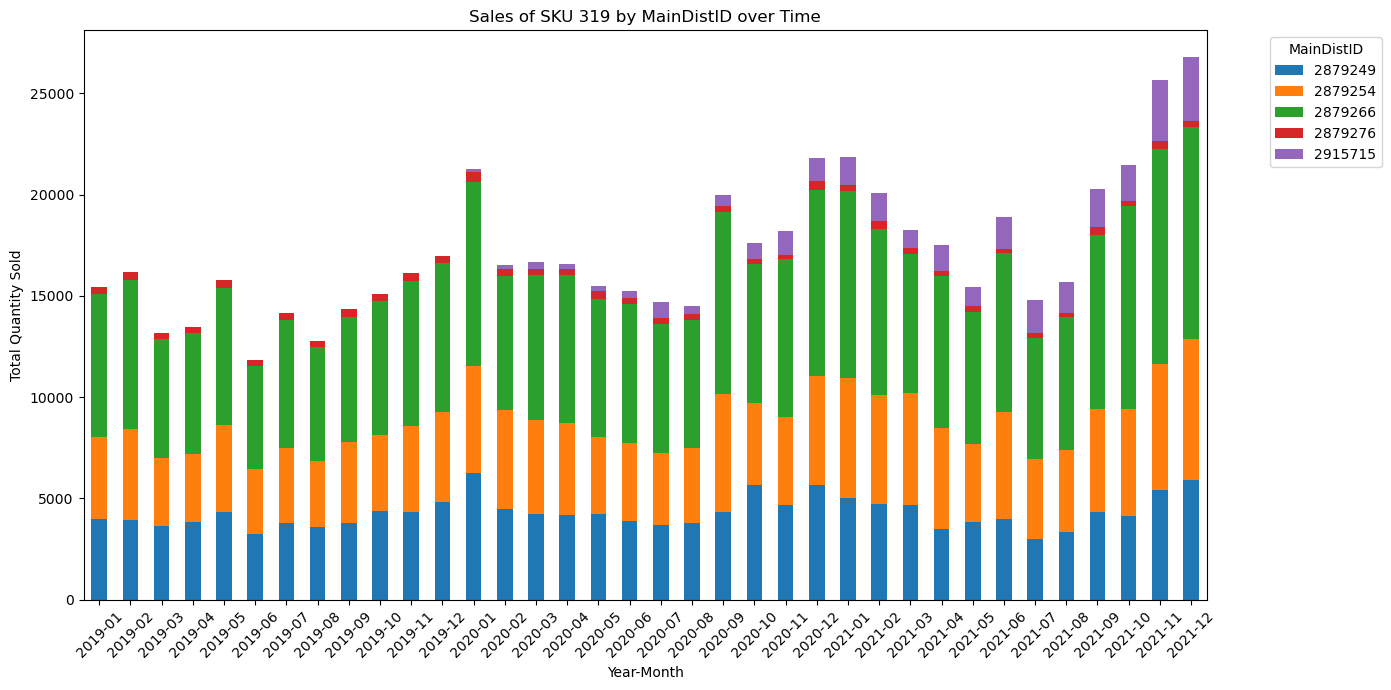

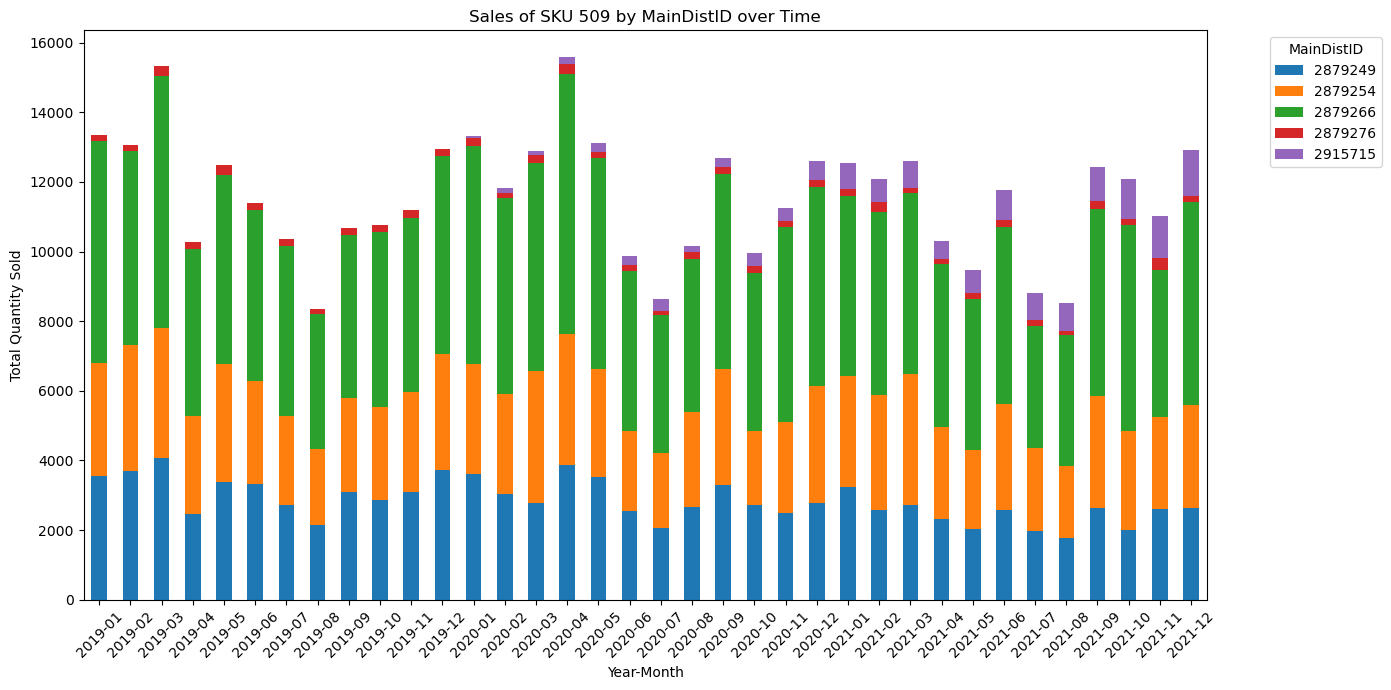

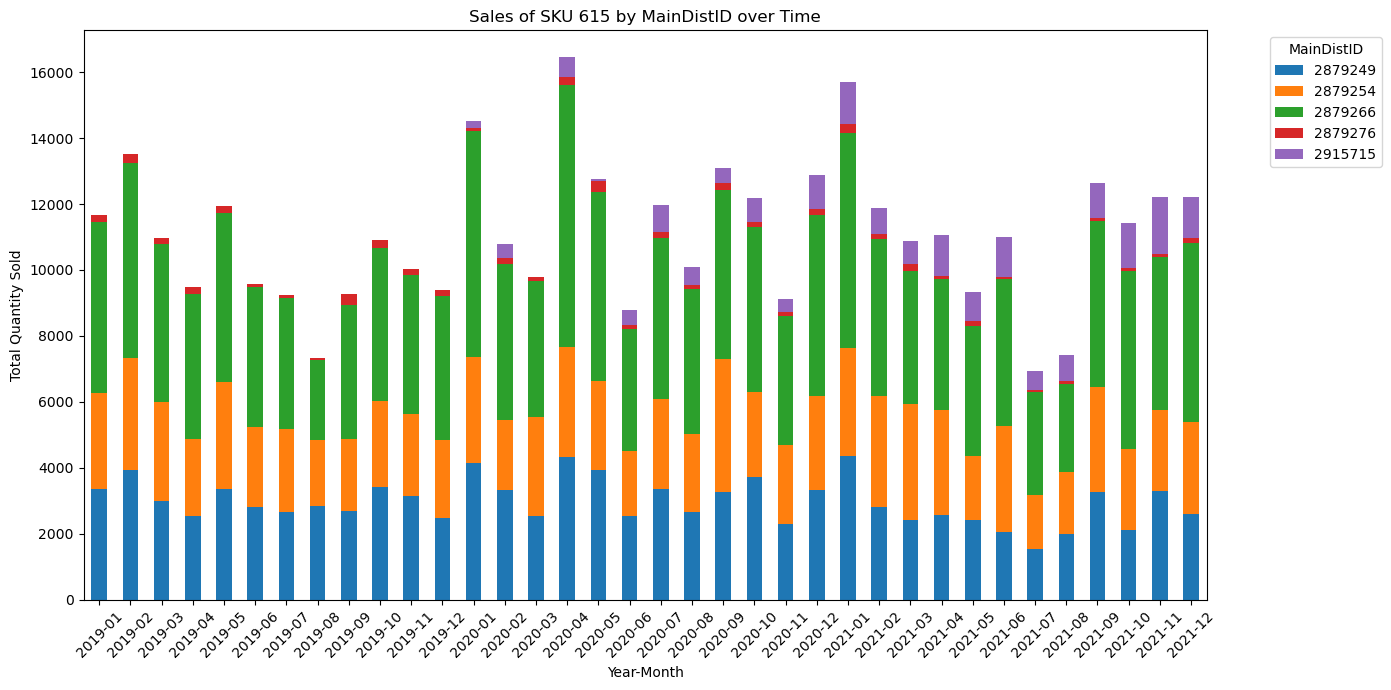

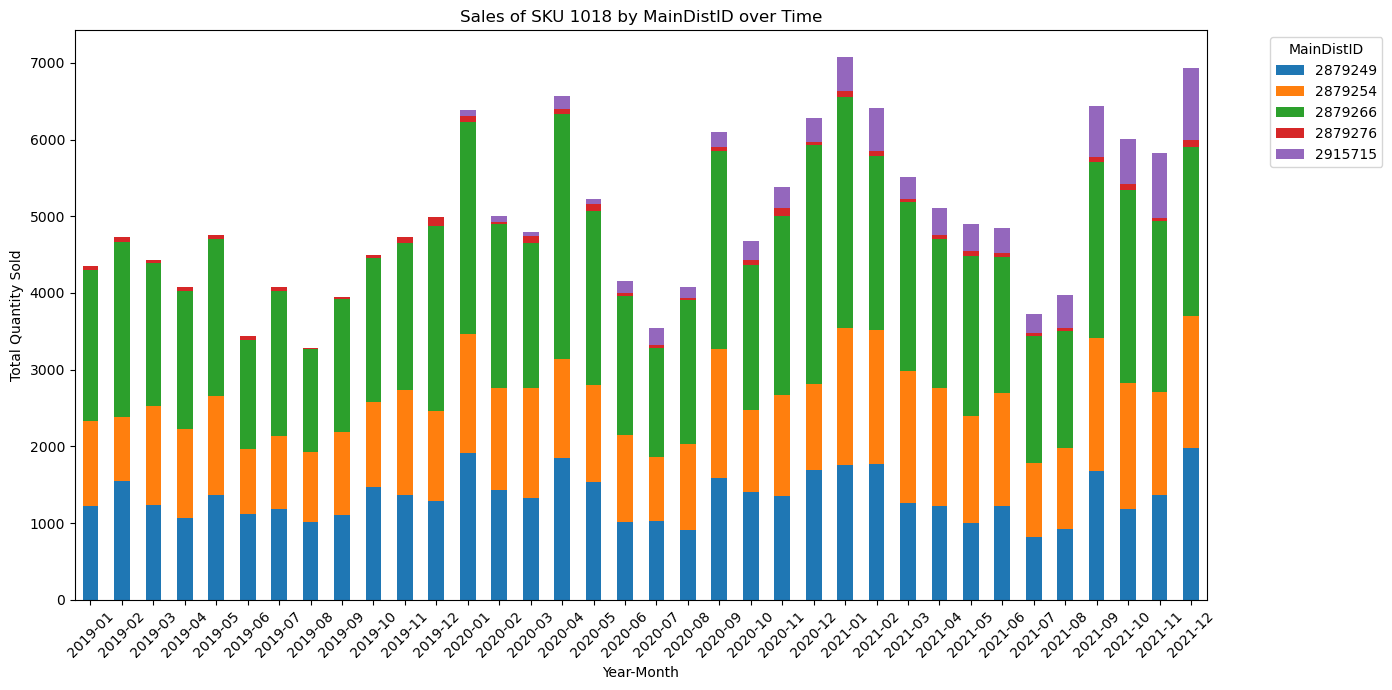

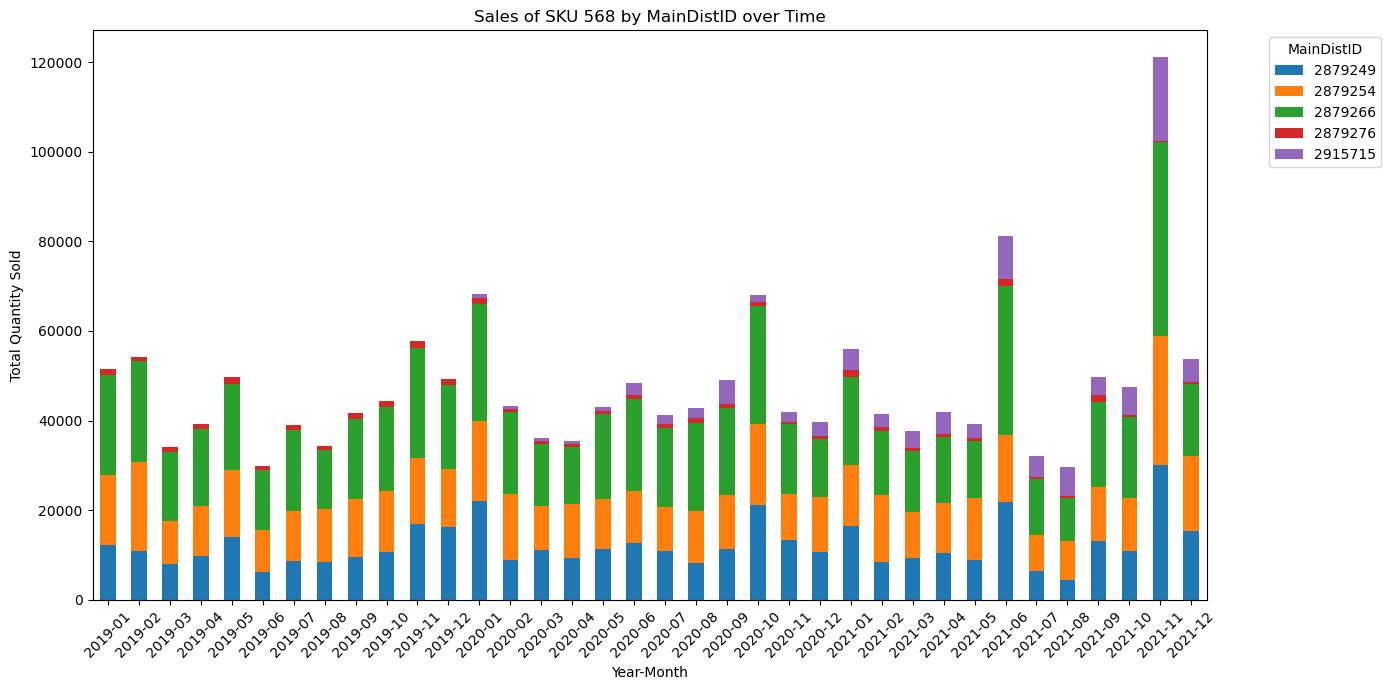

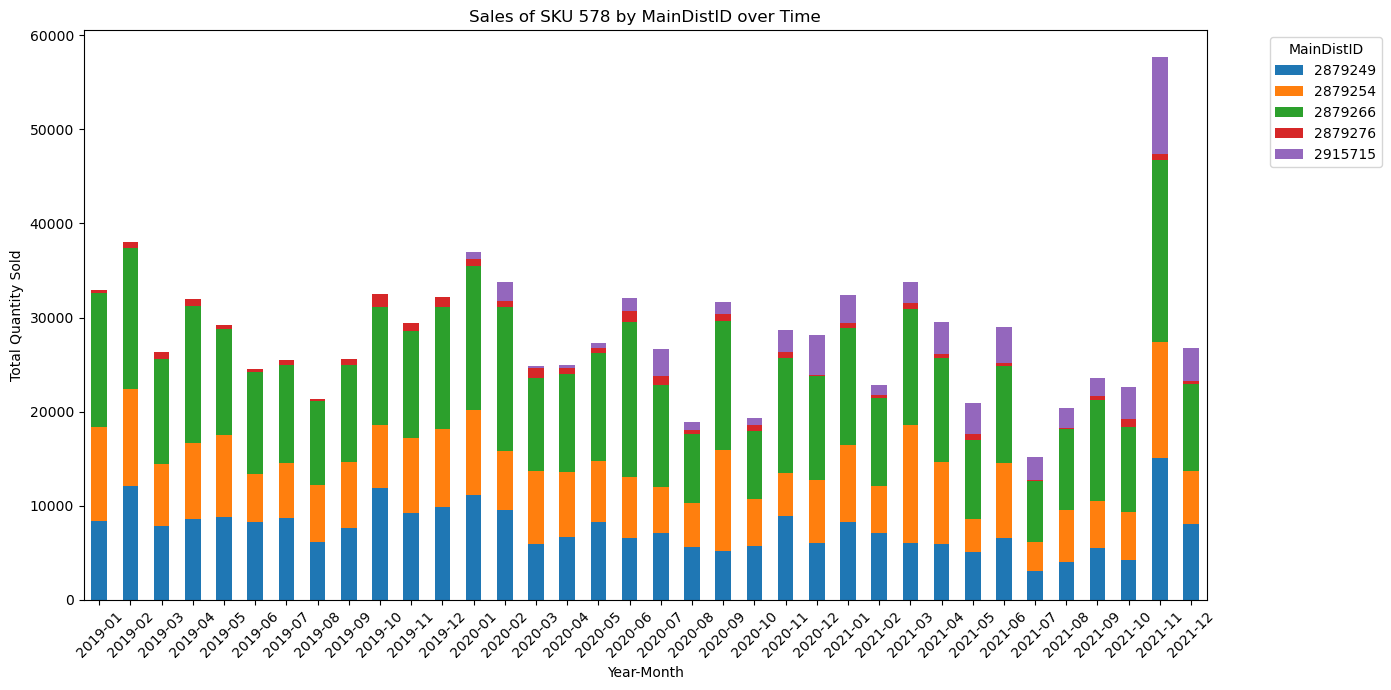

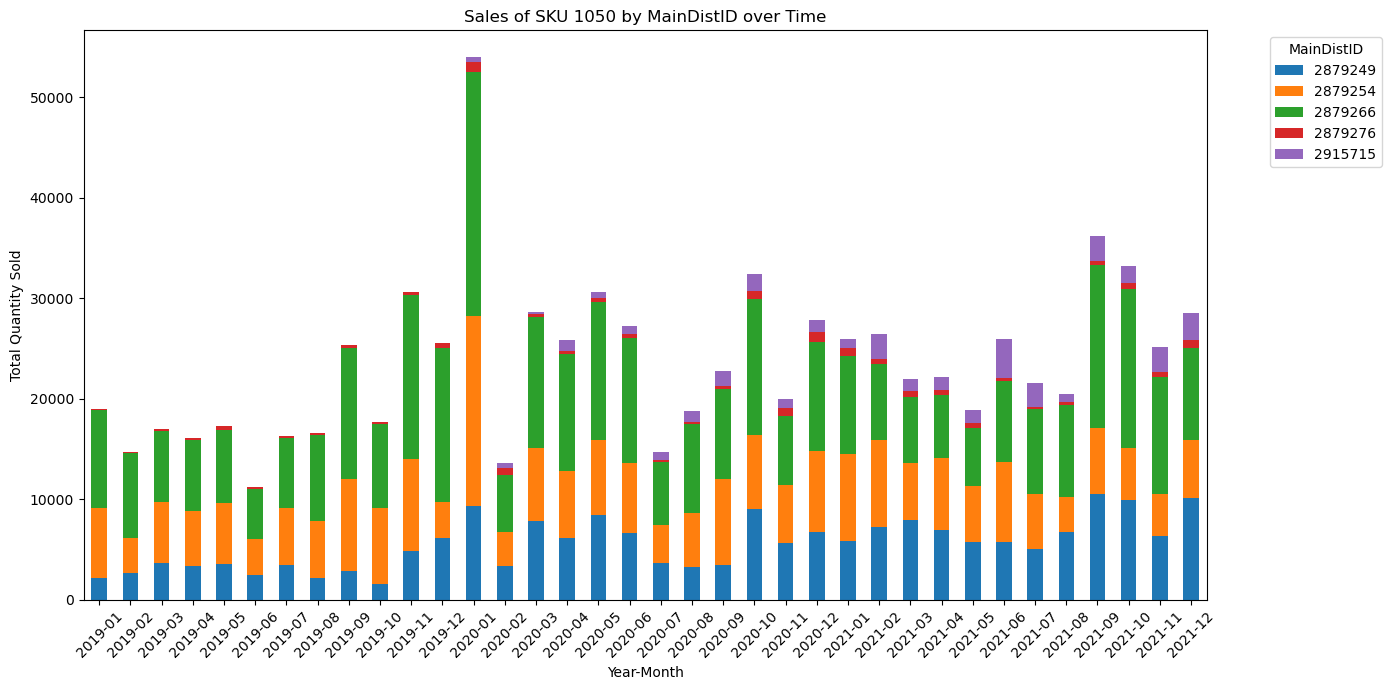

In [214]:
for sku_id in all_sku_ids:
    sku_data = main_dist_data_monthly[main_dist_data_monthly['SkuID'] == sku_id]
    sku_data.set_index(['Year', 'Month'], inplace=True)
    plot_sku_main_dist_monthly(sku_id)

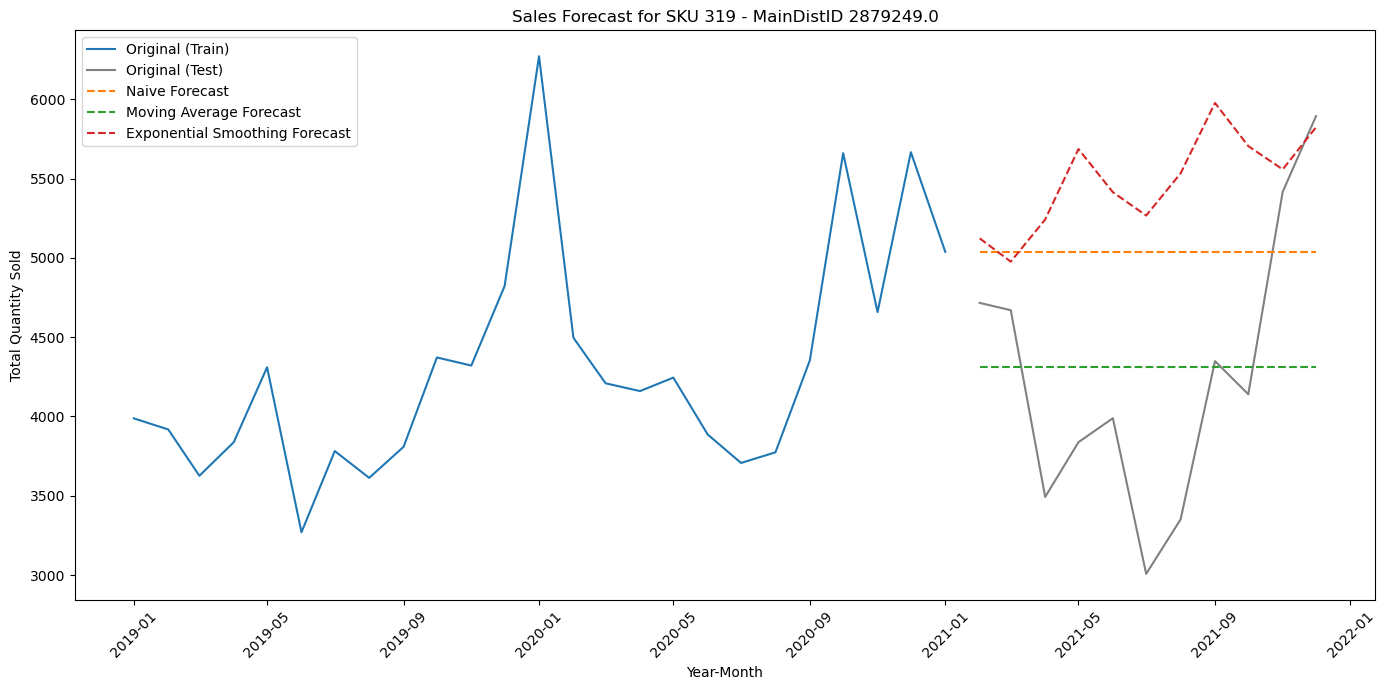

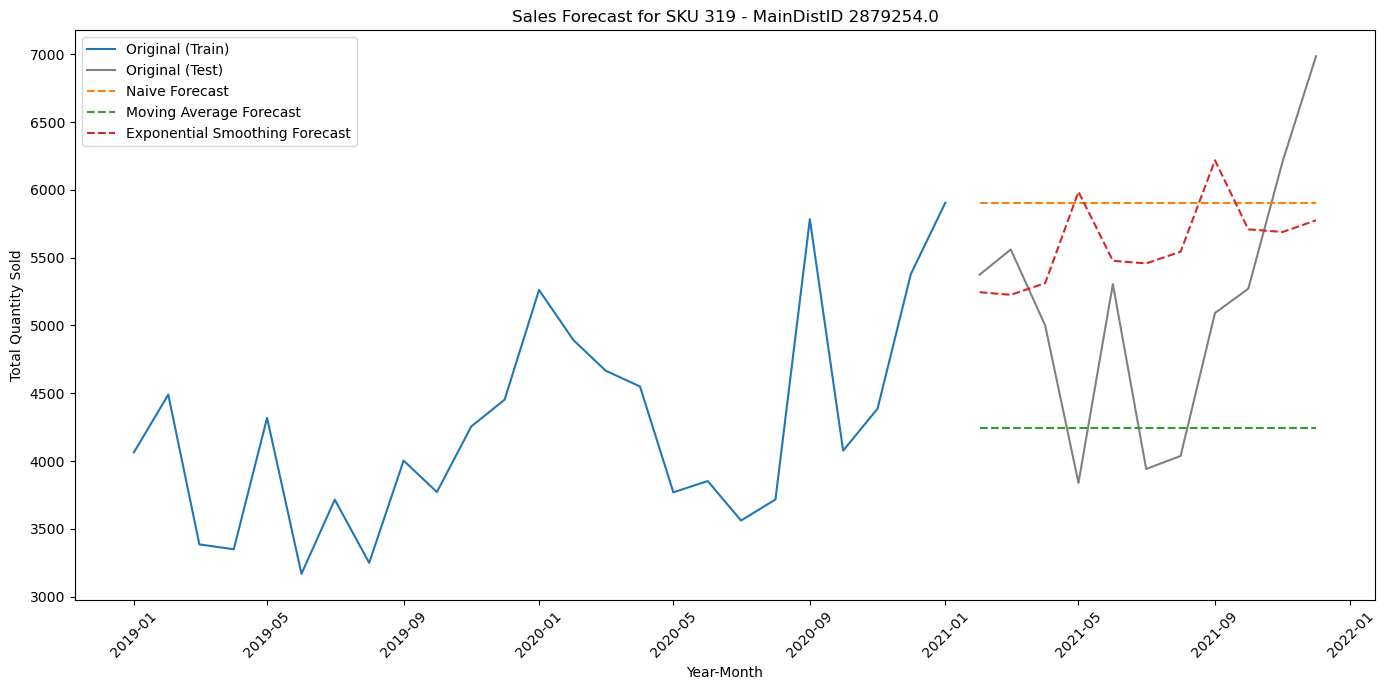

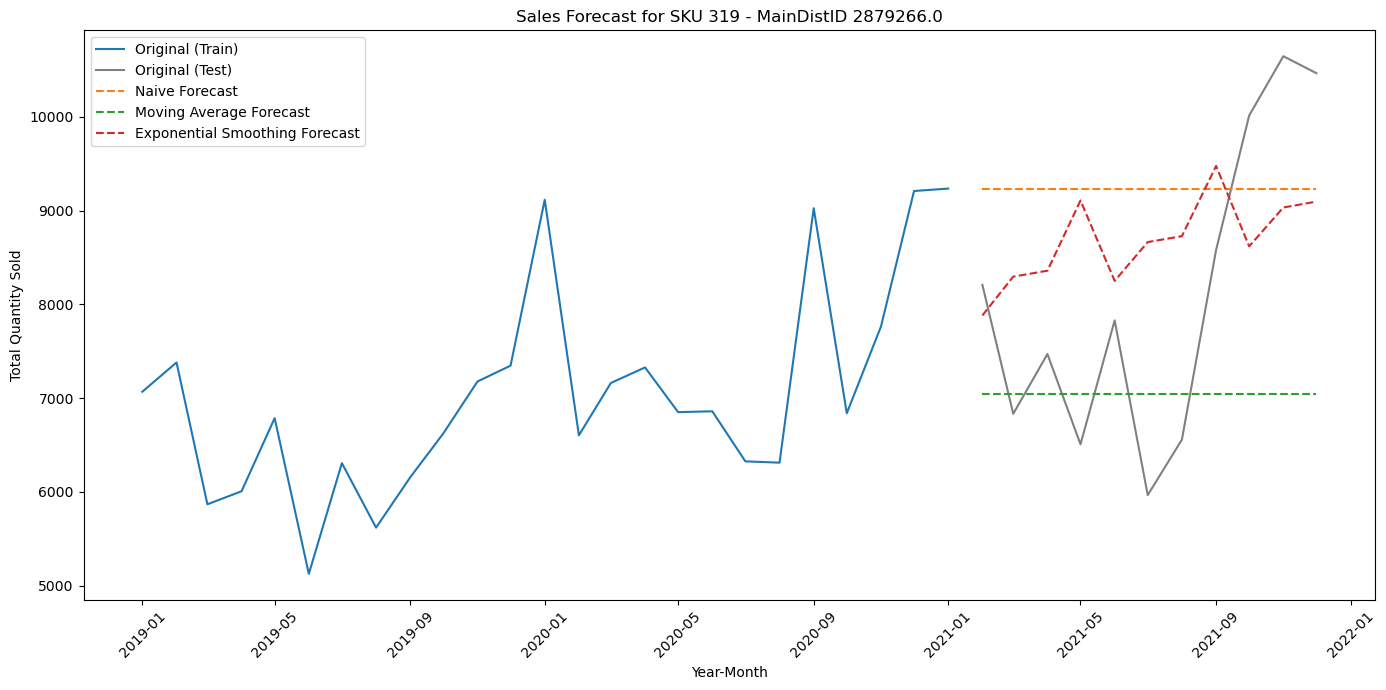

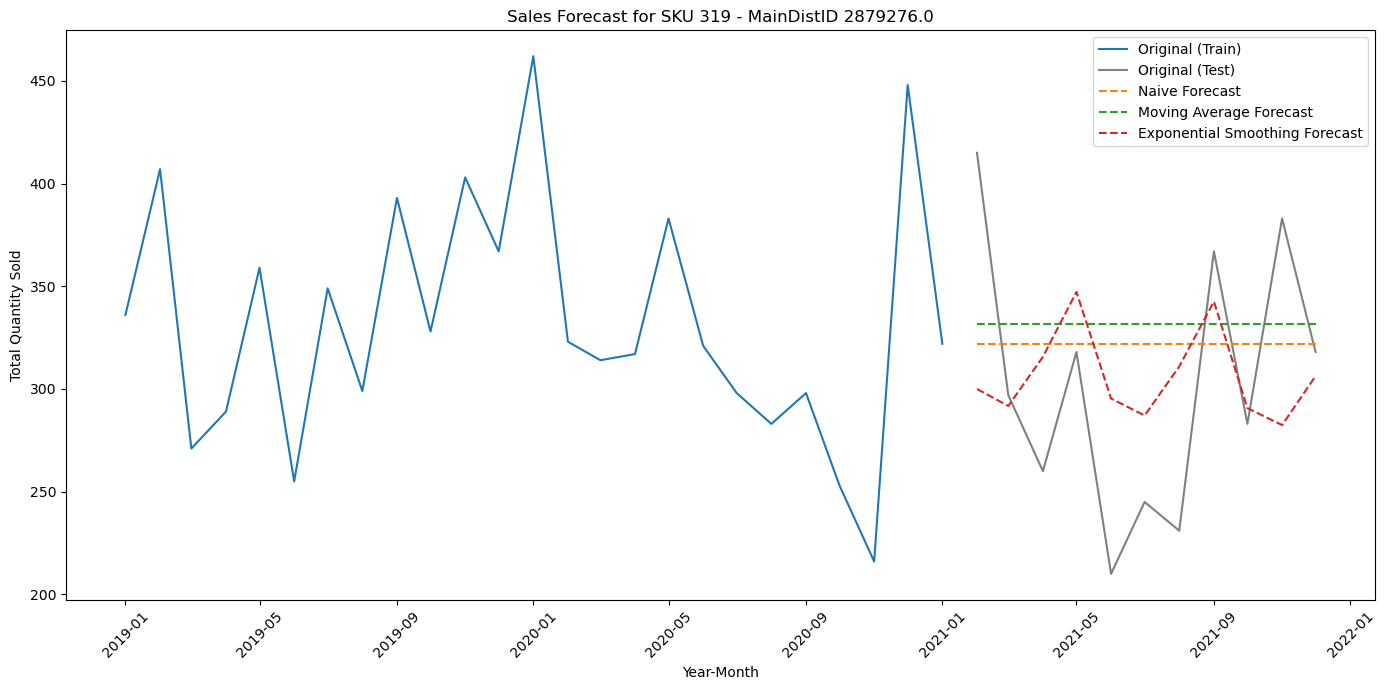

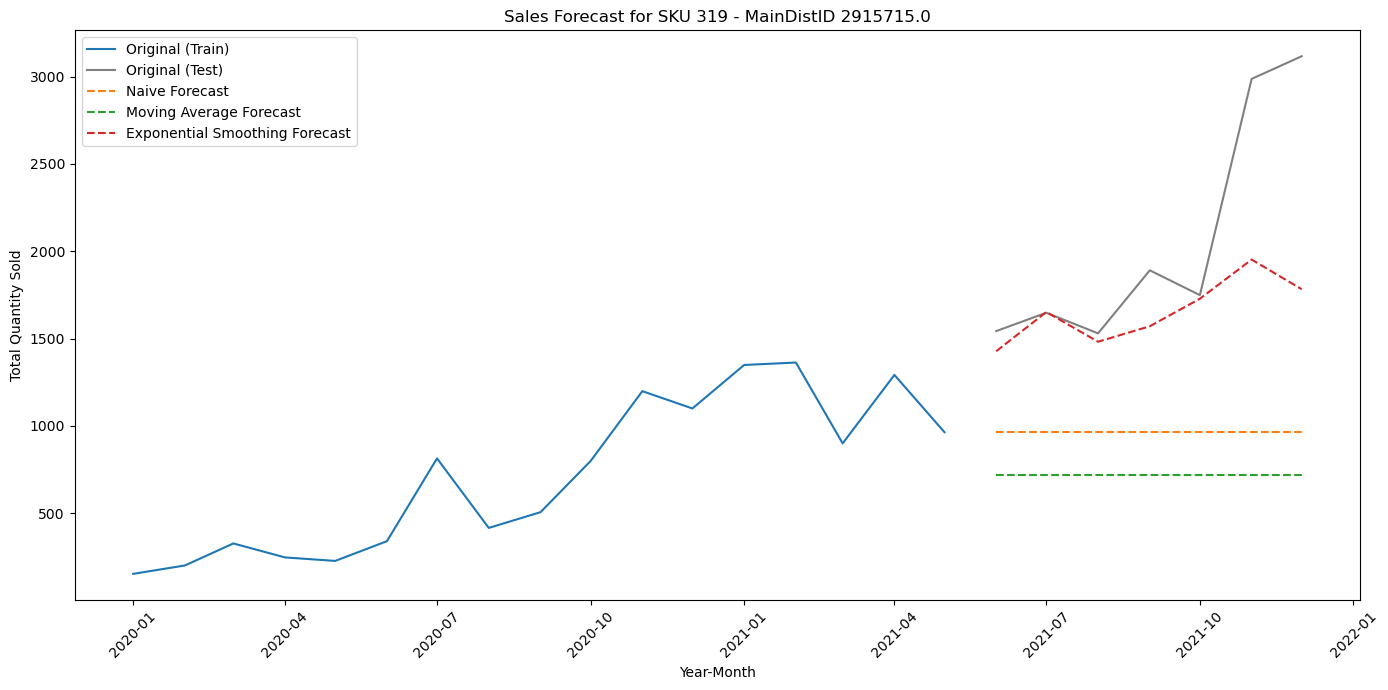

In [215]:

def plot_forecasts_and_calculate_metrics_monthly(sku_id):
    df = main_dist_data_monthly[main_dist_data_monthly['SkuID'] == sku_id]
    df['Date'] = df.apply(lambda row: f"{row['Year']}-{row['Month']}", axis=1)
    df['Date'] = pd.PeriodIndex(df['Date'], freq='M').to_timestamp()
    df.set_index('Date', inplace=True)
    df = df.drop(columns=['Year', 'Month'])
    df = df.astype(float)

    metrics = {}

    for main_dist_id in df['MainDistID'].unique():
        main_dist_data = df[df['MainDistID'] == main_dist_id]['TotalQuantity']
        
        test_size = int(len(main_dist_data)*0.333)
        train = main_dist_data[:-test_size]
        test = main_dist_data[-test_size:]
        
        # Forecasting methods
        naive_forecast = NaiveForecast(train, forecast_periods=test_size)
        moving_avg_forecast = MovingAverageForecast(train, forecast_periods=test_size)
        ses_forecast = ExponentialSmoothingForecast(train, forecast_periods=test_size)
        
        # Calculate metrics
        naive_mape, naive_mse, naive_rmse, naive_bias = calculate_metrics(test, naive_forecast)
        moving_avg_mape, moving_avg_mse, moving_avg_rmse, moving_avg_bias = calculate_metrics(test, moving_avg_forecast)
        ses_mape, ses_mse, ses_rmse, ses_bias = calculate_metrics(test, ses_forecast)

        metrics[main_dist_id] = {
            'Naive': {'MAPE': naive_mape, 'MSE': naive_mse, 'RMSE': naive_rmse, 'Bias': naive_bias},
            'Moving Average': {'MAPE': moving_avg_mape, 'MSE ': moving_avg_mse, 'RMSE': moving_avg_rmse, 'Bias': moving_avg_bias},
            'Exponential Smoothing': {'MAPE': ses_mape, 'MSE': ses_mse, 'RMSE': ses_rmse, 'Bias': ses_bias}
        }

        # Plotting
        plt.figure(figsize=(14, 7))
        plt.plot(train.index, train, label='Original (Train)')
        plt.plot(test.index, test, label='Original (Test)', color='gray')
        plt.plot(test.index, naive_forecast, label='Naive Forecast', linestyle='--')
        plt.plot(test.index, moving_avg_forecast, label='Moving Average Forecast', linestyle='--')
        plt.plot(test.index, ses_forecast, label='Exponential Smoothing Forecast', linestyle='--')

        plt.title(f'Sales Forecast for SKU {sku_id} - MainDistID {main_dist_id}')
        plt.xlabel('Year-Month')
        plt.ylabel('Total Quantity Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    metrics_df = pd.DataFrame.from_dict({(i,j): metrics[i][j]
                                for i in metrics.keys()
                                for j in metrics[i].keys()},
                                orient='index')
    metrics_df.index = metrics_df.index.rename(['MainDistID', 'Method'])
    metrics_df.index = metrics_df.index.set_levels(metrics_df.index.levels[0].astype(int), level=0)

    return metrics_df

metrics_df_monthly = plot_forecasts_and_calculate_metrics_monthly('319')

In [216]:
metrics_df_monthly

MAPE           MSE         RMSE  \
MainDistID Method                                                       
2879249    Naive                  0.266686  1.298949e+06  1139.714358   
           Moving Average         0.167596           NaN   834.707092   
           Exponential Smoothing  0.334813  2.158330e+06  1469.125567   
2879254    Naive                  0.221370  1.408048e+06  1186.612175   
           Moving Average         0.191226           NaN  1286.830524   
           Exponential Smoothing  0.186946  1.147062e+06  1071.009981   
2879266    Naive                  0.242960  3.797522e+06  1948.723078   
           Moving Average         0.164430           NaN  1901.642583   
           Exponential Smoothing  0.194174  2.655155e+06  1629.464671   
2879276    Naive                  0.203013  4.288273e+03    65.484905   
           Moving Average         0.222944           NaN    69.029397   
           Exponential Smoothing  0.174374  3.960212e+03    62.930218   
2915715    Naive                  0.495324  1.618135e+06  1272.059354   
           Moving Average         0.624388           NaN  1490.796393   
           Exponential Smoothing  0.152012  4.241479e+05   651.266396   

                                         Bias          MSE   
MainDistID Method                                            
2879249    Naive                   777.727273           NaN  
           Moving Average           51.447273  6.967359e+05  
           Exponential Smoothing  1221.586145           NaN  
2879254    Naive                   756.818182           NaN  
           Moving Average         -905.901818  1.655933e+06  
           Exponential Smoothing   456.254436           NaN  
2879266    Naive                  1137.272727           NaN  
           Moving Average        -1054.567273  3.616245e+06  
           Exponential Smoothing   585.035261           NaN  
2879276    Naive                    19.545455           NaN  
           Moving Average           29.305455  4.765058e+03  
           Exponential Smoothing     3.909201           NaN  
2915715    Naive                 -1102.428571           NaN  
           Moving Average        -1348.957983  2.222474e+06  
           Exponential Smoothing  -409.833767           NaN

## Seasonal Forecasting Methods - Triple Exponential Smoothing - ARIMA - SARIMA

### Quarterly Sales Analysis and Forecasting

#### Training and Testing Data
- Training Data: 2019-Q1 to 2020-Q4
- Testing Data: 2021-Q1 to 2021-Q4

```python
train = sku_data['TotalQuantity'][:-4]
test = sku_data['TotalQuantity'][-4:]
```

In [224]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

def TripleExponentialSmoothingForecast(train_data, forecast_periods=4):
    triple_exp_smoothing = ExponentialSmoothing(train_data.squeeze(), seasonal='add', seasonal_periods=4, trend='add').fit()
    forecast = triple_exp_smoothing.forecast(forecast_periods)
    return forecast

def ARIMAForecast(train_data, forecast_periods=4):
    model = ARIMA(train_data, order=(1, 1, 1)).fit()
    forecast = model.forecast(steps=forecast_periods)
    return forecast

def SARIMAForecast(train_data, forecast_periods=4):
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=forecast_periods)
    return forecast

In [225]:
def plot_seasonal_forecasts_quarterly(sku_id):
    df = main_dist_data_quarterly[main_dist_data_quarterly['SkuID'] == sku_id]
    df['Date'] = df.apply(lambda row: f"{row['Year']}-Q{row['Quarter']}", axis=1)
    df['Date'] = pd.PeriodIndex(df['Date'], freq='Q').to_timestamp()
    df.set_index('Date', inplace=True)
    df = df.drop(columns=['Year', 'Quarter'])

    # Ensure the series is of numeric type
    df = df.astype(float)

    metrics = {}

    for main_dist_id in df['MainDistID'].unique():
        main_dist_data = df[df['MainDistID'] == main_dist_id]['TotalQuantity']
        test_size = 4
        train = main_dist_data[:-test_size]
        test = main_dist_data[-test_size:]
        
        # Check if the data is not enough
        if len(test) < 4:
            print(f"Not enough data for testing forecasting for MainDistID {main_dist_id}. Skipping.")
            continue
        
        if len(train) < 8:
            print(f"Not enough data for training forecasting for MainDistID {main_dist_id}. Skipping.")
            continue
        
        
        
        # Forecasting methods
        triple_exp_smoothing_forecast = TripleExponentialSmoothingForecast(train, forecast_periods=test_size)
        arima_forecast = ARIMAForecast(train, forecast_periods=test_size)
        sarima_forecast = SARIMAForecast(train, forecast_periods=test_size)
    

        # Calculate metrics
        triple_exp_smoothing_mape, triple_exp_smoothing_mse, triple_exp_smoothing_rmse, triple_exp_smoothing_bias = calculate_metrics(test, triple_exp_smoothing_forecast)
        arima_mape, arima_mse, arima_rmse, arima_bias = calculate_metrics(test, arima_forecast)
        sarima_mape, sarima_mse, sarima_rmse, sarima_bias = calculate_metrics(test, sarima_forecast)

        metrics[main_dist_id] = {
            'Triple Exponential Smoothing': {'MAPE': triple_exp_smoothing_mape, 'MSE': triple_exp_smoothing_mse, 'RMSE': triple_exp_smoothing_rmse, 'Bias': triple_exp_smoothing_bias},
            'ARIMA': {'MAPE': arima_mape, 'MSE': arima_mse, 'RMSE': arima_rmse, 'Bias': arima_bias},
            'SARIMA': {'MAPE': sarima_mape, 'MSE': sarima_mse, 'RMSE': sarima_rmse, 'Bias': sarima_bias},
        }

        # Plotting
        plt.figure(figsize=(14, 7))
        plt.plot(train.index, train, label='Original (Train)')
        plt.plot(test.index, test, label='Original (Test)', color='gray')
        plt.plot(test.index, triple_exp_smoothing_forecast, label='Triple Exponential Smoothing Forecast', linestyle='--')
        plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
        plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', linestyle='--')

        plt.title(f'Sales Forecast for SKU {sku_id} - MainDistID {main_dist_id}')
        plt.xlabel('Year-Quarter')
        plt.ylabel('Total Quantity Sold')
        plt.legend()

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    metrics_df = pd.DataFrame.from_dict({(i,j): metrics[i][j]
                                for i in metrics.keys()
                                for j in metrics[i].keys()},
                                orient='index')
    metrics_df.index = metrics_df.index.rename(['MainDistID', 'Method'])
    metrics_df.index = metrics_df.index.set_levels(metrics_df.index.levels[0].astype(int), level=0)

    return metrics_df

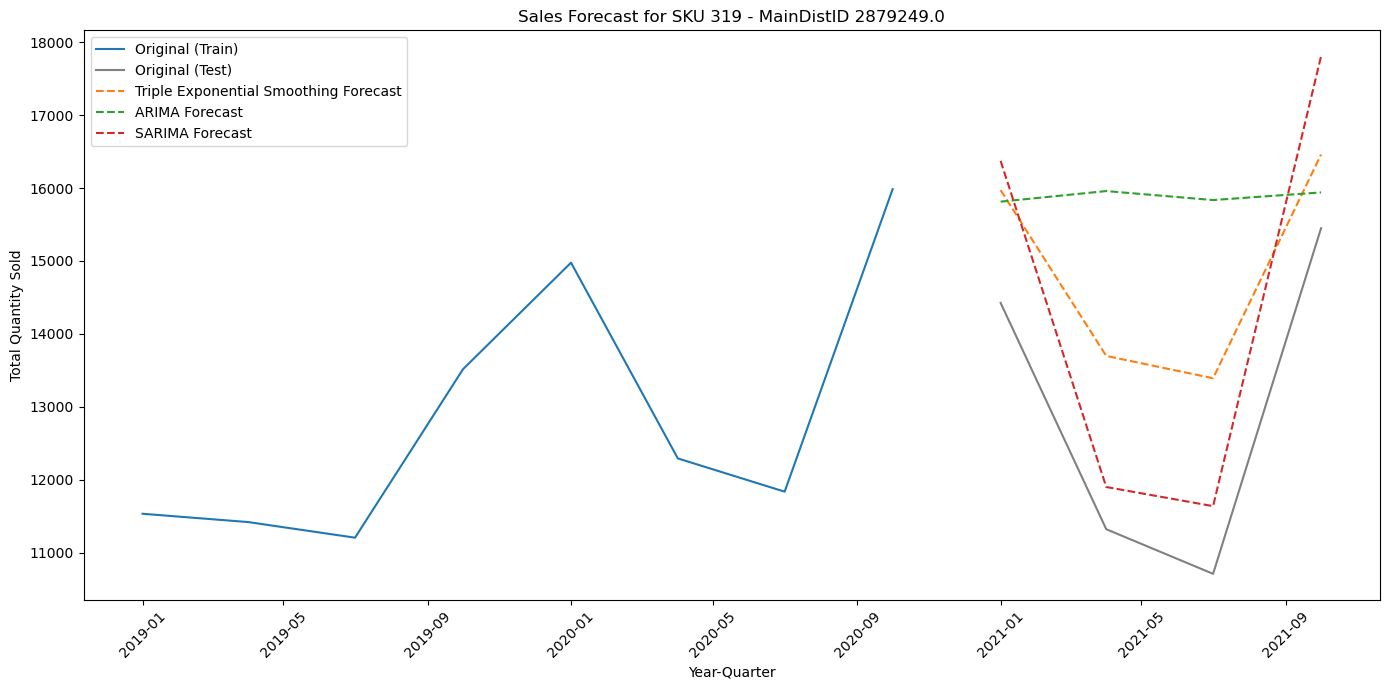

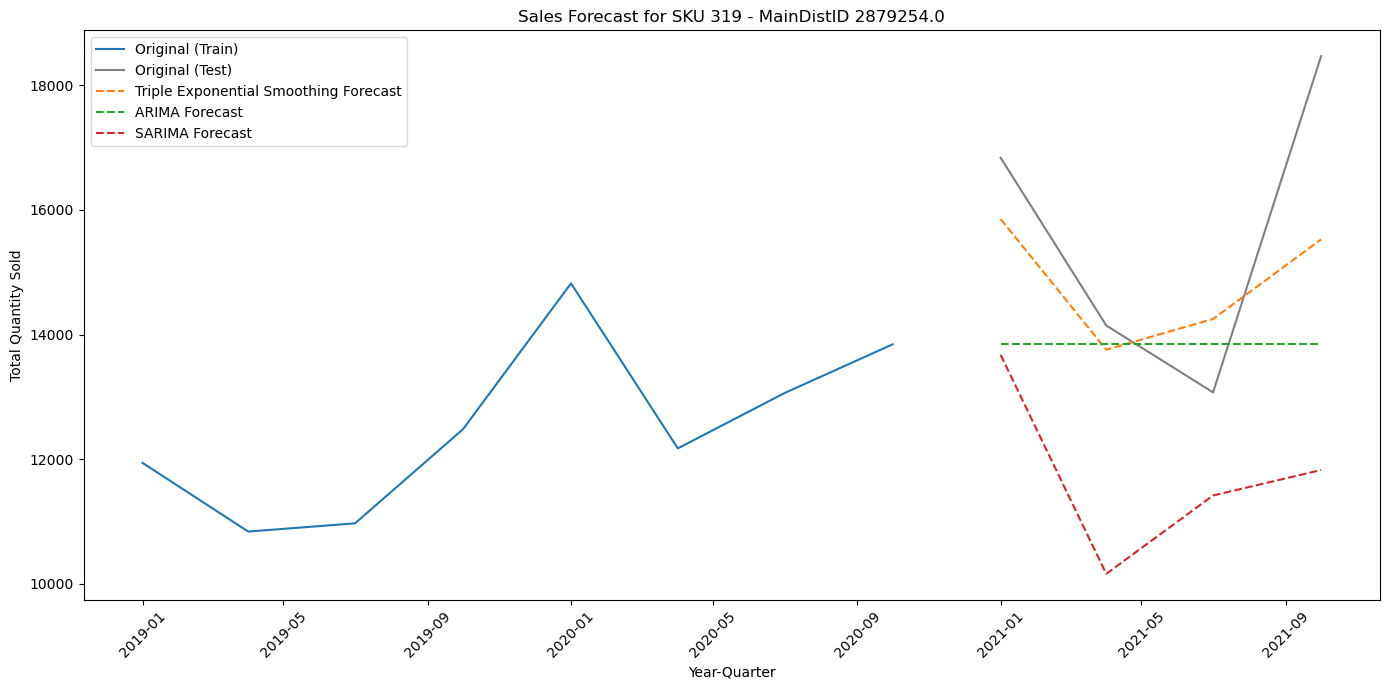

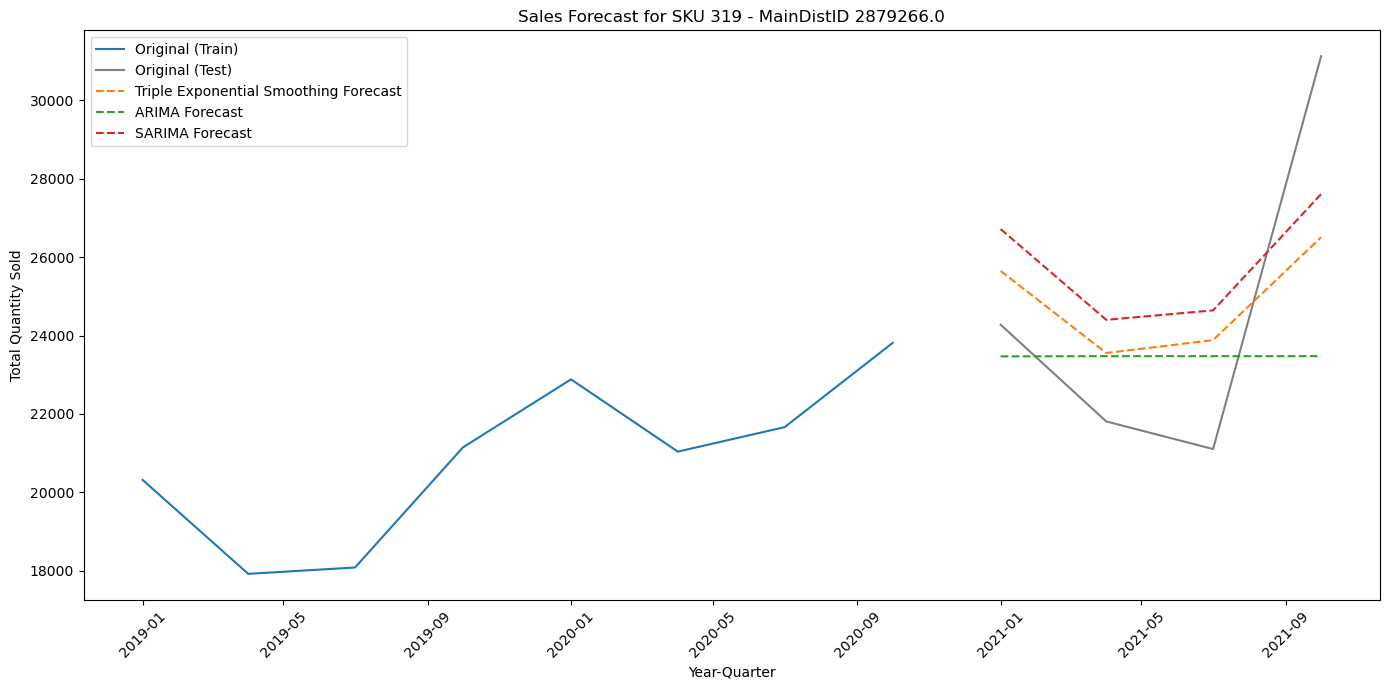

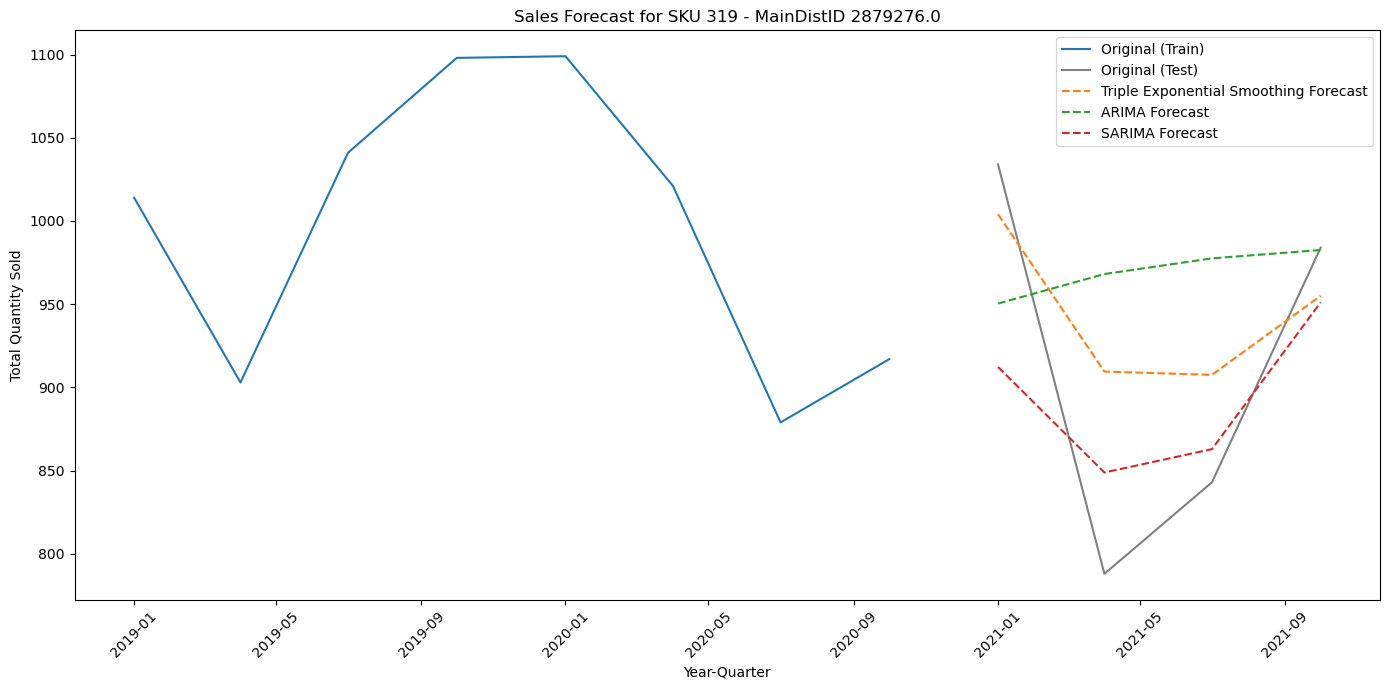

Not enough data for training forecasting for MainDistID 2915715.0. Skipping.


In [226]:
metrics_df_seasonal_quarterly = plot_seasonal_forecasts_quarterly('319')

In [227]:
metrics_df_seasonal_quarterly

MAPE           MSE         RMSE  \
MainDistID Method                                                              
2879249    Triple Exponential Smoothing  0.158275  4.064582e+06  2016.080954   
           ARIMA                         0.254133  1.249120e+07  3534.289522   
           SARIMA                        0.106380  2.637893e+06  1624.159115   
2879254    Triple Exponential Smoothing  0.083824  2.789254e+06  1670.106115   
           ARIMA                         0.127161  7.760760e+06  2785.814015   
           SARIMA                        0.238973  1.818567e+07  4264.466199   
2879266    Triple Exponential Smoothing  0.104200  8.505346e+06  2916.392709   
           ARIMA                         0.116974  1.691118e+07  4112.320864   
           SARIMA                        0.125046  9.398087e+06  3065.629929   
2879276    Triple Exponential Smoothing  0.072301  5.168477e+03    71.892122   
           ARIMA                         0.117630  1.438566e+04   119.940228   
           SARIMA                        0.063001  4.998600e+03    70.700781   

                                                Bias  
MainDistID Method                                     
2879249    Triple Exponential Smoothing  1904.042603  
           ARIMA                         2911.011414  
           SARIMA                        1453.302498  
2879254    Triple Exponential Smoothing  -784.055170  
           ARIMA                        -1787.750215  
           SARIMA                       -3861.459486  
2879266    Triple Exponential Smoothing   319.320013  
           ARIMA                        -1106.769457  
           SARIMA                        1263.490345  
2879276    Triple Exponential Smoothing    31.791544  
           ARIMA                           57.404280  
           SARIMA                         -18.446915

### Monthly Sales Analysis and Forecasting

In [228]:
def plot_seasonal_forecasts_monthly(sku_id):
    df = main_dist_data_monthly[main_dist_data_monthly['SkuID'] == sku_id]
    df['Date'] = df.apply(lambda row: f"{row['Year']}-{row['Month']}", axis=1)
    df['Date'] = pd.PeriodIndex(df['Date'], freq='M').to_timestamp()
    df.set_index('Date', inplace=True)
    df = df.drop(columns=['Year', 'Month'])

    # Ensure the series is of numeric type
    df = df.astype(float)

    metrics = {}

    for main_dist_id in df['MainDistID'].unique():
        main_dist_data = df[df['MainDistID'] == main_dist_id]['TotalQuantity']
        
        test_size = int(len(main_dist_data)*0.333)
        train = main_dist_data[:-test_size]
        test = main_dist_data[-test_size:]
        
        
        # Forecasting methods
        triple_exp_smoothing_forecast = TripleExponentialSmoothingForecast(train, forecast_periods=test_size)
        arima_forecast = ARIMAForecast(train, forecast_periods=test_size)
        sarima_forecast = SARIMAForecast(train, forecast_periods=test_size)

        # Calculate metrics
        triple_exp_smoothing_mape, triple_exp_smoothing_mse, triple_exp_smoothing_rmse, triple_exp_smoothing_bias = calculate_metrics(test, triple_exp_smoothing_forecast)
        arima_mape, arima_mse, arima_rmse, arima_bias = calculate_metrics(test, arima_forecast)
        sarima_mape, sarima_mse, sarima_rmse, sarima_bias = calculate_metrics(test, sarima_forecast)

        metrics[main_dist_id] = {
            'Triple Exponential Smoothing': {'MAPE': triple_exp_smoothing_mape, 'MSE': triple_exp_smoothing_mse, 'RMSE': triple_exp_smoothing_rmse, 'Bias': triple_exp_smoothing_bias},
            'ARIMA': {'MAPE': arima_mape, 'MSE': arima_mse, 'RMSE': arima_rmse, 'Bias': arima_bias},
            'SARIMA': {'MAPE': sarima_mape, 'MSE': sarima_mse, 'RMSE': sarima_rmse, 'Bias': sarima_bias},
        }

        # Plotting
        plt.figure(figsize=(14, 7))
        plt.plot(train.index, train, label='Original (Train)')
        plt.plot(test.index, test, label='Original (Test)', color='gray')
        plt.plot(test.index, triple_exp_smoothing_forecast, label='Triple Exponential Smoothing Forecast', linestyle='--')
        plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
        plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', linestyle='--')

        plt.title(f'Sales Forecast for SKU {sku_id} - MainDistID {main_dist_id}')
        plt.xlabel('Year-Month')
        plt.ylabel('Total Quantity Sold')
        plt.legend()

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    metrics_df = pd.DataFrame.from_dict({(i,j): metrics[i][j]
                                for i in metrics.keys()
                                for j in metrics[i].keys()},
                                orient='index')
    metrics_df.index = metrics_df.index.rename(['MainDistID', 'Method'])
    metrics_df.index = metrics_df.index.set_levels(metrics_df.index.levels[0].astype(int), level=0)

    return metrics_df

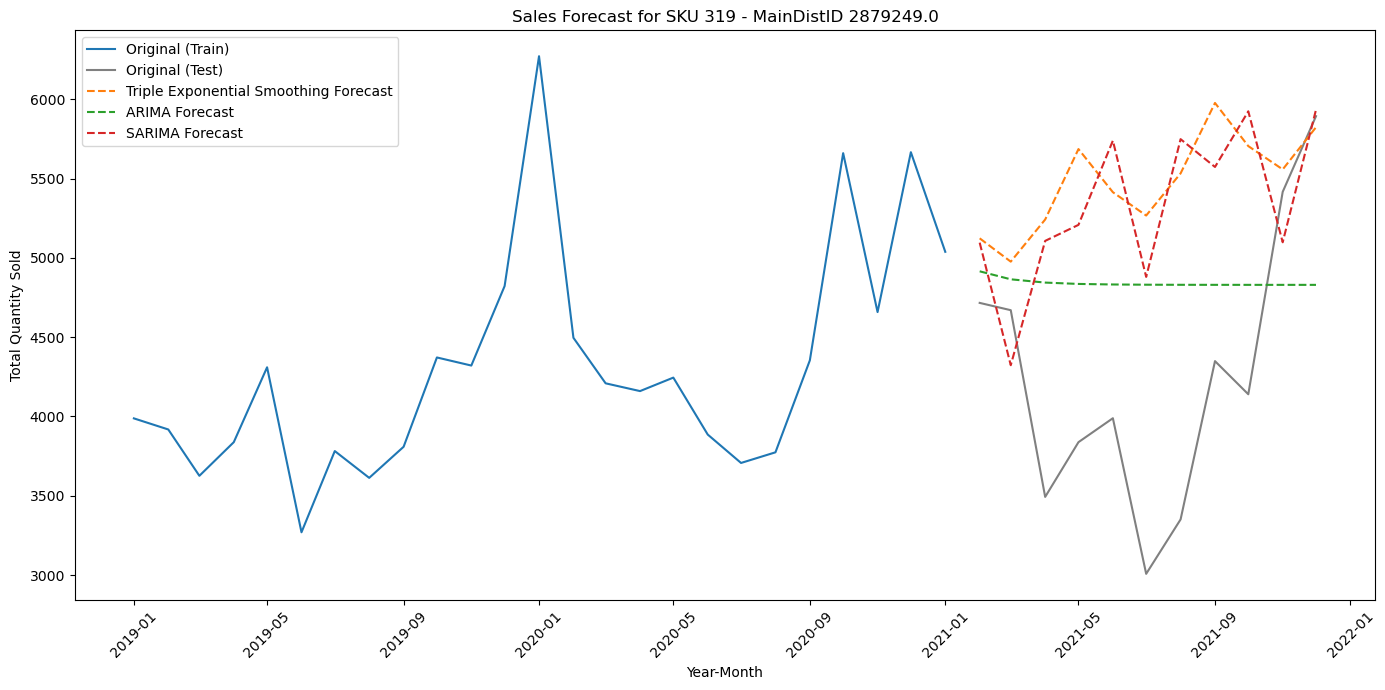

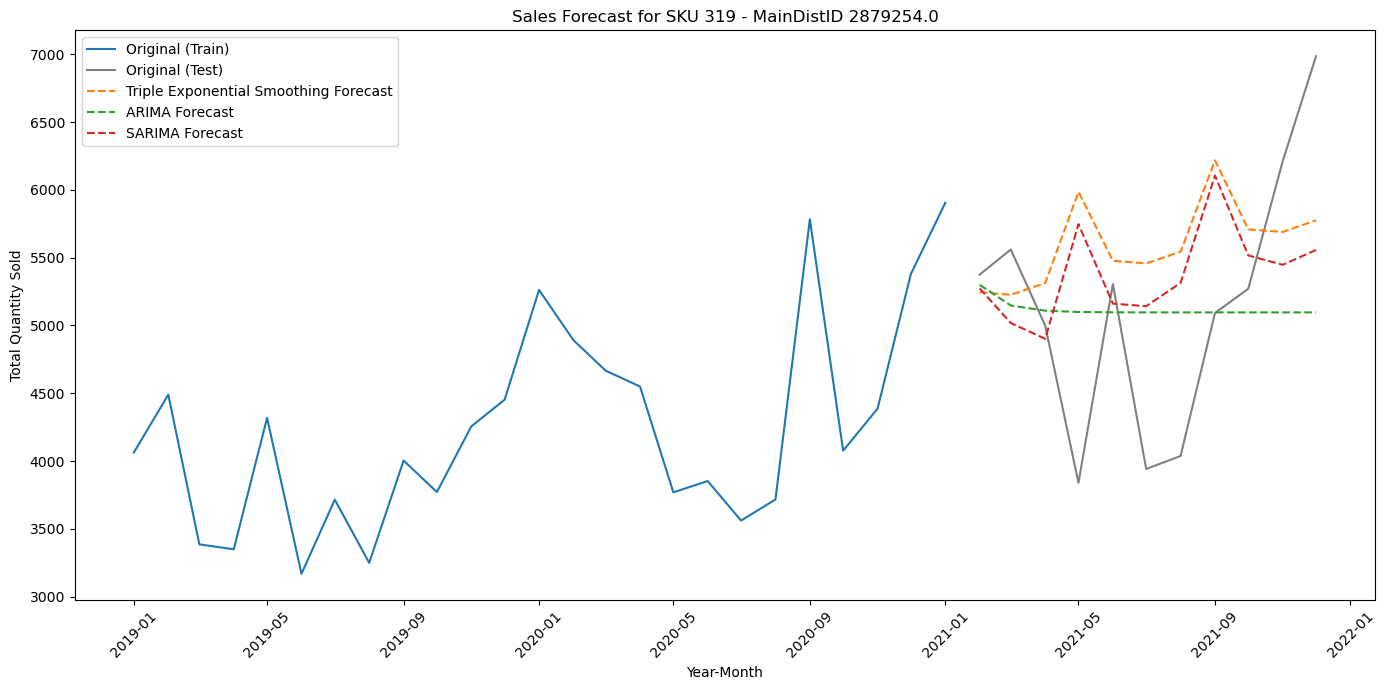

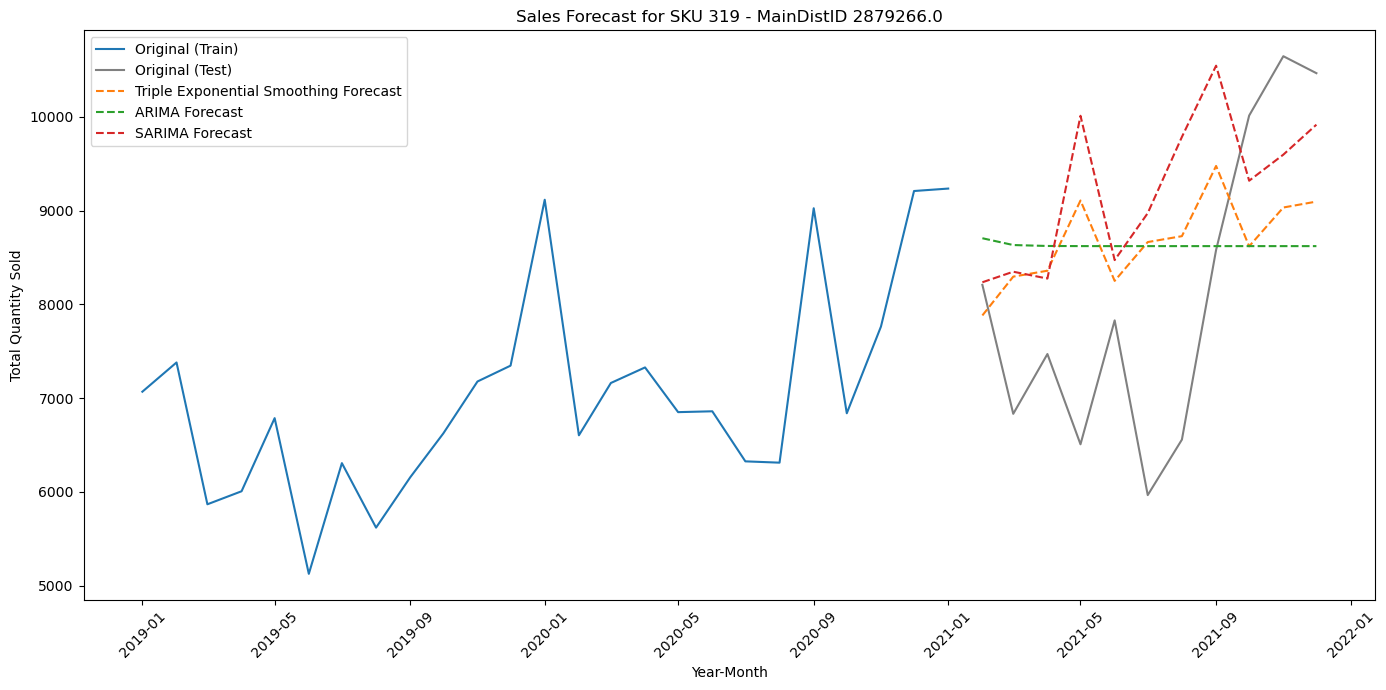

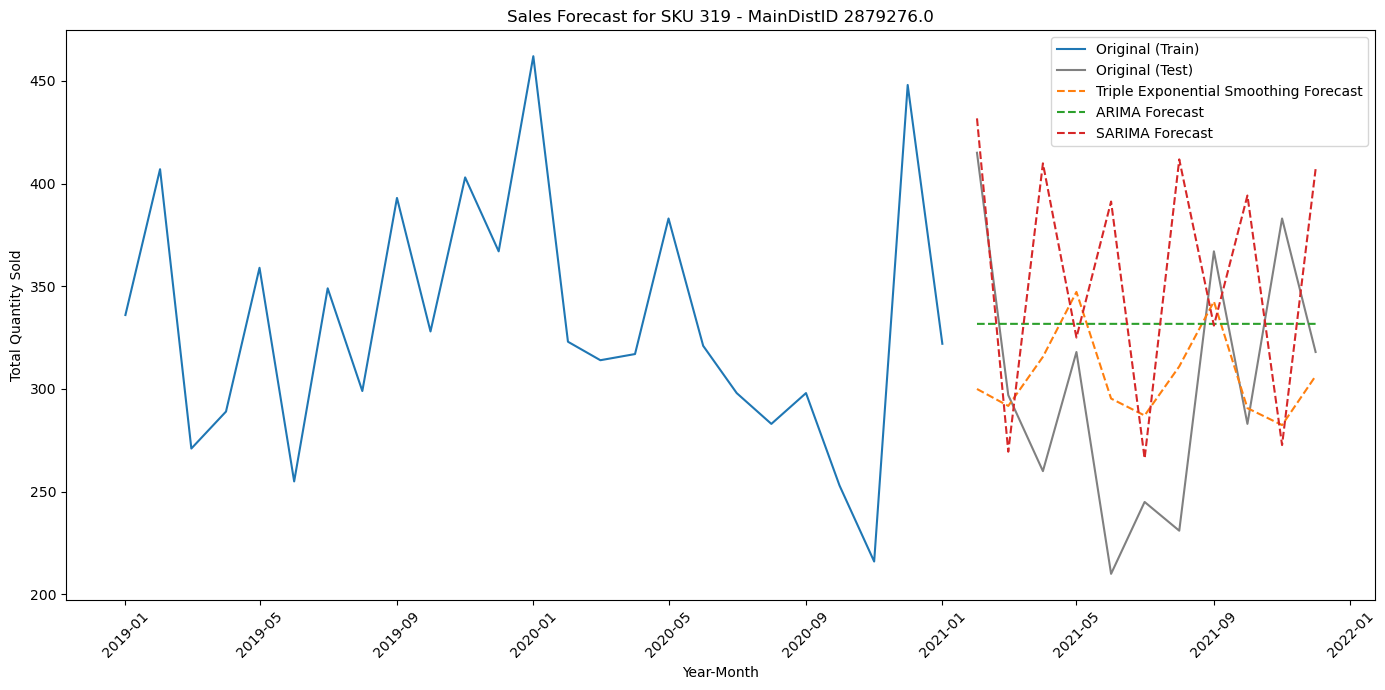

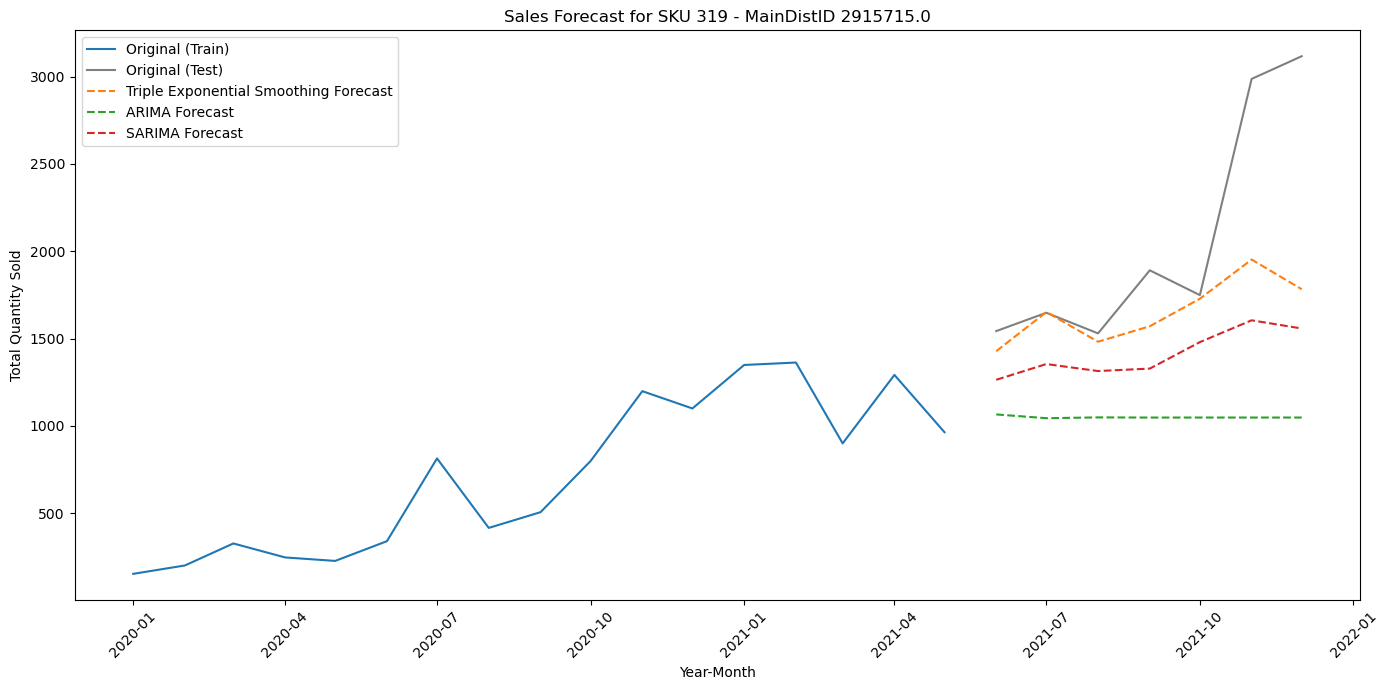

In [229]:
metrics_df_monthly_seasonal = plot_seasonal_forecasts_monthly('319')

In [230]:
metrics_df_monthly_seasonal

MAPE           MSE         RMSE  \
MainDistID Method                                                              
2879249    Triple Exponential Smoothing  0.334813  2.158330e+06  1469.125567   
           ARIMA                         0.232278  1.027213e+06  1013.515082   
           SARIMA                        0.320726  1.985516e+06  1409.083551   
2879254    Triple Exponential Smoothing  0.186946  1.147062e+06  1071.009981   
           ARIMA                         0.137829  8.282533e+05   910.084205   
           SARIMA                        0.168459  9.771562e+05   988.512110   
2879266    Triple Exponential Smoothing  0.194174  2.655155e+06  1629.464671   
           ARIMA                         0.197704  2.789172e+06  1670.081524   
           SARIMA                        0.218168  3.715652e+06  1927.602579   
2879276    Triple Exponential Smoothing  0.174374  3.960212e+03    62.930218   
           ARIMA                         0.222830  4.761881e+03    69.006380   
           SARIMA                        0.320252  1.120702e+04   105.863234   
2915715    Triple Exponential Smoothing  0.152012  4.241479e+05   651.266396   
           ARIMA                         0.449956  1.438056e+06  1199.189806   
           SARIMA                        0.273487  7.058537e+05   840.151008   

                                                Bias  
MainDistID Method                                     
2879249    Triple Exponential Smoothing  1221.586145  
           ARIMA                          582.521317  
           SARIMA                        1069.639884  
2879254    Triple Exponential Smoothing   456.254436  
           ARIMA                          -26.227360  
           SARIMA                         233.066738  
2879266    Triple Exponential Smoothing   585.035261  
           ARIMA                          532.215485  
           SARIMA                        1127.740817  
2879276    Triple Exponential Smoothing     3.909201  
           ARIMA                           29.247758  
           SARIMA                          53.000592  
2915715    Triple Exponential Smoothing  -409.833767  
           ARIMA                        -1016.316486  
           SARIMA                        -651.650935

In [231]:
metrics_df_monthly_seasonal.loc[(2879249, 'ARIMA')]

MAPE    2.322784e-01
MSE     1.027213e+06
RMSE    1.013515e+03
Bias    5.825213e+02
Name: (2879249, ARIMA), dtype: float64

In [232]:
metrics_df_monthly_seasonal.loc[(2879249, 'SARIMA')]

MAPE    3.207263e-01
MSE     1.985516e+06
RMSE    1.409084e+03
Bias    1.069640e+03
Name: (2879249, SARIMA), dtype: float64

In [233]:
metrics_df_monthly_seasonal.loc[(2879249, 'Triple Exponential Smoothing')]


MAPE    3.348126e-01
MSE     2.158330e+06
RMSE    1.469126e+03
Bias    1.221586e+03
Name: (2879249, Triple Exponential Smoothing), dtype: float64

# Weekly Sales Analysis and Forecasting

## Weekly: Naive - Moving Average - Exponential Smoothing Forecasting Methods

In [234]:
main_dist_data_weekly = data.copy()
main_dist_data_weekly = main_dist_data_weekly[main_dist_data_weekly['MainDistID'].isin(highest_main_dist_ids)]
main_dist_data_weekly['Year'] = main_dist_data_weekly['Date'].dt.year
main_dist_data_weekly['Week'] = main_dist_data_weekly['Date'].dt.isocalendar().week

main_dist_data_weekly = main_dist_data_weekly.groupby(['Year', 'Week', 'MainDistID', 'SkuID']).agg({'TotalQuantity': 'sum'}).reset_index()
main_dist_data_weekly

Year  Week MainDistID SkuID  TotalQuantity
0     2019     1    2879249  1018            200
1     2019     1    2879249  1050            479
2     2019     1    2879249   319            942
3     2019     1    2879249   509            723
4     2019     1    2879249   568           3136
...    ...   ...        ...   ...            ...
5092  2021    53    2915715  1018              1
5093  2021    53    2915715   509              1
5094  2021    53    2915715   568             36
5095  2021    53    2915715   578             25
5096  2021    53    2915715   615             12

[5097 rows x 5 columns]

In [235]:
def plot_sku_main_dist_weekly(sku_id):
    sku_data = main_dist_data_weekly[main_dist_data_weekly['SkuID'] == sku_id]
    sku_data['YearWeek'] = sku_data['Year'].astype(str) + '-W' + sku_data['Week'].astype(str)
    pivot_table = sku_data.pivot(index='YearWeek', columns='MainDistID', values='TotalQuantity')
    pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))
    plt.title(f'Sales of SKU {sku_id} by MainDistID over Time')
    plt.xlabel('Year-Week')
    plt.ylabel('Total Quantity Sold')
    plt.legend(title='MainDistID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

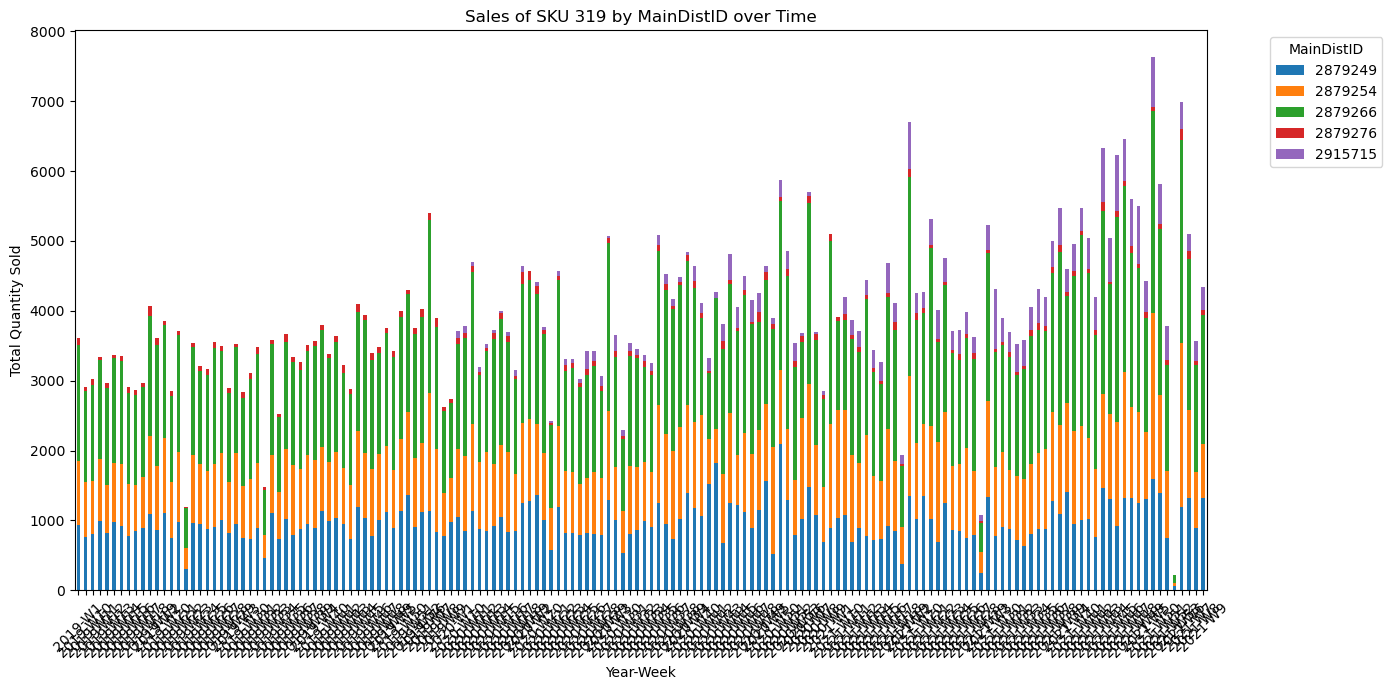

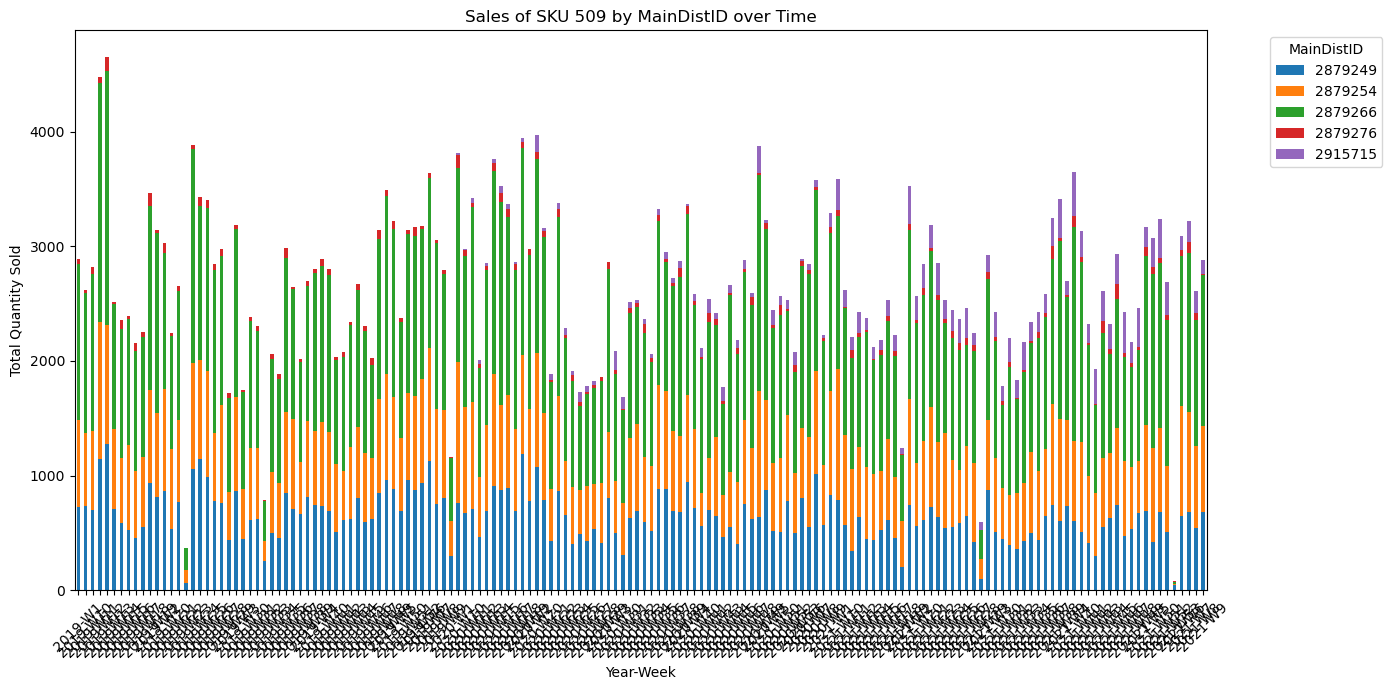

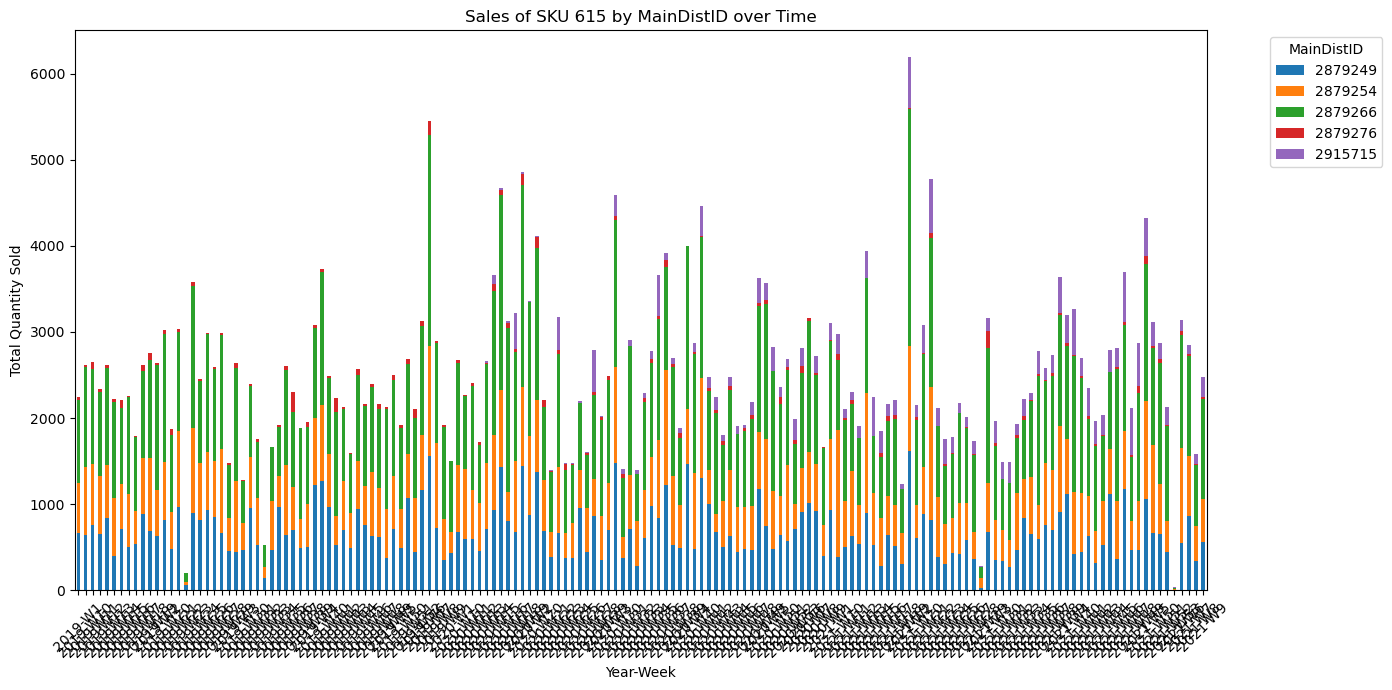

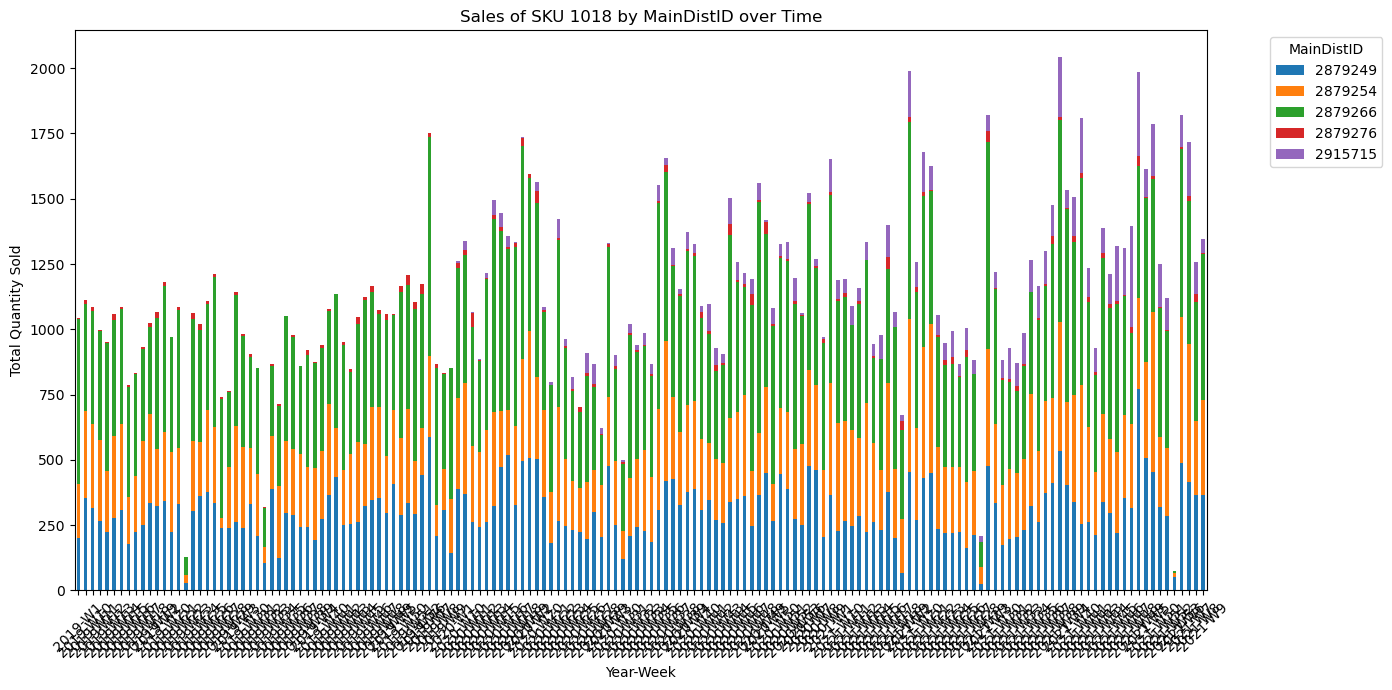

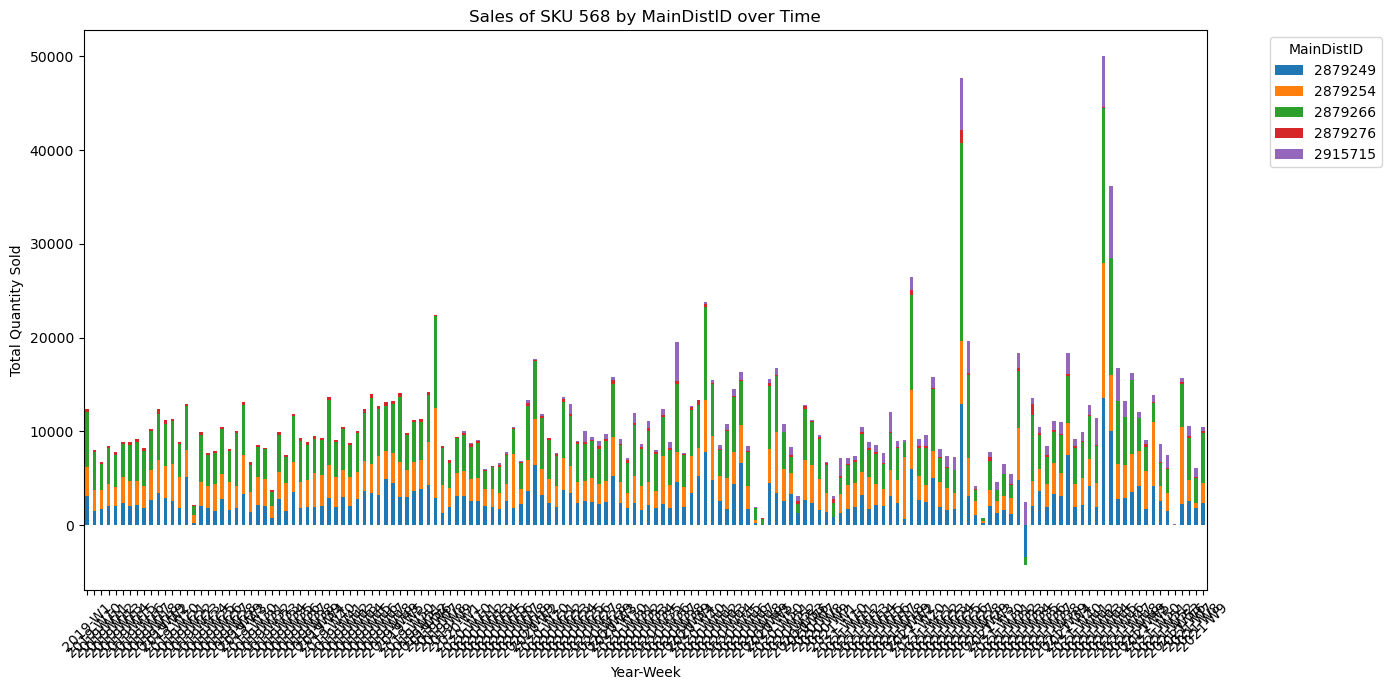

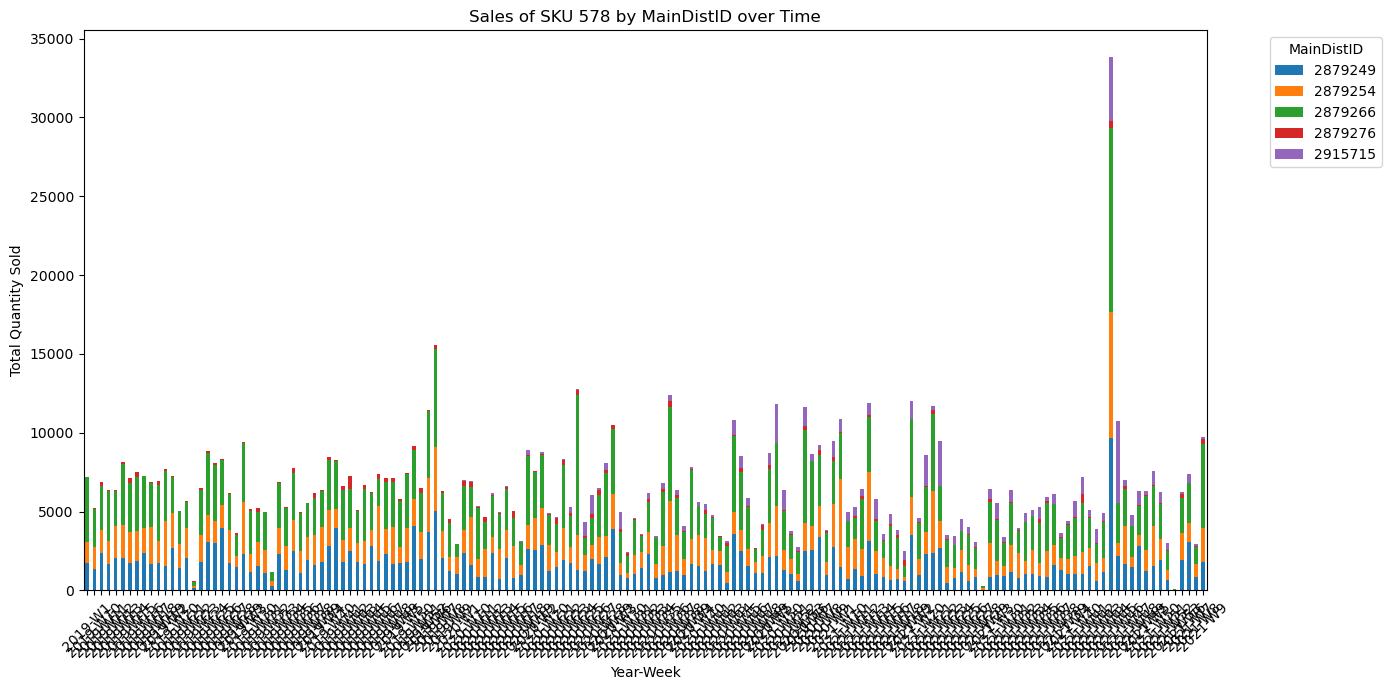

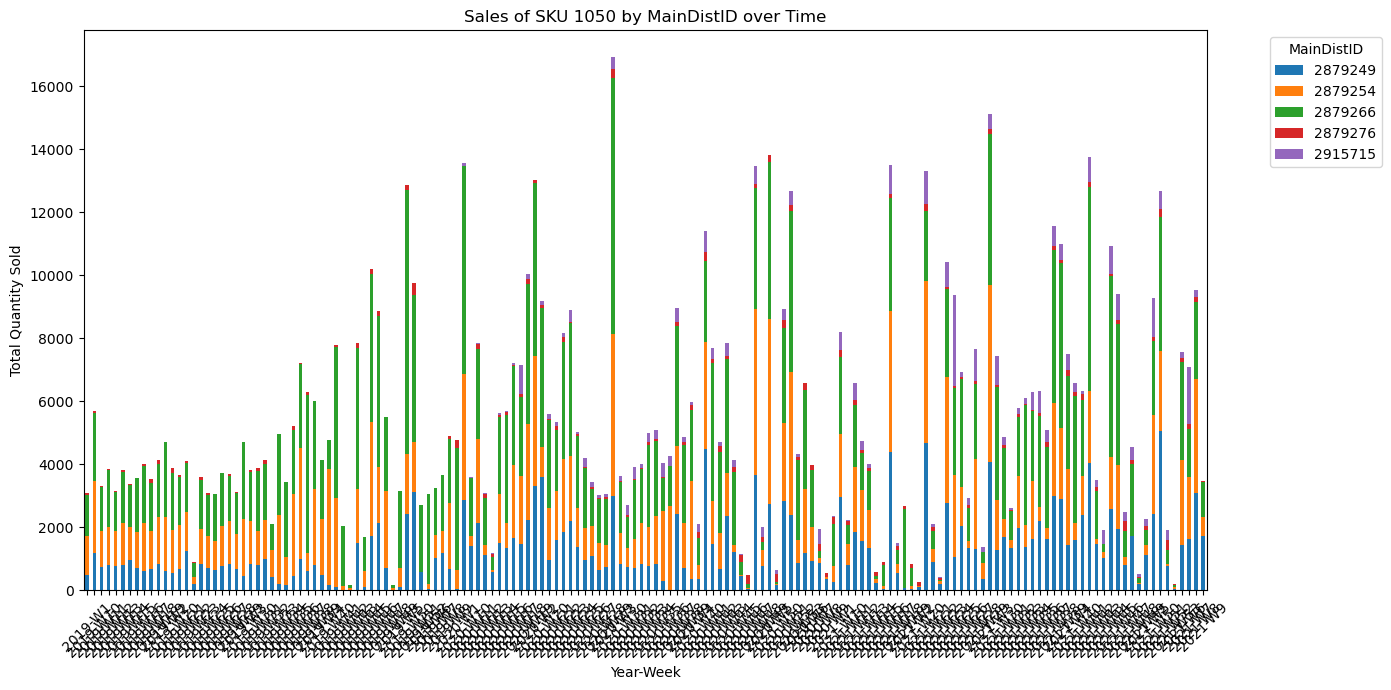

In [236]:
for sku_id in all_sku_ids:
    sku_data = main_dist_data_weekly[main_dist_data_weekly['SkuID'] == sku_id]
    sku_data.set_index(['Year', 'Week'], inplace=True)
    plot_sku_main_dist_weekly(sku_id)

In [237]:
def plot_forecasts_and_calculate_metrics_weekly(sku_id):
    df = main_dist_data_weekly[main_dist_data_weekly['SkuID'] == sku_id]
    df['Date'] = df.apply(lambda row: f"{row['Year']}-W{row['Week']}", axis=1)
    df['Date'] = pd.to_datetime(df['Date'] + '-1', format='%Y-W%W-%w')
    df.set_index('Date', inplace=True)
    df = df.drop(columns=['Year', 'Week'])

    # Ensure the series is of numeric type
    df = df.astype(float)

    metrics = {}

    for main_dist_id in df['MainDistID'].unique():
        main_dist_data = df[df['MainDistID'] == main_dist_id]['TotalQuantity']
        
        test_size = int(len(main_dist_data)*0.333)
        train = main_dist_data[:-test_size]
        test = main_dist_data[-test_size:]
        
        # Forecasting methods
        naive_forecast = NaiveForecast(train, forecast_periods=test_size)
        moving_avg_forecast = MovingAverageForecast(train, forecast_periods=test_size)
        ses_forecast = ExponentialSmoothingForecast(train, forecast_periods=test_size)

        # Calculate metrics
        naive_mape, naive_mse, naive_rmse, naive_bias = calculate_metrics(test, naive_forecast)
        moving_avg_mape, moving_avg_mse, moving_avg_rmse, moving_avg_bias = calculate_metrics(test, moving_avg_forecast)
        ses_mape, ses_mse, ses_rmse, ses_bias = calculate_metrics(test, ses_forecast)

        metrics[main_dist_id] = {
            'Naive': {'MAPE': naive_mape, 'MSE': naive_mse, 'RMSE': naive_rmse, 'Bias': naive_bias},
            'Moving Average': {'MAPE': moving_avg_mape, 'MSE': moving_avg_mse, 'RMSE': moving_avg_rmse, 'Bias': moving_avg_bias},
            'Exponential Smoothing': {'MAPE': ses_mape, 'MSE': ses_mse, 'RMSE': ses_rmse, 'Bias': ses_bias},
        }
        
        # Plotting
        plt.figure(figsize=(14, 7))
        plt.plot(train.index, train, label='Original (Train)')
        plt.plot(test.index, test, label='Original (Test)', color='gray')
        plt.plot(test.index, naive_forecast, label='Naive Forecast', linestyle='--')
        plt.plot(test.index, moving_avg_forecast, label='Moving Average Forecast', linestyle='--')
        plt.plot(test.index, ses_forecast, label='Exponential Smoothing Forecast', linestyle='--')
        
        plt.title(f'Sales Forecast for SKU {sku_id} - MainDistID {main_dist_id}')
        plt.xlabel('Year-Week')
        plt.ylabel('Total Quantity Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    metrics_df = pd.DataFrame.from_dict({(i,j): metrics[i][j]
                             for i in metrics.keys()
                             for j in metrics[i].keys()},
                            orient='index')
    metrics_df.index = metrics_df.index.rename(['MainDistID', 'Method'])
    metrics_df.index = metrics_df.index.set_levels(metrics_df.index.levels[0].astype(int), level=0)
    
    return metrics_df


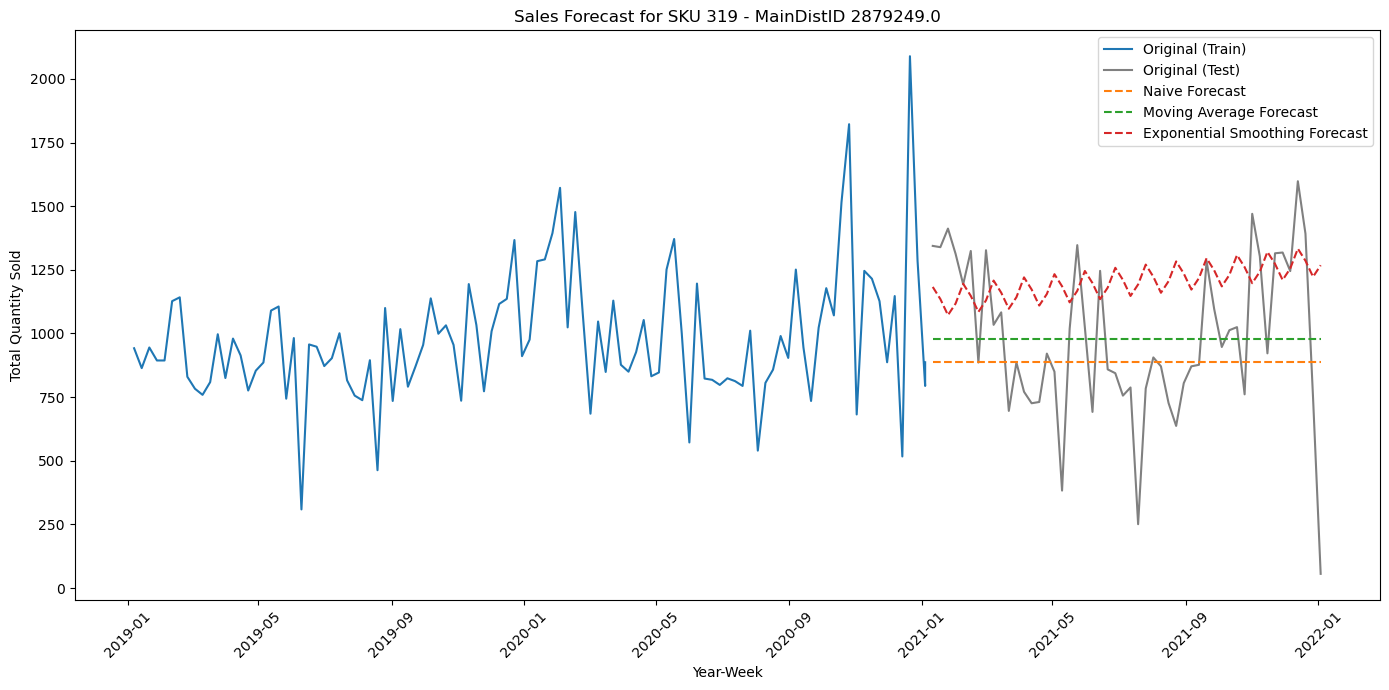

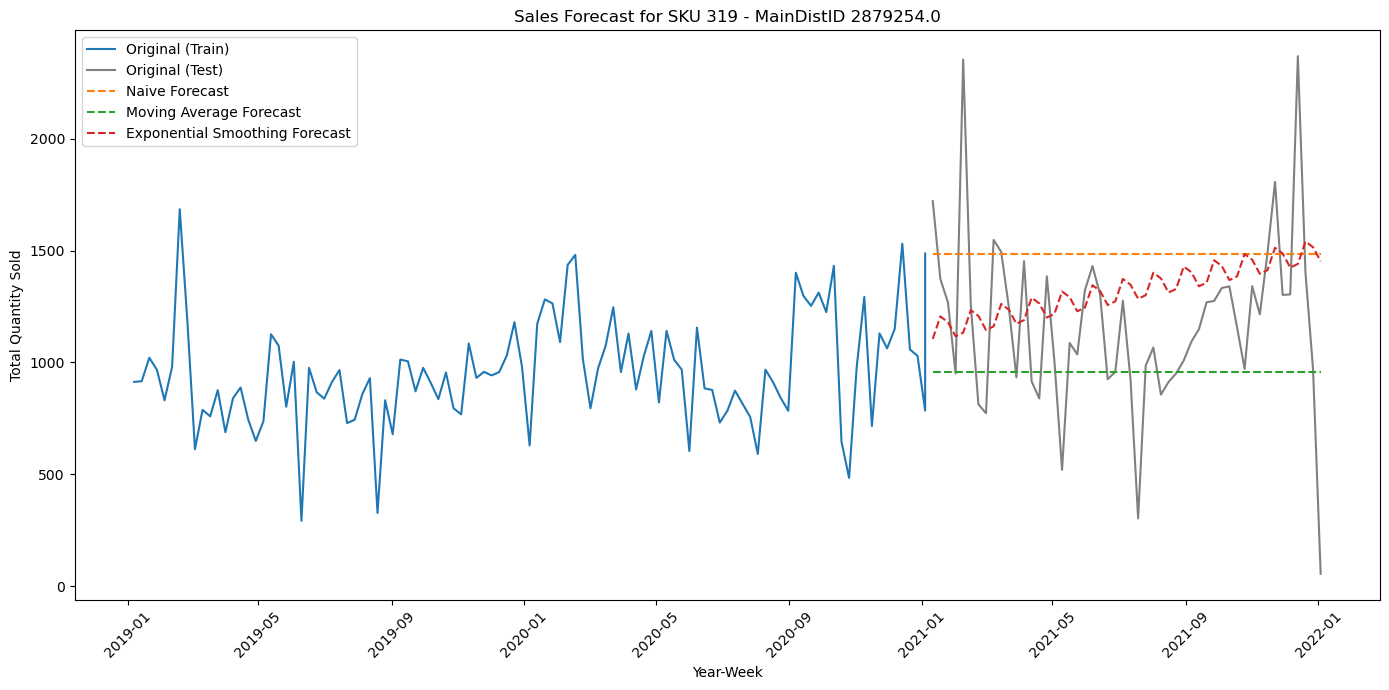

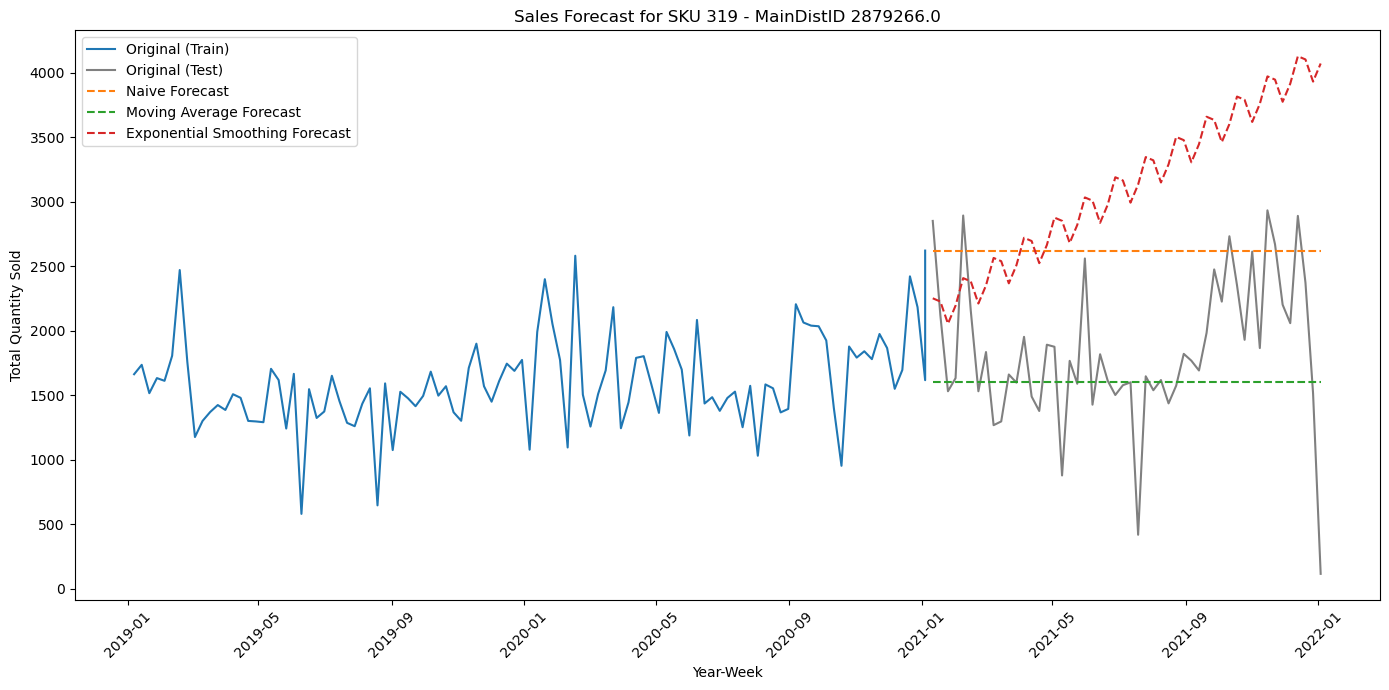

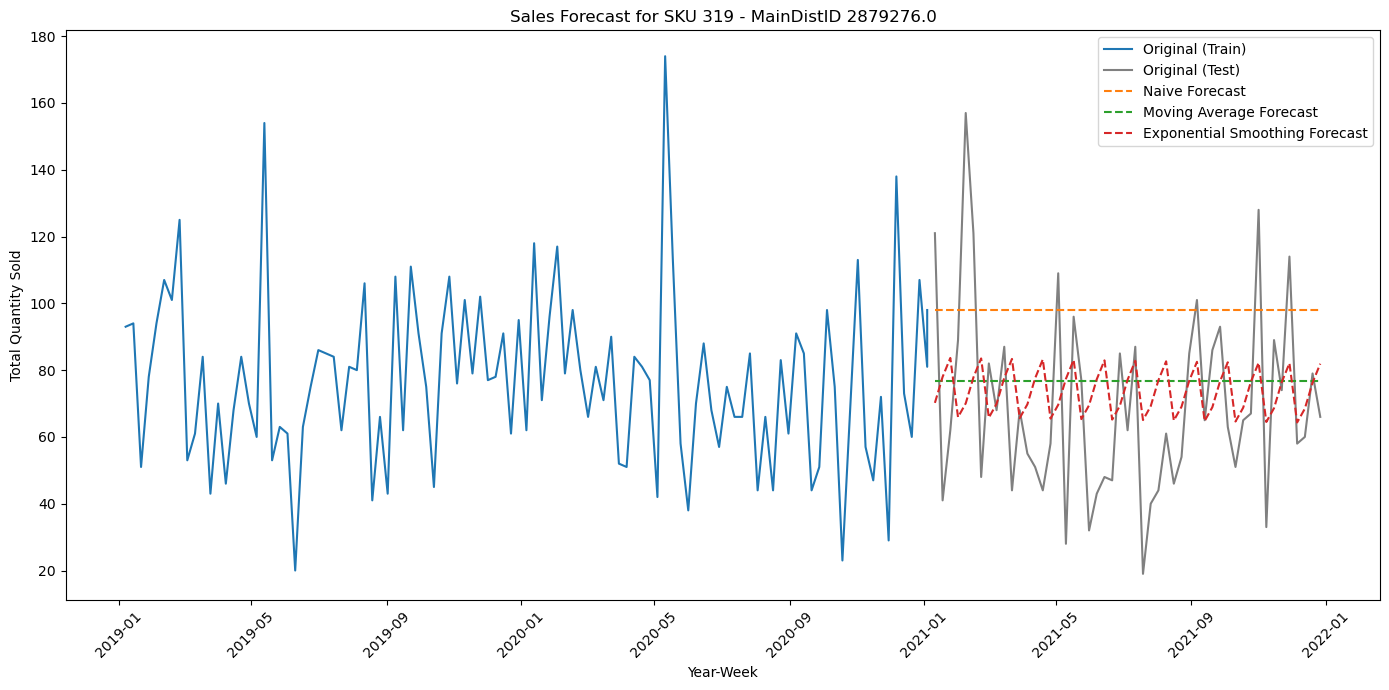

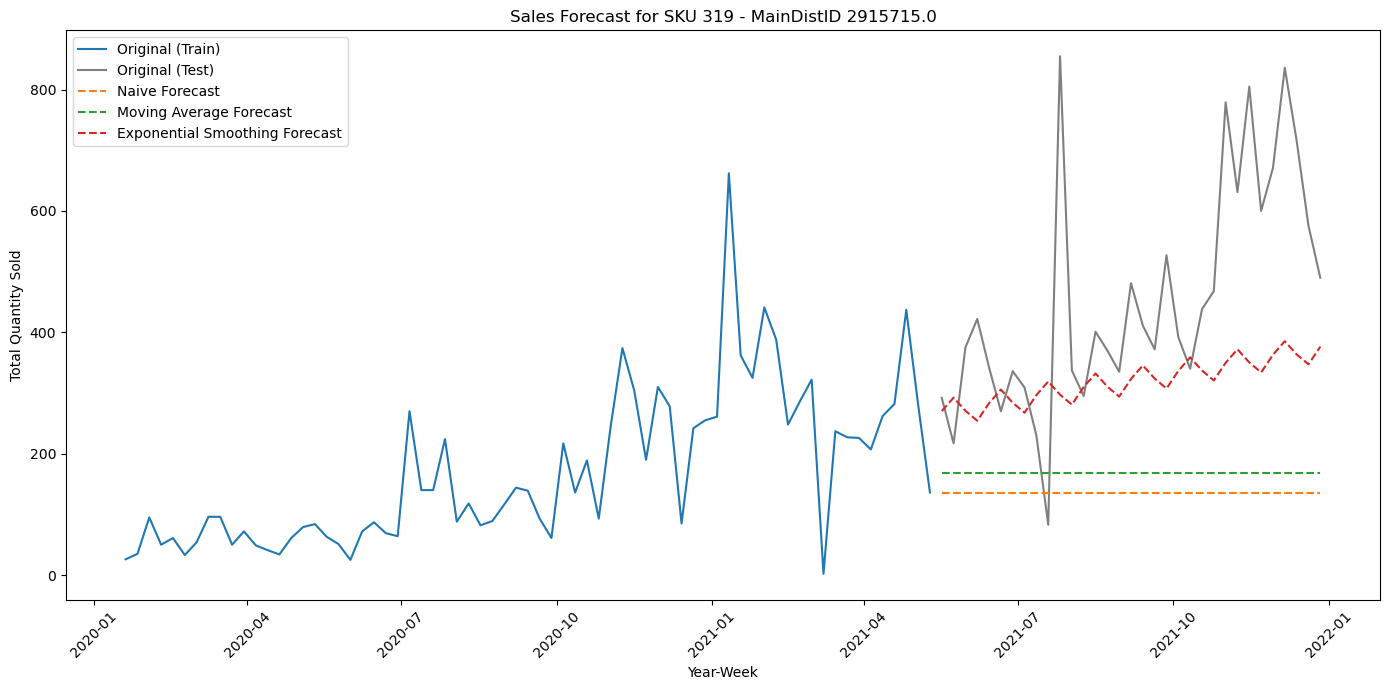

In [238]:
metrics_df_weekly = plot_forecasts_and_calculate_metrics_weekly('319')

In [239]:
metrics_df_weekly

MAPE            MSE        RMSE  \
MainDistID Method                                                       
2879249    Naive                  0.546099  104978.692308  324.004155   
           Moving Average         0.603095   96146.243037  310.074577   
           Exponential Smoothing       NaN            NaN         NaN   
2879254    Naive                  0.923232  251440.076923  501.438009   
           Moving Average         0.569453  199610.557720  446.777974   
           Exponential Smoothing       NaN            NaN         NaN   
2879266    Naive                  0.989405  932911.634615  965.873509   
           Moving Average         0.486461  381879.872327  617.964297   
           Exponential Smoothing       NaN            NaN         NaN   
2879276    Naive                  0.719222    1583.980392   39.799251   
           Moving Average         0.457285     831.247299   28.831360   
           Exponential Smoothing       NaN            NaN         NaN   
2915715    Naive                  0.665067  137081.333333  370.244964   
           Moving Average         0.598531  117150.611980  342.272716   
           Exponential Smoothing  0.364019   47583.005405  218.135292   

                                        Bias  
MainDistID Method                             
2879249    Naive                  -94.038462  
           Moving Average          -3.283745  
           Exponential Smoothing         NaN  
2879254    Naive                  313.230769  
           Moving Average        -215.137155  
           Exponential Smoothing         NaN  
2879266    Naive                  780.596154  
           Moving Average        -241.451016  
           Exponential Smoothing         NaN  
2879276    Naive                   28.372549  
           Moving Average           7.229692  
           Exponential Smoothing         NaN  
2915715    Naive                 -318.606061  
           Moving Average        -285.620553  
           Exponential Smoothing -134.529204

In [240]:
metrics_df_weekly.loc[(2879249, 'Moving Average')]

MAPE        0.603095
MSE     96146.243037
RMSE      310.074577
Bias       -3.283745
Name: (2879249, Moving Average), dtype: float64

## Weekly: Seasonal Forecasting Methods - Triple Exponential Smoothing - ARIMA - SARIMA

In [241]:
def plot_seasonal_forecasts_weekly(sku_id):
    df = main_dist_data_weekly[main_dist_data_weekly['SkuID'] == sku_id]
    df['Date'] = df.apply(lambda row: f"{row['Year']}-W{row['Week']}", axis=1)
    df['Date'] = pd.to_datetime(df['Date'] + '-1', format='%Y-W%W-%w')
    df.set_index('Date', inplace=True)
    df = df.drop(columns=['Year', 'Week'])
    df = df.astype(float)

    metrics = {}

    for main_dist_id in df['MainDistID'].unique():
        main_dist_data = df[df['MainDistID'] == main_dist_id]['TotalQuantity']
        test_size = int(len(main_dist_data)*0.333)
        train = main_dist_data[:-test_size]
        test = main_dist_data[-test_size:]

        # Forecasting methods
        triple_exp_smoothing_forecast = TripleExponentialSmoothingForecast(train, forecast_periods=test_size)
        arima_forecast = ARIMAForecast(train, forecast_periods=test_size)
        sarima_forecast = SARIMAForecast(train, forecast_periods=test_size)
        
        # Calculate metrics
        triple_exp_smoothing_mape, triple_exp_smoothing_mse, triple_exp_smoothing_rmse, triple_exp_smoothing_bias = calculate_metrics(test.values, triple_exp_smoothing_forecast)
        arima_mape, arima_mse, arima_rmse, arima_bias = calculate_metrics(test.values, arima_forecast)
        sarima_mape, sarima_mse, sarima_rmse, sarima_bias = calculate_metrics(test.values, sarima_forecast)
        
        metrics[main_dist_id] = {
            'Triple Exponential Smoothing': {'MAPE': triple_exp_smoothing_mape, 'MSE': triple_exp_smoothing_mse, 'RMSE': triple_exp_smoothing_rmse, 'Bias': triple_exp_smoothing_bias},
            'ARIMA': {'MAPE': arima_mape, 'MSE': arima_mse, 'RMSE': arima_rmse, 'Bias': arima_bias},
            'SARIMA': {'MAPE': sarima_mape, 'MSE': sarima_mse, 'RMSE': sarima_rmse, 'Bias': sarima_bias},
        }
        
        # Plotting
        plt.figure(figsize=(14, 7))
        plt.plot(train.index, train, label='Original (Train)')
        plt.plot(test.index, test, label='Original (Test)', color='gray')
        plt.plot(test.index, triple_exp_smoothing_forecast, label='Triple Exponential Smoothing Forecast', linestyle='--')
        plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
        plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', linestyle='--')
        
        plt.title(f'Sales Forecast for SKU {sku_id} - MainDistID {main_dist_id}')
        plt.xlabel('Year-Week')
        plt.ylabel('Total Quantity Sold')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    metrics_df = pd.DataFrame.from_dict({(i,j): metrics[i][j]
                             for i in metrics.keys()
                             for j in metrics[i].keys()},
                            orient='index')
    metrics_df.index = metrics_df.index.rename(['MainDistID', 'Method'])
    metrics_df.index = metrics_df.index.set_levels(metrics_df.index.levels[0].astype(int), level=0)
    
    return metrics_df
    

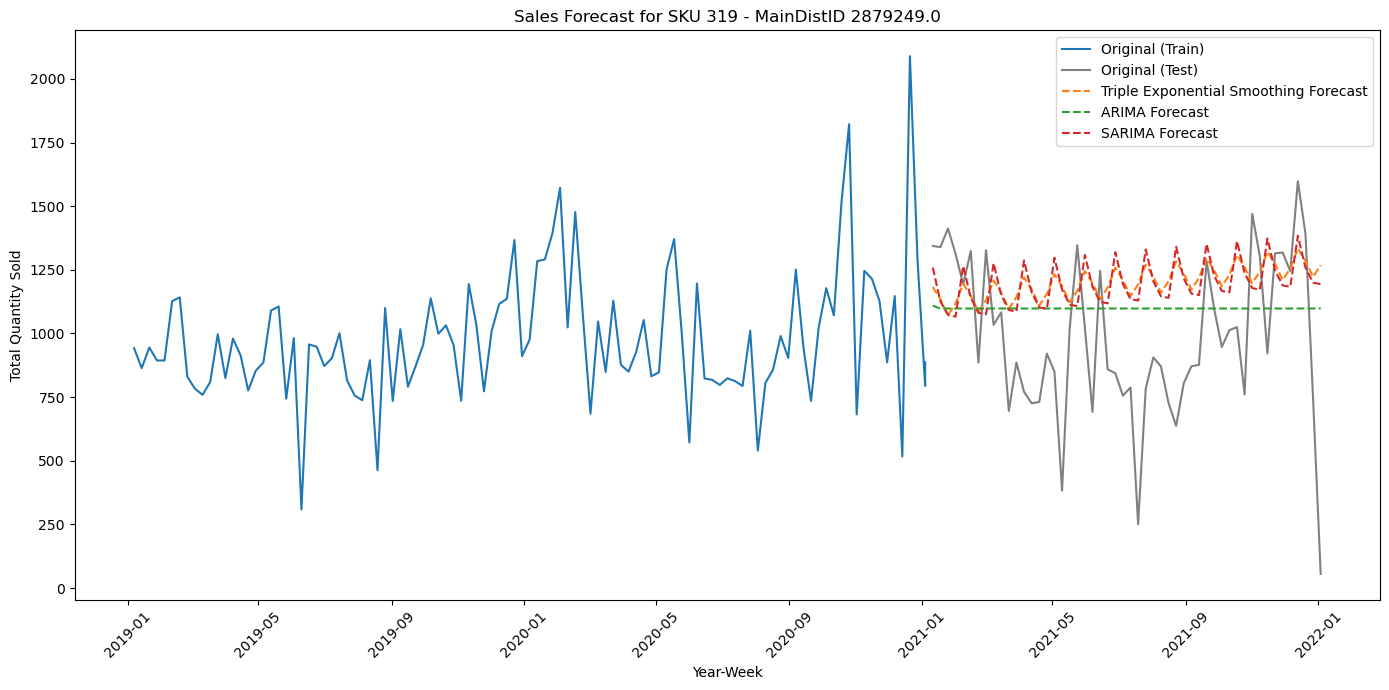

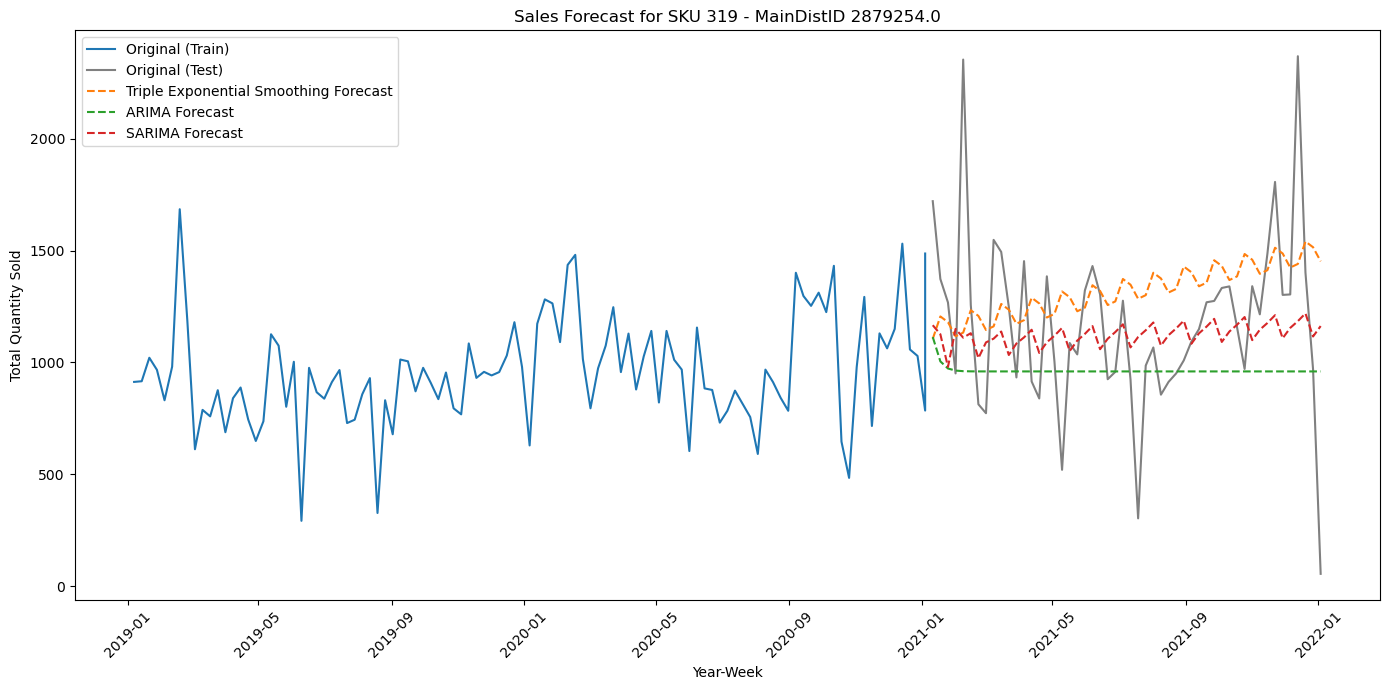

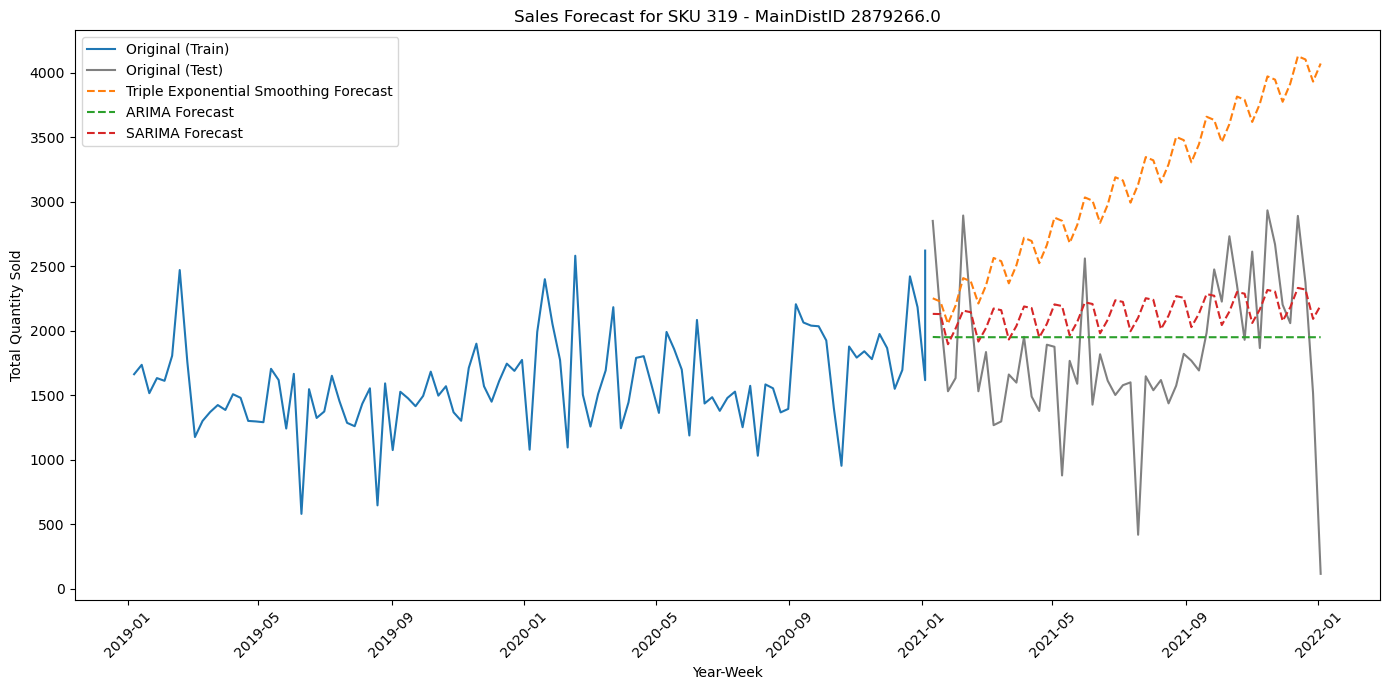

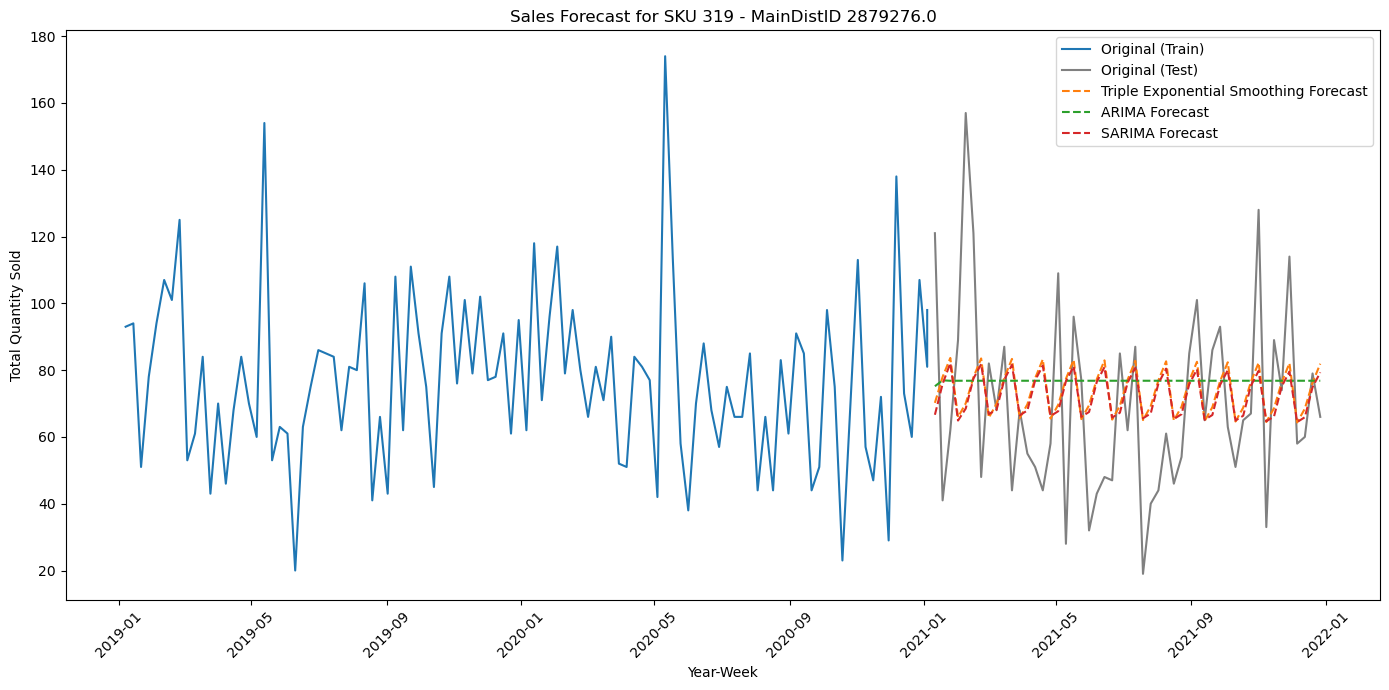

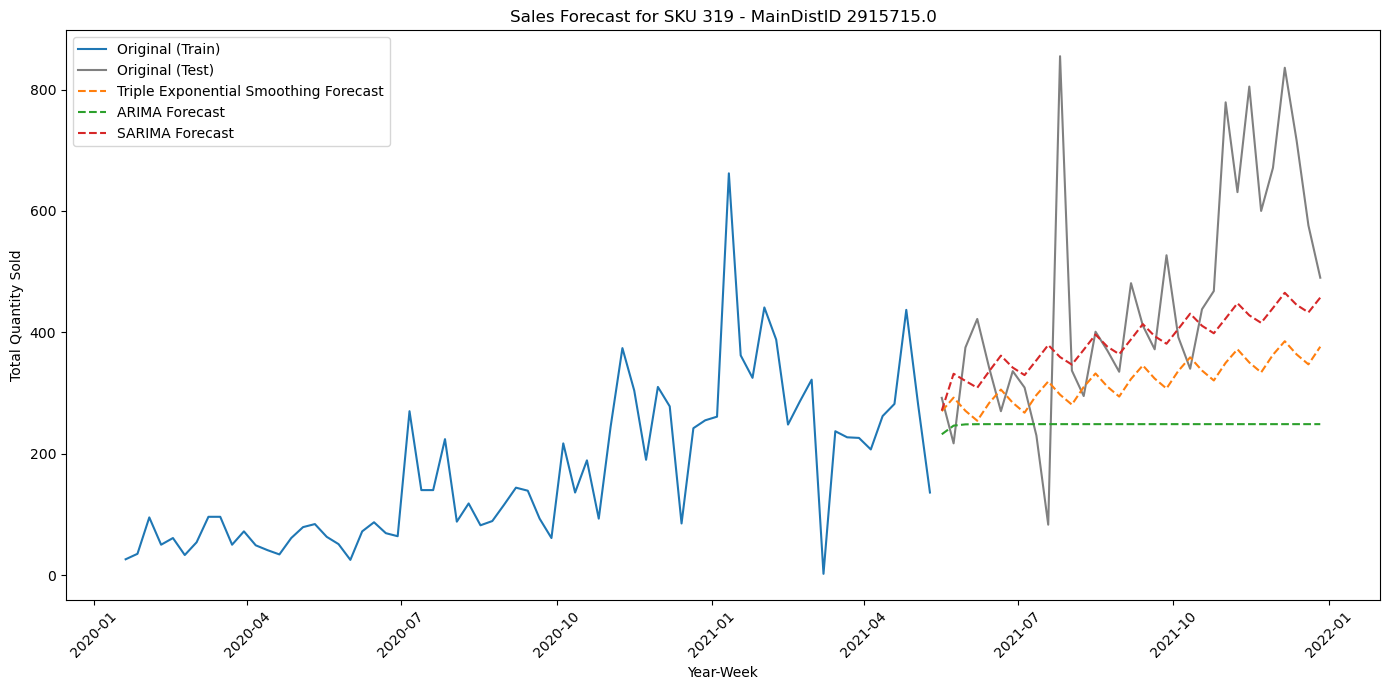

In [242]:
seasonal_metrics_df_weekly = plot_seasonal_forecasts_weekly('319')

In [243]:
seasonal_metrics_df_weekly

MAPE           MSE         RMSE  \
MainDistID Method                                                              
2879249    Triple Exponential Smoothing  0.823731  1.497130e+05   386.927688   
           ARIMA                         0.701522  1.097660e+05   331.309556   
           SARIMA                        0.797377  1.469295e+05   383.313870   
2879254    Triple Exponential Smoothing  0.806856  1.889719e+05   434.709026   
           ARIMA                         0.567169  1.941365e+05   440.609188   
           SARIMA                        0.637065  1.511511e+05   388.781515   
2879266    Triple Exponential Smoothing  1.485459  2.176154e+06  1475.179303   
           ARIMA                         0.597814  3.353368e+05   579.082687   
           SARIMA                        0.685463  3.891138e+05   623.789878   
2879276    Triple Exponential Smoothing  0.419246  7.964550e+02    28.221534   
           ARIMA                         0.457276  8.338083e+02    28.875738   
           SARIMA                        0.410876  7.992610e+02    28.271204   
2915715    Triple Exponential Smoothing  0.364019  4.758301e+04   218.135292   
           ARIMA                         0.452957  7.802424e+04   279.328197   
           SARIMA                        0.321133  3.213877e+04   179.272880   

                                                Bias  
MainDistID Method                                     
2879249    Triple Exponential Smoothing   221.087470  
           ARIMA                          117.372202  
           SARIMA                         213.487360  
2879254    Triple Exponential Smoothing   145.789438  
           ARIMA                         -209.699251  
           SARIMA                         -48.765671  
2879266    Triple Exponential Smoothing  1279.598771  
           ARIMA                          108.736056  
           SARIMA                         298.102491  
2879276    Triple Exponential Smoothing     4.127638  
           ARIMA                            7.163755  
           SARIMA                           2.864499  
2915715    Triple Exponential Smoothing  -134.529204  
           ARIMA                         -206.510759  
           SARIMA                         -69.015712

# Merge Metrics DataFrames

In [253]:
def merge_metrics_df(df1, df2):
    df1.reset_index(inplace=True)
    df2.reset_index(inplace=True)
    df1 = pd.concat([df1, df2], axis=0)
    df1.set_index(['MainDistID', 'Method'], inplace=True)
    df1.sort_index(inplace=True)
    return df1

In [252]:
metrics_df_weekly = merge_metrics_df(metrics_df_weekly, seasonal_metrics_df_weekly)
metrics_df_weekly

MAPE           MSE         RMSE  \
MainDistID Method                                                              
2879249    ARIMA                         0.701522  1.097660e+05   331.309556   
           Exponential Smoothing              NaN           NaN          NaN   
           Moving Average                0.603095  9.614624e+04   310.074577   
           Naive                         0.546099  1.049787e+05   324.004155   
           SARIMA                        0.797377  1.469295e+05   383.313870   
           Triple Exponential Smoothing  0.823731  1.497130e+05   386.927688   
2879254    ARIMA                         0.567169  1.941365e+05   440.609188   
           Exponential Smoothing              NaN           NaN          NaN   
           Moving Average                0.569453  1.996106e+05   446.777974   
           Naive                         0.923232  2.514401e+05   501.438009   
           SARIMA                        0.637065  1.511511e+05   388.781515   
           Triple Exponential Smoothing  0.806856  1.889719e+05   434.709026   
2879266    ARIMA                         0.597814  3.353368e+05   579.082687   
           Exponential Smoothing              NaN           NaN          NaN   
           Moving Average                0.486461  3.818799e+05   617.964297   
           Naive                         0.989405  9.329116e+05   965.873509   
           SARIMA                        0.685463  3.891138e+05   623.789878   
           Triple Exponential Smoothing  1.485459  2.176154e+06  1475.179303   
2879276    ARIMA                         0.457276  8.338083e+02    28.875738   
           Exponential Smoothing              NaN           NaN          NaN   
           Moving Average                0.457285  8.312473e+02    28.831360   
           Naive                         0.719222  1.583980e+03    39.799251   
           SARIMA                        0.410876  7.992610e+02    28.271204   
           Triple Exponential Smoothing  0.419246  7.964550e+02    28.221534   
2915715    ARIMA                         0.452957  7.802424e+04   279.328197   
           Exponential Smoothing         0.364019  4.758301e+04   218.135292   
           Moving Average                0.598531  1.171506e+05   342.272716   
           Naive                         0.665067  1.370813e+05   370.244964   
           SARIMA                        0.321133  3.213877e+04   179.272880   
           Triple Exponential Smoothing  0.364019  4.758301e+04   218.135292   

                                                Bias  
MainDistID Method                                     
2879249    ARIMA                          117.372202  
           Exponential Smoothing                 NaN  
           Moving Average                  -3.283745  
           Naive                          -94.038462  
           SARIMA                         213.487360  
           Triple Exponential Smoothing   221.087470  
2879254    ARIMA                         -209.699251  
           Exponential Smoothing                 NaN  
           Moving Average                -215.137155  
           Naive                          313.230769  
           SARIMA                         -48.765671  
           Triple Exponential Smoothing   145.789438  
2879266    ARIMA                          108.736056  
           Exponential Smoothing                 NaN  
           Moving Average                -241.451016  
           Naive                          780.596154  
           SARIMA                         298.102491  
           Triple Exponential Smoothing  1279.598771  
2879276    ARIMA                            7.163755  
           Exponential Smoothing                 NaN  
           Moving Average                   7.229692  
           Naive                           28.372549  
           SARIMA                           2.864499  
           Triple Exponential Smoothing     4.127638  
2915715    ARIMA                         -206.510759  

In [254]:
metrics_df_monthly = merge_metrics_df(metrics_df_monthly, metrics_df_monthly_seasonal)
metrics_df_monthly

MAPE           MSE         RMSE  \
MainDistID Method                                                              
2879249    ARIMA                         0.232278  1.027213e+06  1013.515082   
           Exponential Smoothing         0.334813  2.158330e+06  1469.125567   
           Moving Average                0.167596           NaN   834.707092   
           Naive                         0.266686  1.298949e+06  1139.714358   
           SARIMA                        0.320726  1.985516e+06  1409.083551   
           Triple Exponential Smoothing  0.334813  2.158330e+06  1469.125567   
2879254    ARIMA                         0.137829  8.282533e+05   910.084205   
           Exponential Smoothing         0.186946  1.147062e+06  1071.009981   
           Moving Average                0.191226           NaN  1286.830524   
           Naive                         0.221370  1.408048e+06  1186.612175   
           SARIMA                        0.168459  9.771562e+05   988.512110   
           Triple Exponential Smoothing  0.186946  1.147062e+06  1071.009981   
2879266    ARIMA                         0.197704  2.789172e+06  1670.081524   
           Exponential Smoothing         0.194174  2.655155e+06  1629.464671   
           Moving Average                0.164430           NaN  1901.642583   
           Naive                         0.242960  3.797522e+06  1948.723078   
           SARIMA                        0.218168  3.715652e+06  1927.602579   
           Triple Exponential Smoothing  0.194174  2.655155e+06  1629.464671   
2879276    ARIMA                         0.222830  4.761881e+03    69.006380   
           Exponential Smoothing         0.174374  3.960212e+03    62.930218   
           Moving Average                0.222944           NaN    69.029397   
           Naive                         0.203013  4.288273e+03    65.484905   
           SARIMA                        0.320252  1.120702e+04   105.863234   
           Triple Exponential Smoothing  0.174374  3.960212e+03    62.930218   
2915715    ARIMA                         0.449956  1.438056e+06  1199.189806   
           Exponential Smoothing         0.152012  4.241479e+05   651.266396   
           Moving Average                0.624388           NaN  1490.796393   
           Naive                         0.495324  1.618135e+06  1272.059354   
           SARIMA                        0.273487  7.058537e+05   840.151008   
           Triple Exponential Smoothing  0.152012  4.241479e+05   651.266396   

                                                Bias          MSE   
MainDistID Method                                                   
2879249    ARIMA                          582.521317           NaN  
           Exponential Smoothing         1221.586145           NaN  
           Moving Average                  51.447273  6.967359e+05  
           Naive                          777.727273           NaN  
           SARIMA                        1069.639884           NaN  
           Triple Exponential Smoothing  1221.586145           NaN  
2879254    ARIMA                          -26.227360           NaN  
           Exponential Smoothing          456.254436           NaN  
           Moving Average                -905.901818  1.655933e+06  
           Naive                          756.818182           NaN  
           SARIMA                         233.066738           NaN  
           Triple Exponential Smoothing   456.254436           NaN  
2879266    ARIMA                          532.215485           NaN  
           Exponential Smoothing          585.035261           NaN  
           Moving Average               -1054.567273  3.616245e+06  
           Naive                         1137.272727           NaN  
           SARIMA                        1127.740817           NaN  
           Triple Exponential Smoothing   585.035261           NaN  
2879276    ARIMA                           29.247758           NaN  
           Exponential Smoothing   

In [255]:
metrics_df_quarterly = merge_metrics_df(metrics_df_quarterly, metrics_df_seasonal_quarterly)
metrics_df_quarterly

MAPE           MSE         RMSE  \
MainDistID Method                                                              
2879249    ARIMA                         0.254133  1.249120e+07  3534.289522   
           Exponential Smoothing         0.158275  4.064582e+06  2016.080954   
           Moving Average                0.153071  4.041776e+06  2010.416861   
           Naive                         0.261878  1.307722e+07  3616.244495   
           SARIMA                        0.106380  2.637893e+06  1624.159115   
           Triple Exponential Smoothing  0.158275  4.064582e+06  2016.080954   
2879254    ARIMA                         0.127161  7.760760e+06  2785.814015   
           Exponential Smoothing         0.083824  2.789254e+06  1670.106115   
           Moving Average                0.184168  1.426638e+07  3777.085748   
           Naive                         0.127161  7.760759e+06  2785.813930   
           SARIMA                        0.238973  1.818567e+07  4264.466199   
           Triple Exponential Smoothing  0.083824  2.789254e+06  1670.106115   
2879266    ARIMA                         0.116974  1.691118e+07  4112.320864   
           Exponential Smoothing         0.104200  8.505346e+06  2916.392709   
           Moving Average                0.131516  2.954023e+07  5435.092111   
           Naive                         0.118600  1.627600e+07  4034.352302   
           SARIMA                        0.125046  9.398087e+06  3065.629929   
           Triple Exponential Smoothing  0.104200  8.505346e+06  2916.392709   
2879276    ARIMA                         0.117630  1.438566e+04   119.940228   
           Exponential Smoothing         0.072301  5.168477e+03    71.892122   
           Moving Average                0.123913  1.714925e+04   130.955145   
           Naive                         0.108182  1.007375e+04   100.368073   
           SARIMA                        0.063001  4.998600e+03    70.700781   
           Triple Exponential Smoothing  0.072301  5.168477e+03    71.892122   

                                                Bias  
MainDistID Method                                     
2879249    ARIMA                         2911.011414  
           Exponential Smoothing         1904.042603  
           Moving Average                -130.875000  
           Naive                         3008.750000  
           SARIMA                        1453.302498  
           Triple Exponential Smoothing  1904.042603  
2879254    ARIMA                        -1787.750215  
           Exponential Smoothing         -784.055170  
           Moving Average               -3114.750000  
           Naive                        -1787.750000  
           SARIMA                       -3861.459486  
           Triple Exponential Smoothing  -784.055170  
2879266    ARIMA                        -1106.769457  
           Exponential Smoothing          319.320013  
           Moving Average               -3722.000000  
           Naive                         -767.500000  
           SARIMA                        1263.490345  
           Triple Exponential Smoothing   319.320013  
2879276    ARIMA                           57.404280  
           Exponential Smoothing           31.791544  
           Moving Average                  84.250000  
           Naive                            4.750000  
           SARIMA                         -18.446915  
           Triple Exponential Smoothing    31.791544

# Comparison of Forecasting Methods

## Bias = (Actual - Forecasted) / n
 Bias is the average of the differences between the forecasted values and the actual values. It is a measure of the accuracy of the forecasting method. The closer the bias value is to zero, the more accurate the forecasting method is.


### Bias Values of Forecasting Methods


In [256]:
bias_values = pd.concat([metrics_df_quarterly['Bias'], metrics_df_monthly['Bias'], metrics_df_weekly['Bias']], axis=1)
bias_values.columns = ['Quarterly', 'Monthly', 'Weekly' ]
bias_values


Quarterly      Monthly       Weekly
MainDistID Method                                                             
2879249    ARIMA                         2911.011414   582.521317   117.372202
           Exponential Smoothing         1904.042603  1221.586145          NaN
           Moving Average                -130.875000    51.447273    -3.283745
           Naive                         3008.750000   777.727273   -94.038462
           SARIMA                        1453.302498  1069.639884   213.487360
           Triple Exponential Smoothing  1904.042603  1221.586145   221.087470
2879254    ARIMA                        -1787.750215   -26.227360  -209.699251
           Exponential Smoothing         -784.055170   456.254436          NaN
           Moving Average               -3114.750000  -905.901818  -215.137155
           Naive                        -1787.750000   756.818182   313.230769
           SARIMA                       -3861.459486   233.066738   -48.765671
           Triple Exponential Smoothing  -784.055170   456.254436   145.789438
2879266    ARIMA                        -1106.769457   532.215485   108.736056
           Exponential Smoothing          319.320013   585.035261          NaN
           Moving Average               -3722.000000 -1054.567273  -241.451016
           Naive                         -767.500000  1137.272727   780.596154
           SARIMA                        1263.490345  1127.740817   298.102491
           Triple Exponential Smoothing   319.320013   585.035261  1279.598771
2879276    ARIMA                           57.404280    29.247758     7.163755
           Exponential Smoothing           31.791544     3.909201          NaN
           Moving Average                  84.250000    29.305455     7.229692
           Naive                            4.750000    19.545455    28.372549
           SARIMA                         -18.446915    53.000592     2.864499
           Triple Exponential Smoothing    31.791544     3.909201     4.127638
2915715    ARIMA                                 NaN -1016.316486  -206.510759
           Exponential Smoothing                 NaN  -409.833767  -134.529204
           Moving Average                        NaN -1348.957983  -285.620553
           Naive                                 NaN -1102.428571  -318.606061
           SARIMA                                NaN  -651.650935   -69.015712
           Triple Exponential Smoothing          NaN  -409.833767  -134.529204

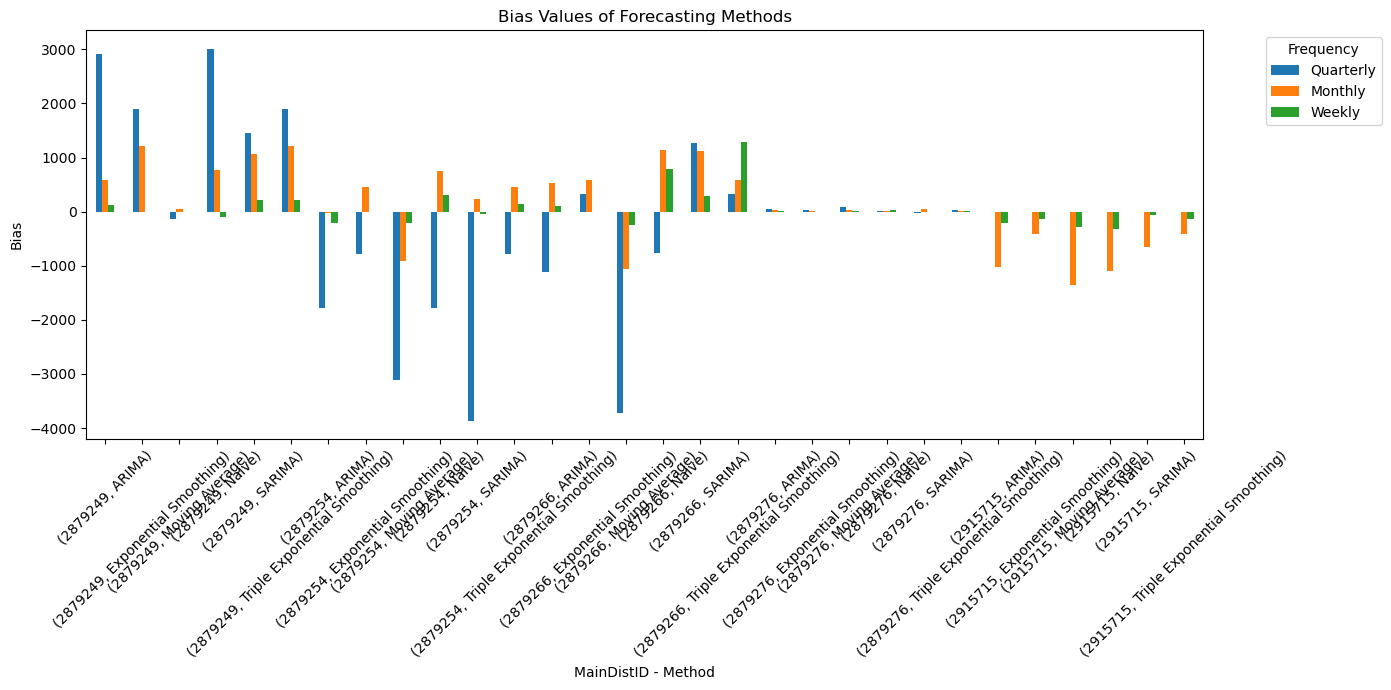

In [258]:
# plot the bias values
bias_values.plot(kind='bar', figsize=(14, 7))
plt.title('Bias Values of Forecasting Methods')
plt.xlabel('MainDistID - Method')
plt.ylabel('Bias')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Mean Absolute Percentage Error (MAPE) Values of Forecasting Methods

In [260]:
mape_values = pd.concat([metrics_df_quarterly['MAPE'], metrics_df_monthly['MAPE'], metrics_df_weekly['MAPE']], axis=1)
mape_values.columns = ['Quarterly', 'Monthly', 'Weekly']
mape_values

Quarterly   Monthly    Weekly
MainDistID Method                                                     
2879249    ARIMA                          0.254133  0.232278  0.701522
           Exponential Smoothing          0.158275  0.334813       NaN
           Moving Average                 0.153071  0.167596  0.603095
           Naive                          0.261878  0.266686  0.546099
           SARIMA                         0.106380  0.320726  0.797377
           Triple Exponential Smoothing   0.158275  0.334813  0.823731
2879254    ARIMA                          0.127161  0.137829  0.567169
           Exponential Smoothing          0.083824  0.186946       NaN
           Moving Average                 0.184168  0.191226  0.569453
           Naive                          0.127161  0.221370  0.923232
           SARIMA                         0.238973  0.168459  0.637065
           Triple Exponential Smoothing   0.083824  0.186946  0.806856
2879266    ARIMA                          0.116974  0.197704  0.597814
           Exponential Smoothing          0.104200  0.194174       NaN
           Moving Average                 0.131516  0.164430  0.486461
           Naive                          0.118600  0.242960  0.989405
           SARIMA                         0.125046  0.218168  0.685463
           Triple Exponential Smoothing   0.104200  0.194174  1.485459
2879276    ARIMA                          0.117630  0.222830  0.457276
           Exponential Smoothing          0.072301  0.174374       NaN
           Moving Average                 0.123913  0.222944  0.457285
           Naive                          0.108182  0.203013  0.719222
           SARIMA                         0.063001  0.320252  0.410876
           Triple Exponential Smoothing   0.072301  0.174374  0.419246
2915715    ARIMA                               NaN  0.449956  0.452957
           Exponential Smoothing               NaN  0.152012  0.364019
           Moving Average                      NaN  0.624388  0.598531
           Naive                               NaN  0.495324  0.665067
           SARIMA                              NaN  0.273487  0.321133
           Triple Exponential Smoothing        NaN  0.152012  0.364019

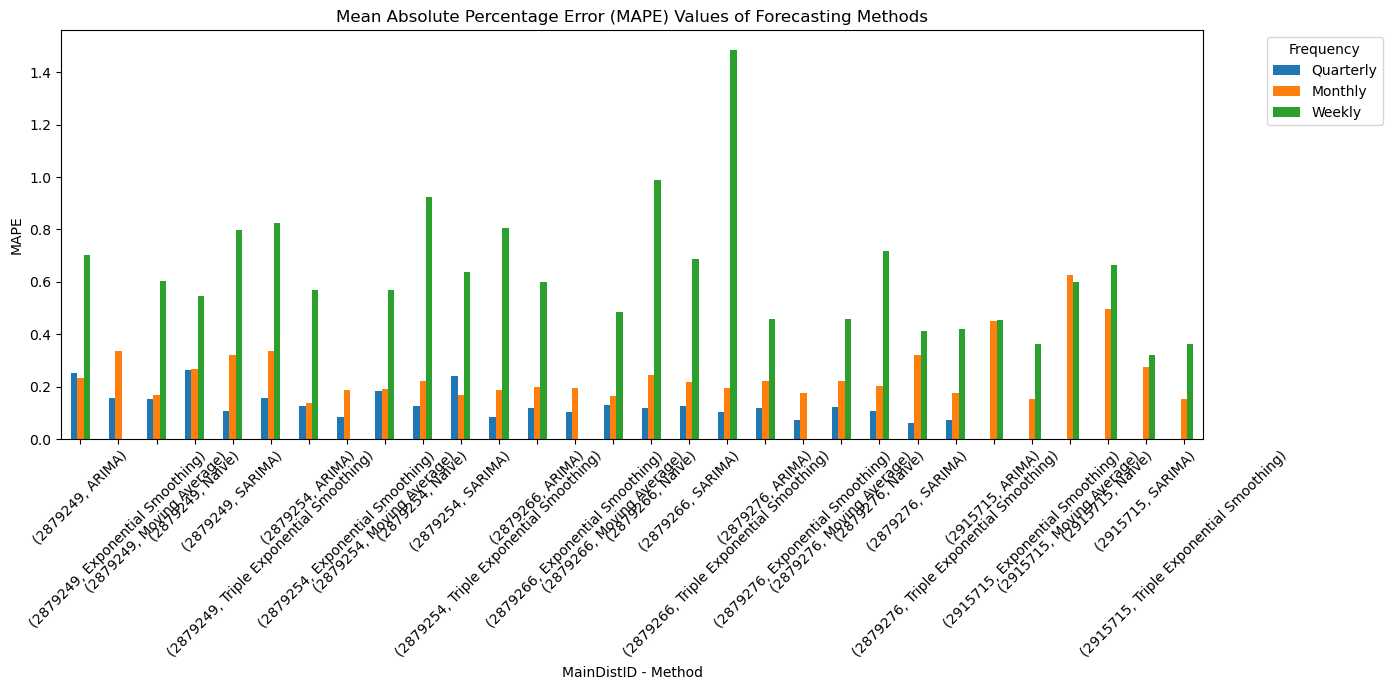

In [261]:
# plot the MAPE values
mape_values.plot(kind='bar', figsize=(14, 7))
plt.title('Mean Absolute Percentage Error (MAPE) Values of Forecasting Methods')
plt.xlabel('MainDistID - Method')
plt.ylabel('MAPE')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()